<img src="../utils/title.png" alt="title", width="600">

<img src="../utils/master_203_pic.jpg" alt="Master 203", width=400>

In [617]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

For the last century, corporate default risk prediction has been a main concern to financial market analysts. Nowadays, it stills ranks high among topics in economics. Using machine learning and data-driven approaches, it is now possible to build more robust models to predict financial distress. The aim of this competition is to develop a bankruptcy predictive model based on corporate econometric and financial measures.

## About data

Data consists of 10503 eastern Europe bankrupted and still operating corporates from manufacturing sector. Train dataset is composed of 65% of original data while test dataset contains the remaining 35%. Both datasets contain the same columns (except column label you have to predict for test dataset). As a competitor, you have to train your best machine learning algorithm to model underlying relationship between year N economics and financial measures and corporate financial state at year N+3. Here are the following features.

For each corporate are provided 62 econometrics and financial standardized rates.

- **id**  -  corporate id</li>
- **f1**  -  net profit / total assets</li>
- **f2** -  total liabilities / total assets</li>
- **f3** -  working capital / total assets</li>
- **f4**  -  current assets / short-term liabilities</li>
- **f5** -  [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365</li>
- **f6 **  -  retained earnings / total assets</li>
- **f7 **  -  EBIT / total assets </li>
- **f8 **  -  book value of equity / total liabilities </li>
- **f9 ** -  sales / total assets </li>
- **f10**  -  equity / total assets </li>
- **f11**  -  (gross profit + extraordinary items + financial expenses) / total assets </li>
- **f12**  -  gross profit / short-term liabilities </li>
- **f13**  -  (gross profit + depreciation) / sales </li>
- **f14**  -  (gross profit + interest) / total assets </li>
- **f15**  -  (total liabilities * 365) / (gross profit + depreciation)</li>
- **f16**  -  (gross profit + depreciation) / total liabilities </li>
- **f17**  -  total assets / total liabilities </li>
- **f18**  -  gross profit / total assets </li>
- **f19**  -  gross profit / sales </li>
- **f20**  -  (inventory * 365) / sales </li>
- **f22**  -  profit on operating activities / total assets </li>
- **f23**  -  net profit / sales </li>
- **f24**  -  gross profit (in 3 years) / total assets </li>
- **f25**  -  (equity - share capital) / total assets </li>
- **f26**  -  (net profit + depreciation) / total liabilities</li> 
- **f28**  -  working capital / fixed assets </li>
- **f29**  -  logarithm of total assets (in euros)</li>
- **f30**  -  (total liabilities - cash) / sales </li>
- **f31**  -  (gross profit + interest) / sales</li>
- **f32**  -  (current liabilities * 365) / cost of products sold </li>
- **f33**  -  operating expenses / short-term liabilities </li>
- **f34**  -  operating expenses / total liabilities </li>
- **f35**  -  profit on sales / total assets </li>
- **f36**  -  total sales / total assets </li>
- **f37**  -  (current assets - inventories) / long-term liabilities </li>
- **f38**  -  constant capital / total assets </li>
- **f39**  -  profit on sales / sales </li>
- **f40**  -  (current assets - inventory - receivables) / short-term liabilities  </li>
- **f41**  -  total liabilities / ((profit on operating activities + depreciation) * (12/365)) </li>
- **f42**  -  profit on operating activities / sales </li>
- **f43**  -  rotation receivables + inventory turnover in days </li>
- **f44**  -  (receivables * 365) / sales </li>
- **f45**  -  net profit / inventory </li>
- **f46**  -  (current assets - inventory) / short-term liabilities </li>
- **f47**  -  (inventory * 365) / cost of products sold </li>
- **f48**  -  EBITDA (profit on operating activities - depreciation) / total assets </li>
- **f49**  -  EBITDA (profit on operating activities - depreciation) / sales </li>
- **f50**  -  current assets / total liabilities </li>
- **f51**  -  short-term liabilities / total assets </li>
- **f52**  -  (short-term liabilities * 365) / cost of products sold) </li>
- **f53**  -  equity / fixed assets </li>
- **f54**  -  constant capital / fixed assets </li>
- **f55**  -  working capital (in euros) </li>
- **f56**  -  (sales - cost of products sold) / sales </li>
- **f57**  -  (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) </li>
- **f58**  -  total costs /total sales </li>
- **f59**  -  long-term liabilities / equity </li>
- **f60**  -  sales / inventory </li>
- **f61**  -  sales / receivables </li>
- **f62**  -  (short-term liabilities *365) / sales </li>
- **f63**  -  sales / short-term liabilities </li>
- **f64**  -  sales / fixed assets </li>
- **label**  - corporate financial state in 3 year (variable to predict) : 0 = no bankruptcy / 1 = bankruptcy </li>

## Load modules

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy.random as npr
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import StratifiedKFold
%matplotlib inline


/Users/Thibaud/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Modules versions
- Anaconda version : **3.6.2**
- python : **3.6.2**
- numpy :  **1.12.1**
- pandas : **0.19.2**
- scikit-learn : **0.19.1**

In [3]:
print("python and anaconda version = %s" % sys.version)
print("numpy version = %s" % np.__version__)
print("pandas version = %s" % pd.__version__)
print("scikit-learn version = %s" % sklearn.__version__)

python and anaconda version = 3.6.2 |Anaconda custom (x86_64)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version = 1.12.1
pandas version = 0.19.2
scikit-learn version = 0.19.1


## Functions

In [2]:
def export_kaggle(df_test, proba_test, save=True, path_save="my_submission_vanilla_model.csv"):
    """
    Export submissions with good kaggle format.
    df_test : (pandas dataframe) test set
    proba_test : (numpy ndarray) probabilities as numpy ndarray you get using method .predict_proba()[:,1]
    save : (bool) if set to True, it will save csv submission in path_save path.
    path_save : (str) path where to save submission.
    return : dataframe for submission
    """
    proba_serie = pd.Series(proba_test, index=df_test.index)
    df_submit = pd.concat([df_test["id"], proba_serie], axis=1)
    df_submit.columns = ["id", "decision"]
    df_submit.to_csv(path_save, index=False)
    return df_submit

def check_test(result, expected, display_error):
    """
    Testing your results.
    """
    if result == expected:
        print("1 test passed.")
    else:
        print(display_error)

***
# Step 1 - Data Exploration

In this section we will analyse the data in order to have a better knowledge of features distribution and characteristics. We will :
> - Analyse the **repartition** of the Label column
> - Look for the existence of **outliers**
> - Study features distribution in order to learn their **imbalances** and potential outliers. In order to do this this we will use :
    - **Box plots** displaying interesting quantiles
    - **Histograms**

## Load datasets

In [134]:
df_train = pd.read_csv("/Users/RaphaelLederman/Documents/Competition/Data/train_dataset.csv")
df_test = pd.read_csv("/Users/RaphaelLederman/Documents/Competition/Data/test_dataset.csv")
n_rows_train = df_train.shape[0]
n_rows_test = df_test.shape[0]
features_cols = [col for col in df_test.columns if "f" in col]

In [638]:
check_test(n_rows_train, 7037, "wrong number of rows")
check_test(n_rows_test, 3466, "wrong number of rows")

1 test passed.
1 test passed.


In [ ]:
# This cell is used in order to empy datasets in case it is needed
df_train.dropna().empty
df_train2.dropna().empty
df_train3.dropna().empty
df_train4.dropna().empty
df_train5.dropna().empty
df_train6.dropna().empty
df_train7.dropna().empty
df_test.dropna().empty
df_test2.dropna().empty
df_test3.dropna().empty
df_test4.dropna().empty
df_test5.dropna().empty
df_test6.dropna().empty
df_test7.dropna().empty

## Label column repartition in train dataset

Intuitively, we can think there are more still operating corporate than bankrupted companies. 
With following lines of code, we observe that the **ratio of bankrupted companies** is equal to <font color=red>**4.83**%</font>.

In [9]:
# Here we retrieve the number of bankrupted vs. still operating corporates
n_train_bankrupted = df_train.label.value_counts()[1]
n_train_ok = df_train.label.value_counts()[0]
ratio_bankrupt = df_train.label.value_counts()[1]/len(df_train)
print ("number of bankrupted corporate in three years : %s" % n_train_bankrupted)
print("number of still operating corporate in three years : %s" % n_train_ok)
print("bankrupted corporates ratio : %s" % ratio_bankrupt)

number of bankrupted corporate in three years : 340
number of still operating corporate in three years : 6697
bankrupted corporates ratio : 0.0483160437687


In [ ]:
check_test(n_train_bankrupted, 340, "wrong number")
check_test(n_train_ok, 6697, "wrong number")
check_test(round(ratio_bankrupt, 3), 0.048, "wrong ratio")

## Boxplots comparison

As we can observe with the following chart, the ratios are different between classes 0 and 1 for almost all features. <br>
We could use it in order to propoerly select **discriminative features**. <br>
Example with  <font color=red>**f2**</font> **(total liabilities / total assets)** :
- For class 1 (bankruptcy in next 3 years), ratio is larger than with class 0 (still operating companies) : it seems logicial.
- We can also observe that there are a lot of large values (greater than 4) for this variable even if companies come from the same activity sector.

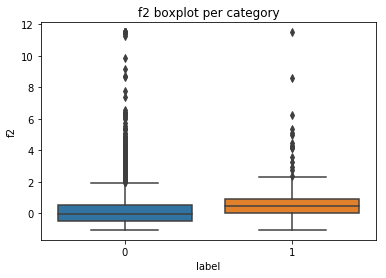

In [599]:
#ax = sns.boxplot(x="label", y="f2", data=df_train[df_train["f2"] < np.percentile(df_train["f2"],99.9)])
ax = sns.boxplot(x="label", y="f2", data=df_train)
plt.title("f2 boxplot per category")
plt.show()

## Anomaly detection with Isolation Forest

Here we will use the isolation forest algorithm in order represent the **anomaly score** of our normalized features, and therefore have a better idea of outliers repartition. <br>
Let's take the example of <font color=red>**f46**</font> : **(current assets - inventory)/short-term liabilities**

/Users/RaphaelLederman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


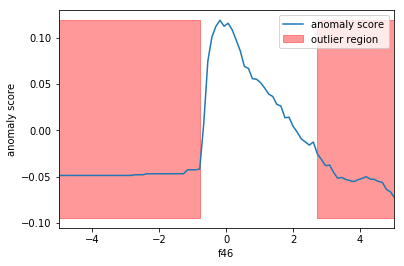

In [604]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_train["f46"].reshape(-1, 1))
xx = np.linspace(-6, 6, 100).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('f46')
plt.xlim([-5, 5])
plt.show()

## Histograms

Let's use histograms in orer to represent the features' distribution in an explicit way. <br>
As an example, let's plot <font color=red>**f29**</font> : **logarithm of total assets** <br>
Corporates sizes' distribution has the following characteristics :
>- **Mean = 3.29**
>- **Std = 0.84** <br>

A large part of our dataset consists in relatively small or medium sized companies, which might be more exposed to bankrupcy in terms of probability.


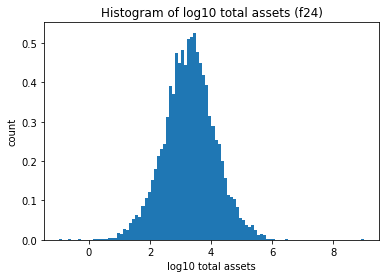

Mean of f29 is : 3.2936815854660457
Standard deviation of f29 is : 0.8382089044680799


In [610]:
plt.hist(df_train["f29"],bins=100,normed=True)
plt.title("Histogram of log10 total assets (f24)")
plt.xlabel("log10 total assets")
plt.ylabel("count")
plt.show()
# Let's have an idea of the mean and standard deviation of this particular feature
mean=df_train.f29.mean()
std=df_train.f29.std()
print("Mean of f29 is : %s" % mean)
print("Standard deviation of f29 is : %s" % std)

#### Histograms on all features

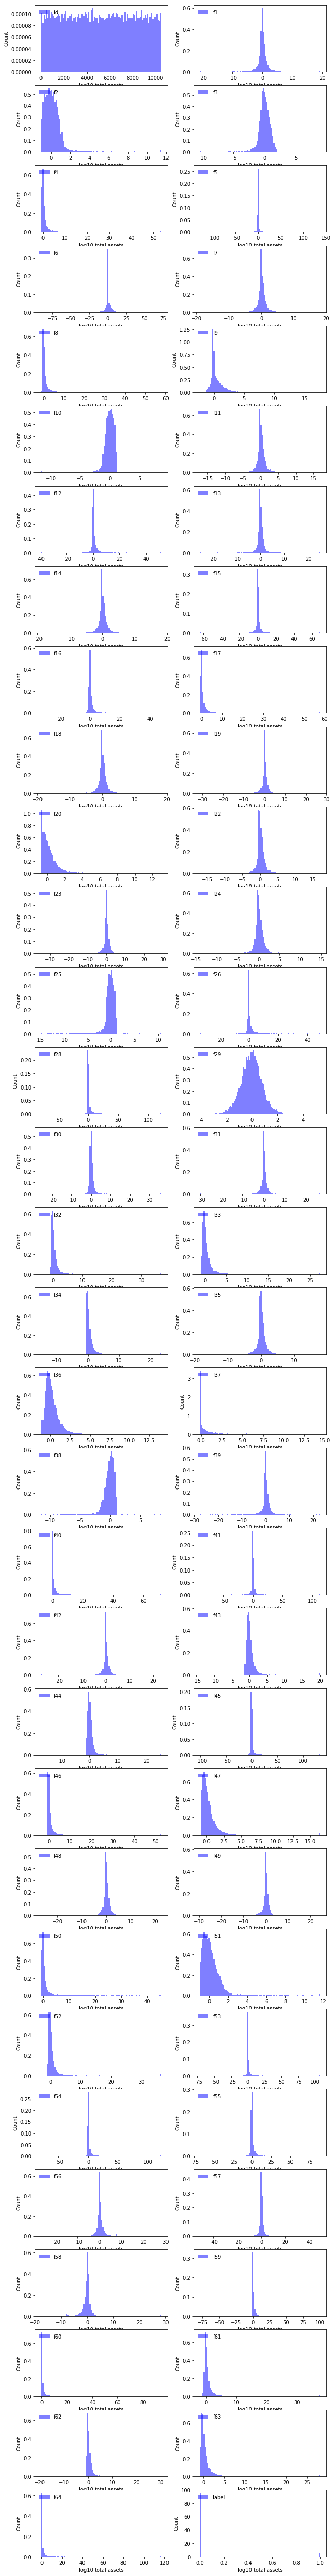

In [250]:
ncols = 2
nrows = int(np.ceil(len(df_train.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 700))
plt.subplots_adjust(left=0.2, bottom=0.4, right=1, top=0.5, wspace=0.2, hspace=0.2)
counter = 0

for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df_train.columns):
            ax.rowspan=4
            ax.hist(df_train[df_train.columns[counter]], bins=100, color='blue',normed=True,alpha=0.5, label='{}'.format(df_train.columns[counter]))
            ax.set_xlabel("log10 total assets")
            ax.set_ylabel("Count")
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)
        else:
            ax.set_axis_off()

        counter += 1
plt.show()

## Missing values description

For each feature in train and test datasets, we count the number of missing values. 
For each column, we append respectively result to lists **train_nan_count** and **test_nan_count**.

We can from now say that there are disparities in missing values repartition : some classes are complete, some others display high numbers of missing values => we are going to **replace** them using different methods.

In [417]:
# For each feature, we sum the number of missing values and test the result.
train_nan_count = []
test_nan_count = []
for col in features_cols: 
    n_nan_in_train_col = df_train[col].isnull().sum()
    n_nan_in_test_col = df_test[col].isnull().sum()
    train_nan_count.append(n_nan_in_train_col)
    test_nan_count.append(n_nan_in_test_col)   

In [ ]:
check_test(train_nan_count, [0, 0, 0, 16, 9, 0, 0, 13, 2, 0, 0, 16, 29, 0, 7, 13, 13, 0, 29, 29, 0, 29, 151, 0, 13, 158, 0, 29, 29, 60, 16, 13, 0, 0, 3202, 0, 29, 16, 129, 29, 29, 29, 406, 16, 52, 0, 29, 13, 0, 52, 158, 158, 0, 29, 0, 20, 0, 406, 13, 29, 16, 158], "incorrect nan count list")
check_test(test_nan_count, [0, 0, 0, 2, 16, 0, 0, 1, 1, 0, 0, 2, 14, 0, 1, 1, 1, 0, 14, 14, 0, 14, 76, 0, 1, 70, 0, 14, 14, 41, 2, 1, 0, 0, 1534, 0, 14, 2, 73, 14, 14, 14, 185, 2, 34, 0, 14, 1, 0, 34, 70, 70, 0, 14, 0, 9, 0, 186, 4, 14, 2, 70], "incorrect nan count list")

In [611]:
# For each feature, we display the number of missing values both for the train and test sets.
df_nan = pd.DataFrame([train_nan_count, test_nan_count], index=["train nan count", "test nan count"])
df_nan.columns = features_cols
pd.set_option("display.max_columns", 65)
df_nan.head(5)

f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  f11  f12  f13  f14  \
train nan count   0   0   0   0   0   0   0   0   0    0    0    0    0    0   
test nan count    0   0   0   0   0   0   0   0   0    0    0    0    0    0   

                 f15  f16  f17  f18  f19  f20  f22  f23  f24  f25  f26  f28  \
train nan count    0    0    0    0    0    0    0    0    0    0    0    0   
test nan count     0    0    0    0    0    0    0    0    0    0    0    0   

                 f29  f30  f31  f32  f33  f34  f35  f36  f37  f38  f39  f40  \
train nan count    0    0    0    0    0    0    0    0    0    0    0    0   
test nan count     0    0    0    0    0    0    0    0    0    0    0    0   

                 f41  f42  f43  f44  f45  f46  f47  f48  f49  f50  f51  f52  \
train nan count    0    0    0    0    0    0    0    0    0    0    0    0   
test nan count     0    0    0    0    0    0    0    0    0    0    0    0   

                 f53  f54  f55  f56  f57  f58  f59  f60  f61  f62  f63  f64  
train nan count    0    0    0    0    0    0    0    0    0    0    0    0  
test nan count     0    0    0    0    0    0    0    0    0    0    0    0

In order to have a better idea of the features that are very scarce, we will now build an "easy-to-read" plot with :
>- On the vertical axis => the different **features**
>- On the horizontal axis => the number of **missing values**

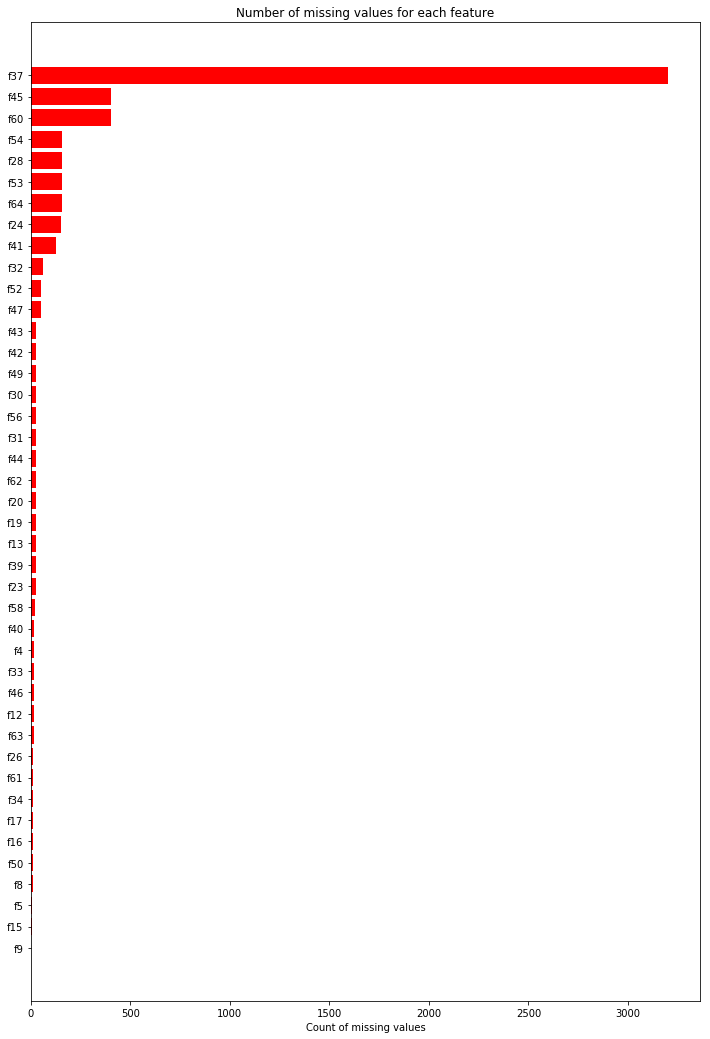

In [382]:
missing_df_train = df_train.isnull().sum().reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train = missing_df.loc[missing_df['missing_count']>0]
missing_df_train = missing_df.sort_values(by='missing_count')

plt.figure(1)
ind = np.arange(missing_df_train.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df_train.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df_train.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values for each feature")
plt.show()

We can therefore assume that we should make a careful use of the following features due to there relatively important scarcity :
- <font color=red>**37 - 45 - 60**</font>

## Features correlation observation

We want to study the **cross-sectionnal correlation** between features in order to have a better idea of which ones have the best explanatory power, and which ones are redundant.

We will display two different methods:
>- A **Pearson (linear)** correlation matrix with a heat map in order to identify inter-connected features
>- **Pairplots** in order to identify potential different types of relationships between features

### Pearson correlation heatmap

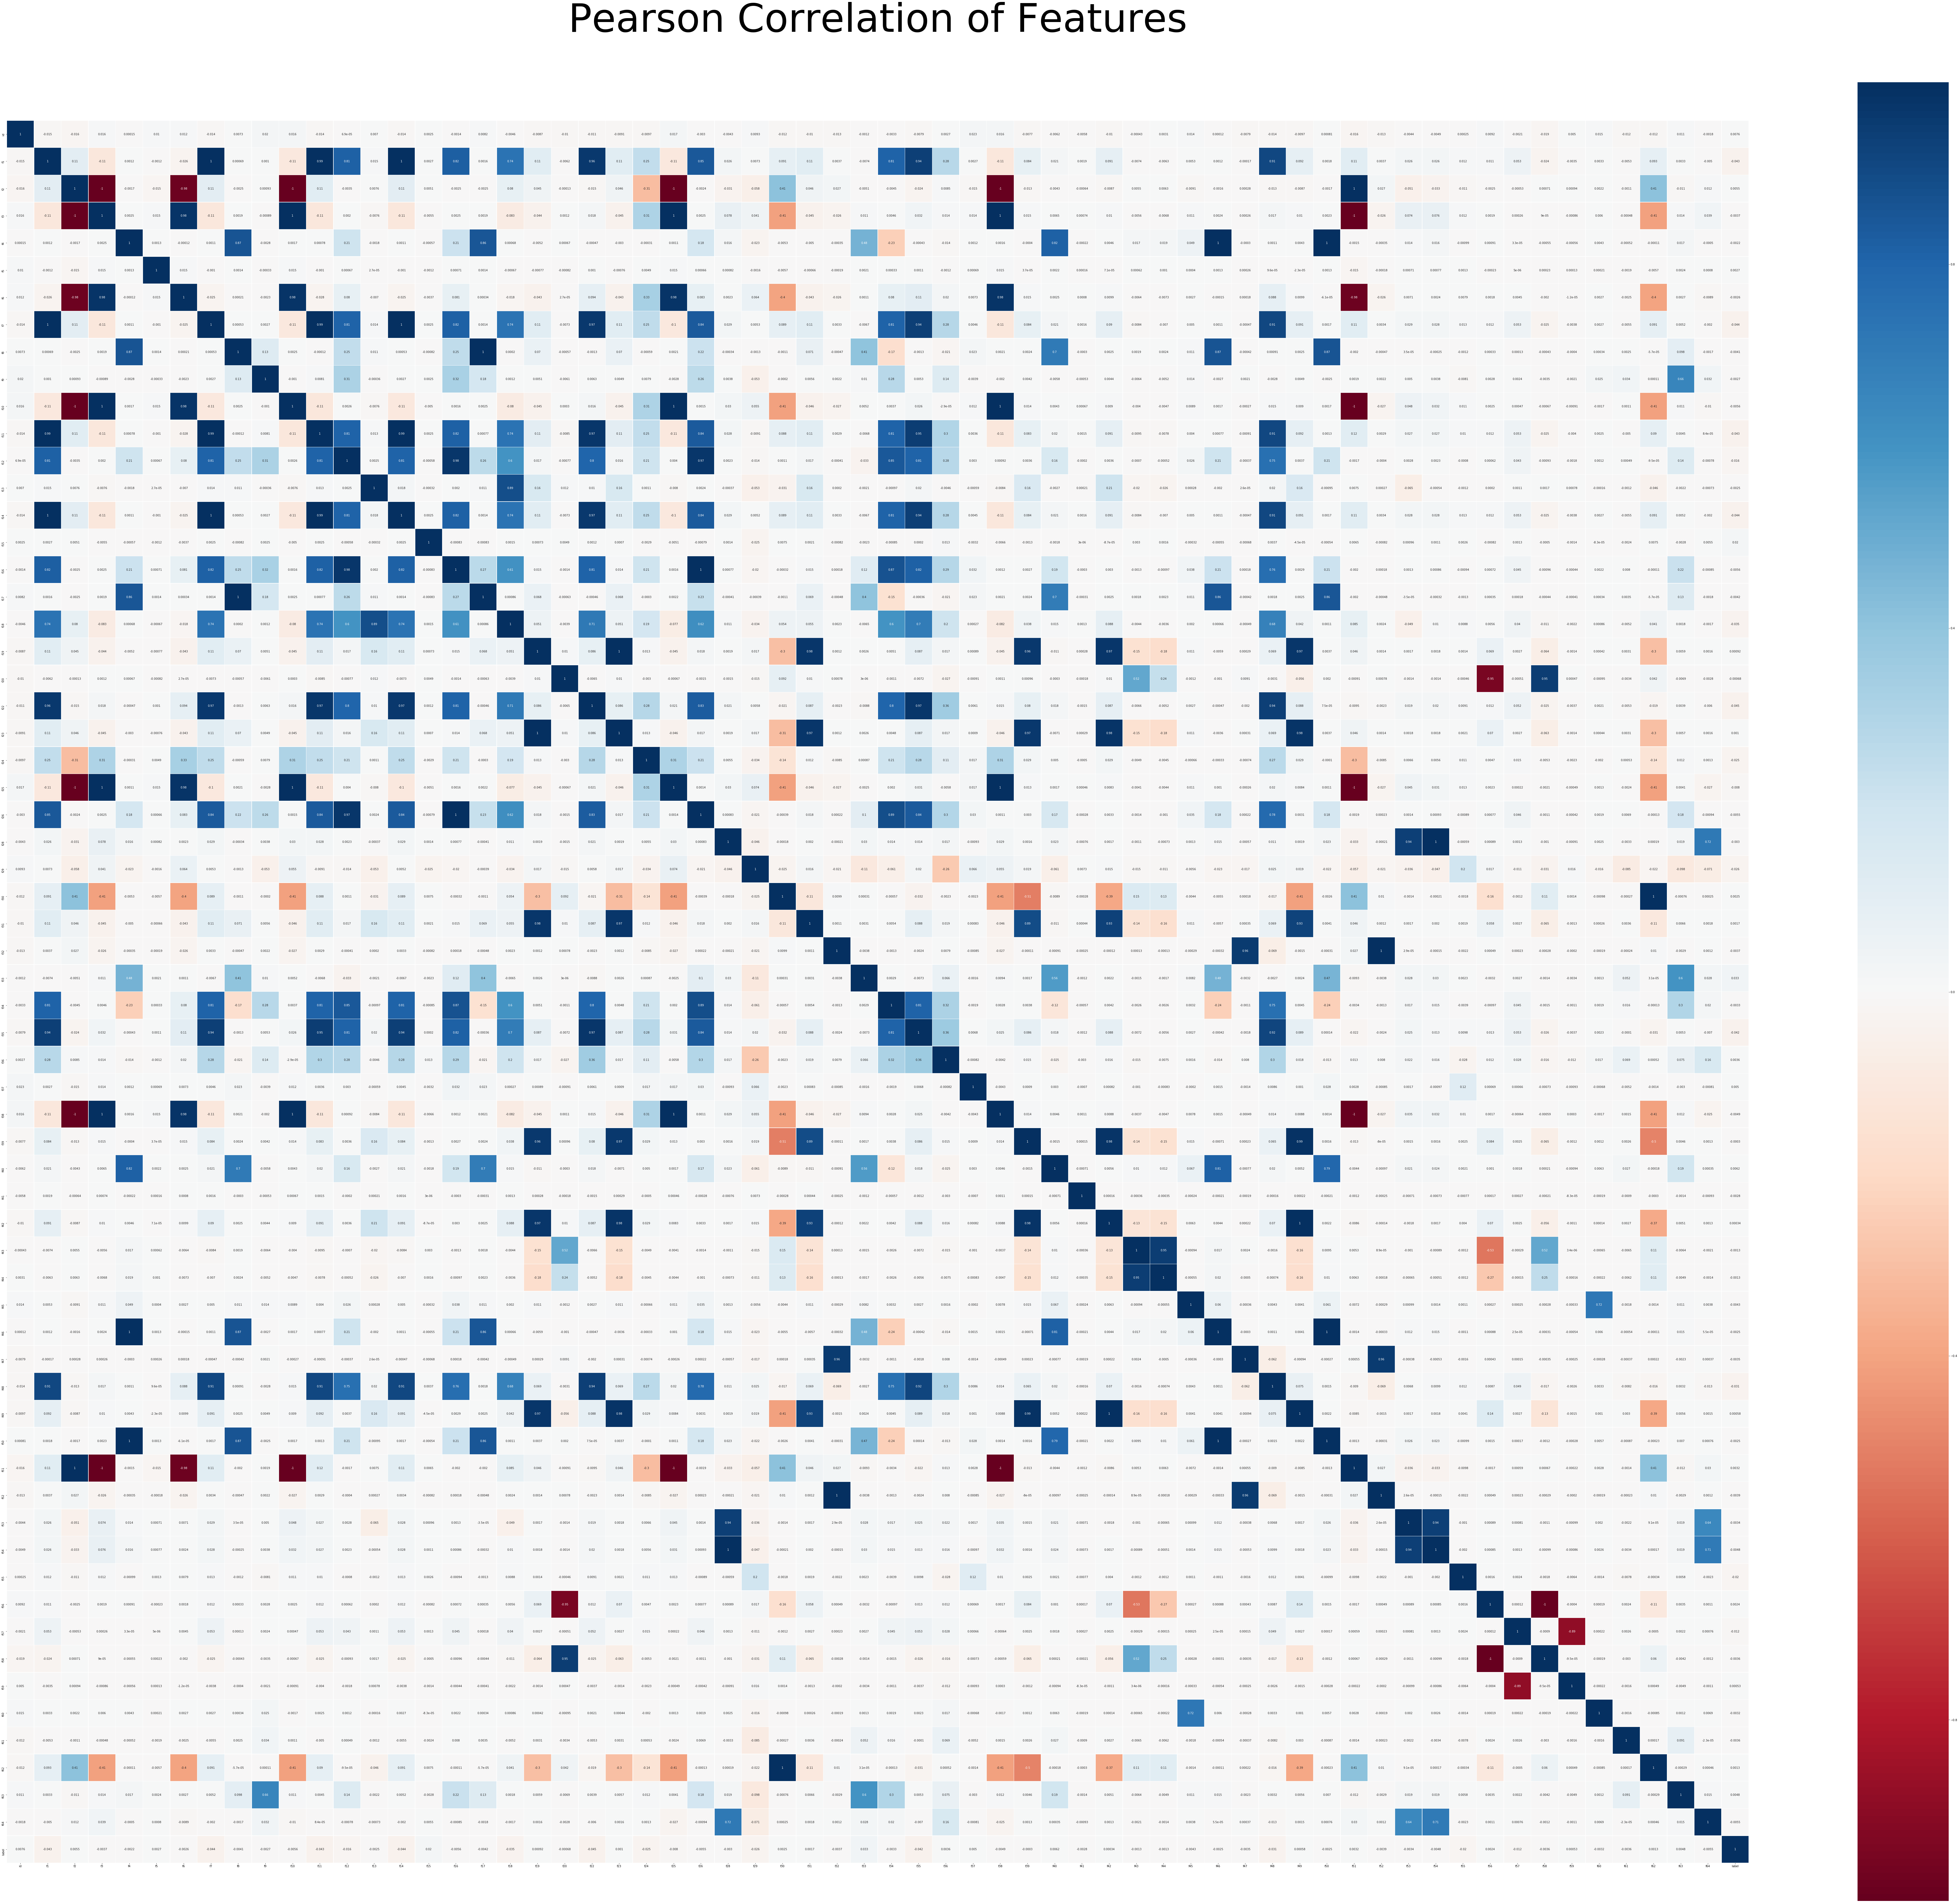

In [ ]:
corr = df_train.corr()
corr = (corr)

colormap = plt.cm.RdBu
plt.figure(figsize=(140,120) )
plt.title('Pearson Correlation of Features', y=1.05, size=140)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.4,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Pair plots

We can use pairplots to analyse the **different type of relationships** that features exhibits.<br>
Here, we will display the pairplots of some pre-selected featurres of interest.

/Users/RaphaelLederman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/RaphaelLederman/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


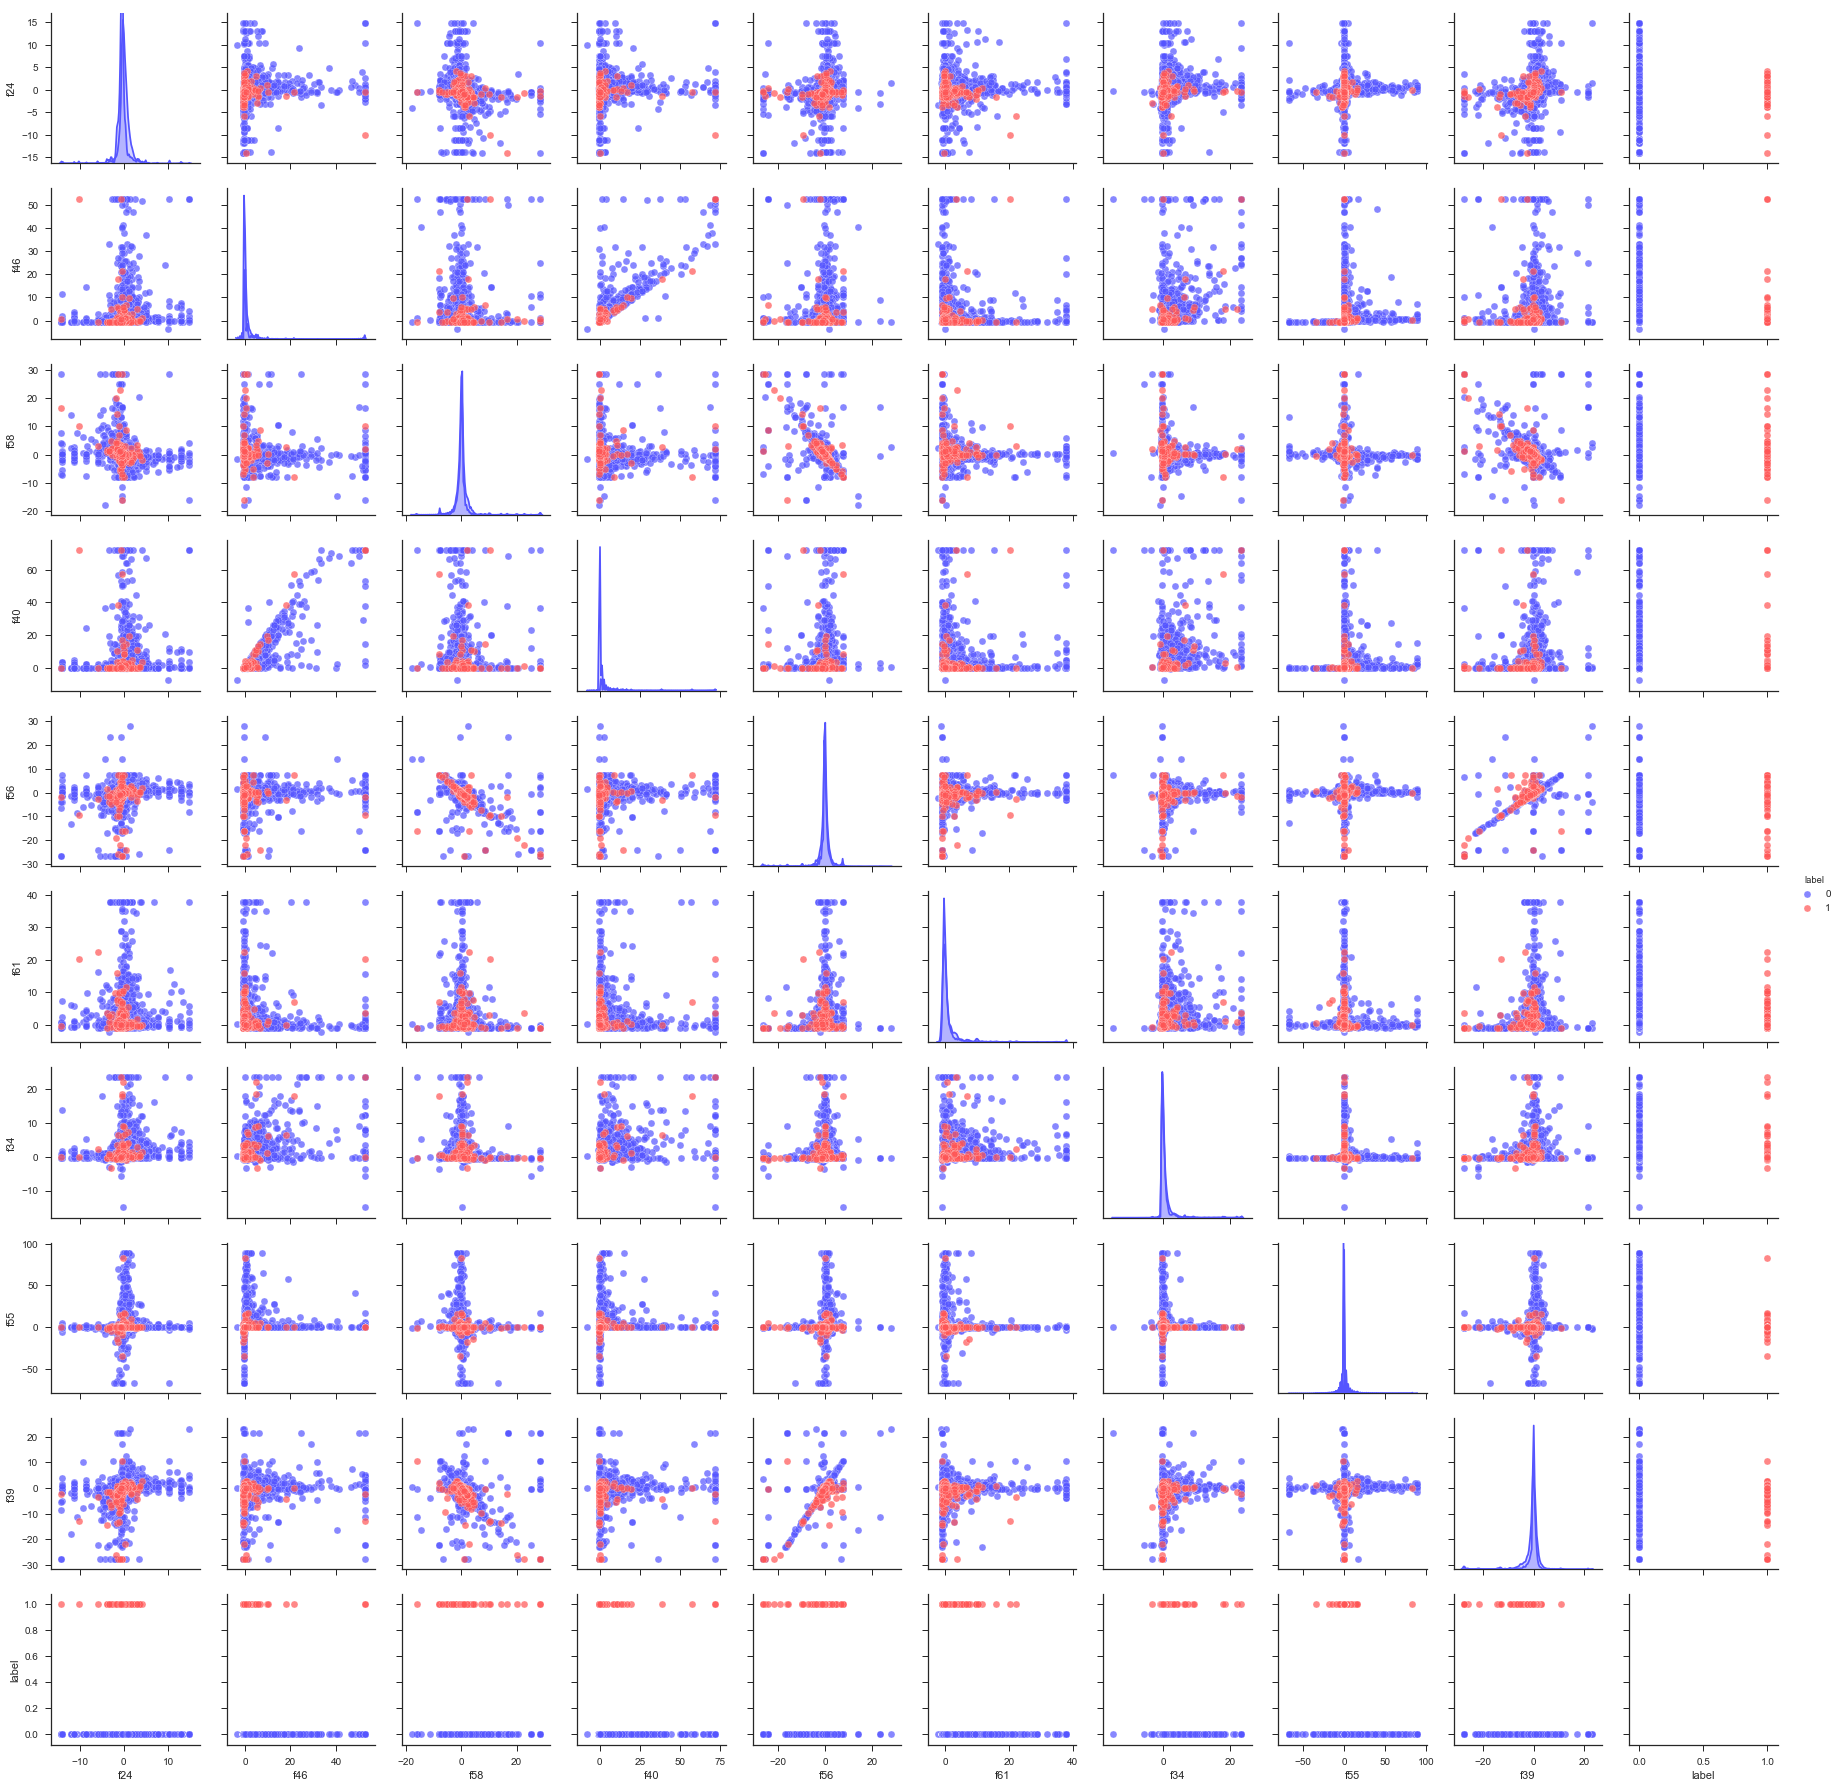

In [12]:
features =  df_train[["f24","f46","f58","f40","f56","f61","f34","f55","f39","label"]]
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
# Make the pair plot with a some aesthetic changes
sns.pairplot(features,hue="label",diag_kind = 'kde', palette= 'seismic', plot_kws=dict(alpha = 0.7), diag_kws=dict(shade=True))



## PCA

We want to use PCA in order to see if we can extract new features through linear combinations of the original ones.

In [614]:
pca = PCA(n_components=10)
fit = pca.fit(df_train2.drop(["id","label"],axis=1))

print (pca.explained_variance_)
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())
print(fit.components_)

[  1.01395586e+08   2.96188112e+07   1.47080642e+07   1.32009514e+07
   4.56140122e+06   1.79057124e+06   6.94724897e+05   3.70330870e+05
   3.54562269e+05   3.40301835e+05]
[ 0.59757386  0.17455816  0.08668183  0.07779967  0.02688257  0.01055271
  0.00409435  0.00218254  0.00208961  0.00200557]
[ 0.59757386  0.77213202  0.85881385  0.93661353  0.9634961   0.97404881
  0.97814317  0.98032571  0.98241532  0.98442088]
[[  2.95923973e-06   9.69117735e-08   6.07979501e-07 ...,  -5.45983724e-07
    6.06341822e-07   6.06341822e-07]
 [ -9.85626517e-07   8.92088078e-07  -1.04405748e-06 ...,   9.65478399e-05
   -9.63560956e-06  -9.63560956e-06]
 [ -1.65215918e-06  -5.21238635e-07   4.49818256e-06 ...,   6.63803854e-06
    1.23560884e-05   1.23560884e-05]
 ..., 
 [  3.76343078e-05   8.55992905e-06  -1.84253243e-07 ...,  -2.11436012e-04
   -1.18142320e-04  -1.18142320e-04]
 [ -2.58065249e-04   3.48029410e-04  -3.15918038e-04 ...,  -7.08164309e-04
   -8.33515417e-06  -8.33515417e-06]
 [  8.6070902

## Features importance
We now want to analyze **features importance** using more advanced tools (**Random Forests** and **Gradient Boosting**).<br>
It will allow us to have a better idea of indispensable features (those with the **best explanatory power**).<br>
We will also apply these algorithms to test the **relevancy** of both
>- The original set of features.
>- New sets of features that we will create in the following steps.

### Random Forest Features Importance

We will first use a **Random Forest** to analyse original features' respective importance

In [53]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(df_train2.drop("label",axis=1), df_train["label"])

features = df_train2.head(0)
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()


### Gradient Boosting Features Importance

Now in order to have a complementary analysis, we will use **Gradient Boosting** in order to evaluate original features' respective importance.

In [110]:
gdt_clf=GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, max_depth=3, random_state=0)
gdt_clf.fit(df_train.drop("label",axis=1), df_train["label"])

features = df_train.head(0)
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

Now we will evaluate the importance of different set of features, mixing both the **original ones**, and some other **newly created ones** (the process of creation will be detailed in the features engineering section).<br>
We chose to use the **Gradient Boosting** methodology as we empirically concluded that this model yields better results in our framework.

In [146]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train2.drop("label",axis=1), df_train2["label"])

features = df_train2.head(0)
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

In [145]:
df_train2.head(5)

id        f1        f2        f3        f4        f5        f6        f7  \
0   700 -0.321863  0.830397 -0.619862 -0.370279 -1.042421  0.000000 -0.303916   
1  4811  0.708785  0.507231  0.083039 -0.102597 -1.143650  0.000000  0.564459   
2  4529  1.975536  1.010022 -0.282907 -0.264625  0.072813 -8.568295  1.673703   
3  8780 -1.517609 -0.932845  1.204516  6.335932  0.967656  9.679260 -1.385109   
4  1012 -0.084161 -0.093108  0.845787  0.353230  0.332402  0.000000  0.074442   

         f8        f9     ...             f775        f776      f777  \
0 -0.373073 -0.304152     ...         0.243212    0.212464  0.211649   
1 -0.270175  0.513315     ...         0.472912   -0.378965 -0.381453   
2 -0.416304  1.995991     ...      -270.762308   -1.241124 -1.246051   
3  6.792205  0.448888     ...        -1.009036 -134.780222  2.904454   
4  0.104349  3.671184     ...     -1731.706963    0.085373  0.084198   

         f778         f779       f780         f781       f782       f783  \
0    0.630357    -0.236600  -0.075550    -0.286634   0.210556  -0.225926   
1  124.299455    -0.242358  -0.606441    -0.362381  -0.396503   0.355271   
2   -0.691984  1475.031949  -1.089772   283.924424  -0.966829   1.204561   
3  124.599053    -0.379759  17.597127     0.998817  10.959151  10.065697   
4    0.051740   705.399635   0.374032  1816.154084   0.097939  -0.067748   

         f784  
0    0.224413  
1   -0.359192  
2   -1.212001  
3 -385.937206  
4    0.065579  

[5 rows x 784 columns]

In [152]:
print(indices[0])
print(indices[1])
print(indices[2])
print(indices[3])
print(indices[4])
print(indices[5])
print(indices[6])
print(indices[7])
print(indices[8])
print(indices[9])
print(indices[10])
print(indices[11])
print(indices[12])
print(indices[13])
print(indices[14])
print(indices[15])
print(indices[16])
print(indices[17])
print(indices[18])
print(indices[19])
print(indices[20])
print(indices[21])
print(indices[22])
print(indices[23])
print(indices[24])
print(indices[25])
print(indices[26])
print(indices[27])
print(indices[28])
print(indices[29])
print(indices[30])
print(indices[31])
print(indices[32])
print(indices[33])
print(indices[34])
print(indices[35])
print(indices[36])
print(indices[37])
print(indices[38])
print(indices[39])
print(indices[40])
print(indices[41])
print(indices[42])
print(indices[43])
print(indices[44])
print(indices[45])
print(indices[46])
print(indices[47])
print(indices[48])
print(indices[49])
print(indices[50])
print(indices[51])
print(indices[52])
print(indices[53])
print(indices[54])
print(indices[55])
print(indices[56])
print(indices[57])
print(indices[58])
print(indices[59])
print(indices[60])
print(indices[61])
print(indices[62])
print(indices[63])
print(indices[64])
print(indices[65])
print(indices[66])
print(indices[67])
print(indices[68])
print(indices[69])
print(indices[70])
print(indices[71])
print(indices[72])
print(indices[73])
print(indices[74])
print(indices[75])
print(indices[76])
print(indices[77])
print(indices[78])
print(indices[79])
print(indices[80])
print(indices[81])
print(indices[82])
print(indices[83])
print(indices[84])
print(indices[85])
print(indices[86])
print(indices[87])
print(indices[88])
print(indices[89])
print(indices[90])
print(indices[91])
print(indices[92])
print(indices[93])
print(indices[94])
print(indices[95])
print(indices[96])
print(indices[97])
print(indices[98])
print(indices[99])
print(indices[100])
print(indices[101])
print(indices[102])
print(indices[103])
print(indices[104])
print(indices[105])
print(indices[106])
print(indices[107])
print(indices[108])
print(indices[109])
print(indices[110])
print(indices[111])
print(indices[112])
print(indices[113])
print(indices[114])
print(indices[115])
print(indices[116])
print(indices[117])
print(indices[118])
print(indices[119])
print(indices[120])
print(indices[121])
print(indices[122])
print(indices[123])
print(indices[124])
print(indices[125])
print(indices[126])
print(indices[127])
print(indices[128])
print(indices[129])
print(indices[130])
print(indices[131])
print(indices[132])
print(indices[133])
print(indices[134])
print(indices[135])
print(indices[136])
print(indices[137])
print(indices[138])
print(indices[139])
print(indices[140])
print(indices[141])
print(indices[142])
print(indices[143])
print(indices[144])
print(indices[145])
print(indices[146])
print(indices[147])
print(indices[148])
print(indices[149])
print(indices[150])
print(indices[151])
print(indices[152])
print(indices[153])
print(indices[154])
print(indices[155])
print(indices[156])
print(indices[157])
print(indices[158])
print(indices[159])
print(indices[160])
print(indices[161])
print(indices[162])
print(indices[163])
print(indices[164])
print(indices[165])
print(indices[166])
print(indices[167])
print(indices[168])
print(indices[169])
print(indices[170])
print(indices[171])
print(indices[172])
print(indices[173])
print(indices[174])
print(indices[175])
print(indices[176])
print(indices[177])
print(indices[178])
print(indices[179])
print(indices[180])
print(indices[181])
print(indices[182])
print(indices[183])
print(indices[184])
print(indices[185])
print(indices[186])
print(indices[187])
print(indices[188])
print(indices[189])
print(indices[190])
print(indices[191])
print(indices[192])
print(indices[193])
print(indices[194])
print(indices[195])
print(indices[196])
print(indices[197])
print(indices[198])
print(indices[199])
print(indices[200])
print(indices[201])
print(indices[202])
print(indices[203])
print(indices[204])
print(indices[205])
print(indices[206])
print(indices[207])
print(indices[208])
print(indices[209])
print(indices[210])
print(indices[211])
print(indices[212])
print(indices[213])
print(indices[214])
print(indices[215])
print(indices[216])
print(indices[217])
print(indices[218])
print(indices[219])
print(indices[220])
print(indices[221])
print(indices[222])
print(indices[223])
print(indices[224])
print(indices[225])
print(indices[226])
print(indices[227])
print(indices[228])
print(indices[229])
print(indices[230])
print(indices[231])
print(indices[232])
print(indices[233])
print(indices[234])
print(indices[235])
print(indices[236])
print(indices[237])
print(indices[238])
print(indices[239])
print(indices[240])
print(indices[241])
print(indices[242])
print(indices[243])
print(indices[244])
print(indices[245])
print(indices[246])
print(indices[247])
print(indices[248])
print(indices[249])
print(indices[250])
print(indices[251])
print(indices[252])
print(indices[253])
print(indices[254])
print(indices[255])
print(indices[256])
print(indices[257])
print(indices[258])
print(indices[259])
print(indices[260])
print(indices[261])
print(indices[262])
print(indices[263])
print(indices[264])
print(indices[265])
print(indices[266])
print(indices[267])
print(indices[268])
print(indices[269])
print(indices[270])
print(indices[271])
print(indices[272])
print(indices[273])
print(indices[274])
print(indices[275])
print(indices[276])
print(indices[277])
print(indices[278])
print(indices[279])
print(indices[280])
print(indices[281])
print(indices[282])
print(indices[283])
print(indices[284])
print(indices[285])
print(indices[286])
print(indices[287])
print(indices[288])
print(indices[289])
print(indices[290])
print(indices[291])
print(indices[292])
print(indices[293])
print(indices[294])
print(indices[295])
print(indices[296])
print(indices[297])
print(indices[298])
print(indices[299])
print(indices[300])
print(indices[301])
print(indices[302])
print(indices[303])
print(indices[304])
print(indices[305])
print(indices[306])
print(indices[307])
print(indices[308])
print(indices[309])
print(indices[310])
print(indices[311])
print(indices[312])
print(indices[313])
print(indices[314])
print(indices[315])
print(indices[316])
print(indices[317])
print(indices[318])
print(indices[319])
print(indices[320])
print(indices[321])
print(indices[322])
print(indices[323])
print(indices[324])
print(indices[325])
print(indices[326])
print(indices[327])
print(indices[328])
print(indices[329])
print(indices[330])
print(indices[331])
print(indices[332])
print(indices[333])
print(indices[334])
print(indices[335])
print(indices[336])
print(indices[337])
print(indices[338])
print(indices[339])
print(indices[340])
print(indices[341])
print(indices[342])
print(indices[343])
print(indices[344])
print(indices[345])
print(indices[346])
print(indices[347])
print(indices[348])
print(indices[349])
print(indices[350])
print(indices[351])
print(indices[352])
print(indices[353])
print(indices[354])
print(indices[355])
print(indices[356])
print(indices[357])
print(indices[358])
print(indices[359])
print(indices[360])
print(indices[361])
print(indices[362])
print(indices[363])
print(indices[364])
print(indices[365])
print(indices[366])
print(indices[367])
print(indices[368])
print(indices[369])
print(indices[370])
print(indices[371])
print(indices[372])
print(indices[373])
print(indices[374])
print(indices[375])
print(indices[376])
print(indices[377])
print(indices[378])
print(indices[379])
print(indices[380])
print(indices[381])
print(indices[382])
print(indices[383])
print(indices[384])
print(indices[385])
print(indices[386])
print(indices[387])
print(indices[388])
print(indices[389])
print(indices[390])
print(indices[391])
print(indices[392])
print(indices[393])
print(indices[394])
print(indices[395])
print(indices[396])
print(indices[397])
print(indices[398])
print(indices[399])
print(indices[400])
print(indices[401])
print(indices[402])
print(indices[403])
print(indices[404])
print(indices[405])
print(indices[406])
print(indices[407])
print(indices[408])
print(indices[409])
print(indices[410])
print(indices[411])
print(indices[412])
print(indices[413])
print(indices[414])
print(indices[415])
print(indices[416])
print(indices[417])
print(indices[418])
print(indices[419])
print(indices[420])
print(indices[421])
print(indices[422])
print(indices[423])
print(indices[424])
print(indices[425])
print(indices[426])
print(indices[427])
print(indices[428])
print(indices[429])
print(indices[430])
print(indices[431])
print(indices[432])
print(indices[433])
print(indices[434])
print(indices[435])
print(indices[436])
print(indices[437])
print(indices[438])
print(indices[439])
print(indices[440])
print(indices[441])
print(indices[442])
print(indices[443])
print(indices[444])
print(indices[445])
print(indices[446])
print(indices[447])
print(indices[448])
print(indices[449])
print(indices[450])
print(indices[451])
print(indices[452])
print(indices[453])
print(indices[454])
print(indices[455])
print(indices[456])
print(indices[457])
print(indices[458])
print(indices[459])
print(indices[460])
print(indices[461])
print(indices[462])
print(indices[463])
print(indices[464])
print(indices[465])
print(indices[466])
print(indices[467])
print(indices[468])
print(indices[469])
print(indices[470])
print(indices[471])
print(indices[472])
print(indices[473])
print(indices[474])
print(indices[475])
print(indices[476])
print(indices[477])
print(indices[478])
print(indices[479])
print(indices[480])
print(indices[481])
print(indices[482])
print(indices[483])
print(indices[484])
print(indices[485])
print(indices[486])
print(indices[487])
print(indices[488])
print(indices[489])
print(indices[490])
print(indices[491])
print(indices[492])
print(indices[493])
print(indices[494])
print(indices[495])
print(indices[496])
print(indices[497])
print(indices[498])
print(indices[499])
print(indices[500])
print(indices[501])
print(indices[502])
print(indices[503])
print(indices[504])
print(indices[505])
print(indices[506])
print(indices[507])
print(indices[508])
print(indices[509])
print(indices[510])
print(indices[511])
print(indices[512])
print(indices[513])
print(indices[514])
print(indices[515])
print(indices[516])
print(indices[517])
print(indices[518])
print(indices[519])
print(indices[520])
print(indices[521])
print(indices[522])
print(indices[523])
print(indices[524])
print(indices[525])
print(indices[526])
print(indices[527])
print(indices[528])
print(indices[529])
print(indices[530])
print(indices[531])
print(indices[532])
print(indices[533])
print(indices[534])
print(indices[535])
print(indices[536])
print(indices[537])
print(indices[538])
print(indices[539])
print(indices[540])
print(indices[541])
print(indices[542])
print(indices[543])
print(indices[544])
print(indices[545])
print(indices[546])
print(indices[547])
print(indices[548])
print(indices[549])
print(indices[550])
print(indices[551])
print(indices[552])
print(indices[553])
print(indices[554])
print(indices[555])
print(indices[556])
print(indices[557])
print(indices[558])
print(indices[559])
print(indices[560])
print(indices[561])
print(indices[562])
print(indices[563])
print(indices[564])
print(indices[565])
print(indices[566])
print(indices[567])
print(indices[568])
print(indices[569])
print(indices[570])
print(indices[571])
print(indices[572])
print(indices[573])
print(indices[574])
print(indices[575])
print(indices[576])
print(indices[577])
print(indices[578])
print(indices[579])
print(indices[580])
print(indices[581])
print(indices[582])
print(indices[583])
print(indices[584])
print(indices[585])
print(indices[586])
print(indices[587])
print(indices[588])
print(indices[589])
print(indices[590])
print(indices[591])
print(indices[592])
print(indices[593])
print(indices[594])
print(indices[595])
print(indices[596])
print(indices[597])
print(indices[598])
print(indices[599])
print(indices[600])
print(indices[601])
print(indices[602])
print(indices[603])
print(indices[604])
print(indices[605])
print(indices[606])
print(indices[607])
print(indices[608])
print(indices[609])
print(indices[610])
print(indices[611])
print(indices[612])
print(indices[613])
print(indices[614])
print(indices[615])
print(indices[616])
print(indices[617])
print(indices[618])
print(indices[619])
print(indices[620])
print(indices[621])
print(indices[622])
print(indices[623])
print(indices[624])
print(indices[625])
print(indices[626])
print(indices[627])
print(indices[628])
print(indices[629])
print(indices[630])
print(indices[631])
print(indices[632])
print(indices[633])
print(indices[634])
print(indices[635])
print(indices[636])
print(indices[637])
print(indices[638])
print(indices[639])
print(indices[640])
print(indices[641])
print(indices[642])
print(indices[643])
print(indices[644])
print(indices[645])
print(indices[646])
print(indices[647])
print(indices[648])
print(indices[649])
print(indices[650])
print(indices[651])
print(indices[652])
print(indices[653])
print(indices[654])
print(indices[655])
print(indices[656])
print(indices[657])
print(indices[658])
print(indices[659])
print(indices[660])
print(indices[661])
print(indices[662])
print(indices[663])
print(indices[664])
print(indices[665])
print(indices[666])
print(indices[667])
print(indices[668])
print(indices[669])
print(indices[670])
print(indices[671])
print(indices[672])
print(indices[673])
print(indices[674])
print(indices[675])
print(indices[676])
print(indices[677])
print(indices[678])
print(indices[679])
print(indices[680])
print(indices[681])
print(indices[682])
print(indices[683])
print(indices[684])
print(indices[685])
print(indices[686])
print(indices[687])
print(indices[688])
print(indices[689])
print(indices[690])
print(indices[691])
print(indices[692])
print(indices[693])
print(indices[694])
print(indices[695])
print(indices[696])
print(indices[697])
print(indices[698])
print(indices[699])
print(indices[700])
print(indices[701])
print(indices[702])
print(indices[703])
print(indices[704])
print(indices[705])
print(indices[706])
print(indices[707])
print(indices[708])
print(indices[709])
print(indices[710])
print(indices[711])
print(indices[712])
print(indices[713])
print(indices[714])
print(indices[715])
print(indices[716])
print(indices[717])
print(indices[718])
print(indices[719])
print(indices[720])
print(indices[721])
print(indices[722])
print(indices[723])
print(indices[724])
print(indices[725])
print(indices[726])
print(indices[727])
print(indices[728])
print(indices[729])
print(indices[730])
print(indices[731])
print(indices[732])
print(indices[733])
print(indices[734])
print(indices[735])
print(indices[736])
print(indices[737])
print(indices[738])
print(indices[739])
print(indices[740])
print(indices[741])
print(indices[742])
print(indices[743])
print(indices[744])
print(indices[745])
print(indices[746])
print(indices[747])
print(indices[748])
print(indices[749])
print(indices[750])

335
328
535
542
337
274
505
513
183
496
152
197
333
119
310
377
501
182
532
70
543
303
99
281
123
325
97
541
80
194
109
497
298
79
190
76
503
185
305
207
486
300
492
295
340
98
58
167
155
309
41
488
128
499
181
210
71
57
121
523
317
312
525
48
259
168
521
297
520
268
227
137
302
322
118
143
267
7
115
46
69
202
14
125
527
336
324
93
3
204
508
108
134
360
276
314
21
257
269
135
491
173
277
522
91
280
238
160
345
75
163
242
200
524
745
206
490
343
191
29
47
510
18
63
536
290
87
265
356
363
17
511
526
199
341
157
243
286
531
107
315
344
482
198
224
308
45
85
196
304
294
82
19
519
159
94
66
716
273
105
225
26
287
149
192
186
77
235
362
365
289
187
100
216
504
142
169
40
285
489
220
131
534
12
239
218
124
555
133
331
366
113
145
306
279
1
73
176
495
509
96
52
136
358
61
42
74
392
20
278
367
60
122
244
104
51
371
188
228
172
241
78
151
275
247
284
64
338
30
354
271
55
398
323
318
391
213
332
147
102
355
129
478
230
316
92
28
180
106
171
379
342
153
530
334
264
266
49
205
359
4
25
114
138
8
24

In [27]:
print(features_cols2[200])
print(features_cols2[112])
print(features_cols2[88])
print(features_cols2[268])
print(features_cols2[34])
print(features_cols2[280])
print(features_cols2[261])
print(features_cols2[102])
print(features_cols2[5])
print(features_cols2[251])
print(features_cols2[61])
print(features_cols2[44])
print(features_cols2[123])
print(features_cols2[68])
print(features_cols2[216])
print(features_cols2[247])
print(features_cols2[245])
print(features_cols2[146])
print(features_cols2[179])
print(features_cols2[266])
print(features_cols2[258])
print(features_cols2[60])
print(features_cols2[67])
print(features_cols2[195])
print(features_cols2[143])
print(features_cols2[171])
print(features_cols2[90])
print(features_cols2[270])
print(features_cols2[279])
print(features_cols2[23])
print(features_cols2[154])
print(features_cols2[275])
print(features_cols2[132])
print(features_cols2[137])
print(features_cols2[38])
print(features_cols2[77])
print(features_cols2[54])
print(features_cols2[65])
print(features_cols2[56])
print(features_cols2[33])
print(features_cols2[230])
print(features_cols2[198])
print(features_cols2[226])
print(features_cols2[144])
print(features_cols2[107])
print(features_cols2[188])
print(features_cols2[81])
print(features_cols2[141])
print(features_cols2[6])
print(features_cols2[40])
print(features_cols2[263])
print(features_cols2[133])
print(features_cols2[37])
print(features_cols2[101])
print(features_cols2[24])
print(features_cols2[35])
print(features_cols2[53])
print(features_cols2[212])
print(features_cols2[104])
print(features_cols2[283])
print(features_cols2[139])
print(features_cols2[199])
print(features_cols2[126])
print(features_cols2[120])
print(features_cols2[166])
print(features_cols2[170])
print(features_cols2[246])
print(features_cols2[69])
print(features_cols2[86])
print(features_cols2[255])
print(features_cols2[281])
print(features_cols2[9])
print(features_cols2[111])
print(features_cols2[262])
print(features_cols2[27])
print(features_cols2[236])
print(features_cols2[150])
print(features_cols2[189])
print(features_cols2[32])
print(features_cols2[254])
print(features_cols2[250])
print(features_cols2[276])
print(features_cols2[273])
print(features_cols2[274])
print(features_cols2[277])
print(features_cols2[253])

f203
f115
f91
f271
f37
f283
f264
f105
f6
f254
f64
f47
f126
f71
f219
f250
f248
f149
f182
f269
f261
f63
f70
f198
f146
f174
f93
f273
f282
f25
f157
f278
f135
f140
f41
f80
f57
f68
f59
f36
f233
f201
f229
f147
f110
f191
f84
f144
f7
f43
f266
f136
f40
f104
f26
f38
f56
f215
f107
f286
f142
f202
f129
f123
f169
f173
f249
f72
f89
f258
f284
f10
f114
f265
f30
f239
f153
f192
f35
f257
f253
f279
f276
f277
f280
f256


f204
f205
f206
f207
f208
f209
f210
f211
f212
f213
f214
f215
f216
f217
f218
f219
f220
f221
f222
f223
f224
f225
f226
f227
f228
f229
f230
f231
f232
f233
f234
f235
f236
f237
f238
f239
f240
f241
f242
f243
f244
f245
f246
f247
f248
f249
f250
f251
f252
f253
f254
f255
f256
f257
f258
f259
f260
f261
f262
f263
f264
f265
f266
f267
f268
f269
f270
f271
f272
f273
f274
f275
f276
f277
f278
f279
f280
f281
f282
f283
f284
f285
f286
f287
f288


IndexError: list index out of range

In [586]:
gdt_clf=GradientBoostingClassifier(n_estimators=2750, learning_rate=0.005,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train3, df_train["label"])

features = features_cols3
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [587]:
print(indices[1900:])

[ 826  890  862  858  880  339   17 1247 1629    4  729  849  911  579  863
  846   55  854    5  135   39   20   15  833   24  845  830  829 1744 1206
  770 1796  373  868  832 1684   12  848 1280   23  864   32 1683 1658 1782
  842 1073   36   37 1795   43   22  338]


In [615]:
print(features_cols3[338])
print(features_cols3[1795])
print(features_cols3[1073])
print(features_cols3[1683])
print(features_cols3[1782])
print(features_cols3[842])
print(features_cols3[1841])
print(features_cols3[868])
print(features_cols3[838])
print(features_cols3[848])
print(features_cols3[1796])
print(features_cols3[880])
print(features_cols3[832])
print(features_cols3[864])
print(features_cols3[845])
print(features_cols3[827])


f5*f46
f46*f60
f20*f46
f41*f48
f46*f47
f15*f35
f49*f58
f15*f61
f15*f31
f15*f41
f46*f61
f16*f26
f15*f24
f15*f57
f15*f38
f15*f18


In [511]:
gdt_clf=GradientBoostingClassifier(n_estimators=275, learning_rate=0.05,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train4, df_train["label"])

features = features_cols4
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [512]:
print(indices[1925:])

[1833   55 1225   21   17   39 1174   23  407  770  832  836    2   28   20
 1425  834    6   37 1206   12 1684   36  844  338   43   22 1444]


In [525]:
print (features_cols4[1444])
print (features_cols4[338])
print (features_cols4[844])
print (features_cols4[1684])
print (features_cols4[1794])
print (features_cols4[1644])
print (features_cols4[1683])
print (features_cols4[1206])
print (features_cols4[838])
print (features_cols4[407])
print (features_cols4[1425])
print (features_cols4[1295])
print (features_cols4[1174])


f32/f52
f5/f46
f15/f37
f41/f49
f46/f59
f39/f56
f41/f48
f24/f59
f15/f31
f6/f59
f32/f33
f28/f37
f24/f26


In [529]:
gdt_clf=GradientBoostingClassifier(n_estimators=275, learning_rate=0.05,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train5, df_train["label"])

features = features_cols5
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [530]:
print(indices[1925:])

[1785  143  688   74  368  302  235   20  106  330   36  546 1023 1130  350
 1499  620  369 1884 1706   22 1116   37   43 1486 1074  338 1444]


In [544]:
print (features_cols5[1444])
print (features_cols5[338])
print (features_cols5[1074])
print (features_cols5[1116])
print (features_cols5[1706])
print (features_cols5[1884])
print (features_cols5[1658])
print (features_cols5[1036])
print (features_cols5[160])
print (features_cols5[546])
print (features_cols5[1499])
print (features_cols5[878])
print (features_cols5[1901])
print (features_cols5[1891])


f32-f52
f5-f46
f20-f47
f22-f48
f42-f49
f52-f62
f40-f46
f19-f51
f2-f42
f9-f36
f34-f46
f16-f24
f54-f58
f53-f58


In [540]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train6, df_train["label"])

features = features_cols6
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [542]:
print(indices[1900:])

[  54    8 1206  535  243  967  923 1010 1438 1671    0   11   10 1188  300
  143   28  587 1716   55   38    4   14 1073    6  373   18  260   42   17
  338   21    5   13  317   53 1794 1052  185   39   15   20   37   24   66
   12  125  126   23   32   36   43   22]


In [545]:
print (features_cols6[126])
print (features_cols6[373])
print (features_cols6[125])
print (features_cols6[124])
print (features_cols6[185])
print (features_cols6[317])
print (features_cols6[1052])
print (features_cols6[260])
print (features_cols6[143])
print (features_cols6[202])
print (features_cols6[1093])
print (features_cols6[923])
print (features_cols6[770])


f2-1/f6
f6-1/f24
f2-1/f5
f2-1/f4
f3-1/f6
f5-1/f24
f20-1/f24
f4-1/f24
f2-1/f24
f3-1/f24
f22-1/f24
f17-1/f24
f13-1/f58


In [576]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train7, df_train["label"])

features = features_cols7
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [577]:
print(indices[1900:])

[   7   52    1  143 1110   58  281   10 1209   54   51   83    5 1188  423
   53 1174   28  832   35   50    0   13   11   18    6   34   42   25   17
  638   55   38  428   37    4   20 1074   14   39   21   15  967  785   32
   23   24   12   36  338   43   22 1444]


In [616]:
print (features_cols7[1444])
print (features_cols7[338])
print (features_cols7[785])
print (features_cols7[967])
print (features_cols7[1074])
print (features_cols7[428])
print (features_cols7[638])
print (features_cols7[832])
print (features_cols7[1174])
print (features_cols7[1188])
print (features_cols7[83])
print (features_cols7[1209])
print (features_cols7[281])
print (features_cols7[1110])
print (features_cols7[143])

f32-1/f52
f5-1/f46
f14-1/f24
f18-1/f24
f20-1/f47
f7-1/f24
f11-1/f24
f15-1/f24
f24-1/f26
f24-1/f41
f1-1/f24
f24-1/f62
f4-1/f46
f22-1/f42
f2-1/f24


In [66]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train8, df_train["label"])

features = features_cols8
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [78]:
print(indices[3640])
print(indices[3641])
print(indices[3642])
print(indices[3643])
print(indices[3644])
print(indices[3645])
print(indices[3646])
print(indices[3647])
print(indices[3648])
print(indices[3649])
print(indices[3650])
print(indices[3651])
print(indices[3652])
print(indices[3653])
print(indices[3654])
print(indices[3655])
print(indices[3656])
print(indices[3657])
print(indices[3658])
print(indices[3659])
print(indices[3660])
print(indices[3661])
print(indices[3662])
print(indices[3663])
print(indices[3664])
print(indices[3665])
print(indices[3666])
print(indices[3667])
print(indices[3668])
print(indices[3669])
print(indices[3670])
print(indices[3671])
print(indices[3672])
print(indices[3673])
print(indices[3674])
print(indices[3675])
print(indices[3676])
print(indices[3677])
print(indices[3678])
print(indices[3679])
print(indices[3680])
print(indices[3681])
print(indices[3682])
print(indices[3683])
print(indices[3684])
print(indices[3685])
print(indices[3686])
print(indices[3687])
print(indices[3688])
print(indices[3689])
print(indices[3690])
print(indices[3691])
print(indices[3692])
print(indices[3693])
print(indices[3694])
print(indices[3695])
print(indices[3696])
print(indices[3697])
print(indices[3698])
print(indices[3699])
print(indices[3700])
print(indices[3701])
print(indices[3702])
print(indices[3703])
print(indices[3704])
print(indices[3705])
print(indices[3706])
print(indices[3707])
print(indices[3708])
print(indices[3709])
print(indices[3710])
print(indices[3711])
print(indices[3712])
print(indices[3713])
print(indices[3714])
print(indices[3715])
print(indices[3716])
print(indices[3717])
print(indices[3718])
print(indices[3719])
print(indices[3720])
print(indices[3721])
print(indices[3722])
print(indices[3723])
print(indices[3724])
print(indices[3725])
print(indices[3726])
print(indices[3727])
print(indices[3728])
print(indices[3729])
print(indices[3730])
print(indices[3731])
print(indices[3732])
print(indices[3733])
print(indices[3734])
print(indices[3735])
print(indices[3736])
print(indices[3737])
print(indices[3738])
print(indices[3739])
print(indices[3740])

3701
3035
2995
167
2871
2960
689
2640
1180
2911
1458
3483
2875
2252
29
2628
1731
3527
576
3331
380
3256
1604
2168
1321
2103
2152
2437
81
2656
1966
3148
1391
1784
269
2705
3525
1668
3583
2173
2171
2612
2169
3033
2876
2566
3330
3142
2083
2697
3727
2145
3209
3385
2984
1459
1656
2191
2157
2791
3208
2187
653
2674
2167
3685
1005
2976
3150
3566
733
1243
3658
2998
3168
2148
3712
2156
2161
2848
2182
2996
3268
1529
703
2926
3731
1495
524
1469
2196
1433
2517
577
767
3273
2197
669
1363
612
38


In [79]:
print(features_cols8[3701])
print(features_cols8[3035])
print(features_cols8[2995])
print(features_cols8[167])
print(features_cols8[2871])
print(features_cols8[2960])
print(features_cols8[689])
print(features_cols8[2640])
print(features_cols8[1180])
print(features_cols8[2911])
print(features_cols8[1458])
print(features_cols8[3483])
print(features_cols8[2875])
print(features_cols8[2252])
print(features_cols8[29])
print(features_cols8[2628])
print(features_cols8[1731])
print(features_cols8[3527])
print(features_cols8[576])
print(features_cols8[3331])
print(features_cols8[380])
print(features_cols8[3256])
print(features_cols8[1604])
print(features_cols8[2168])
print(features_cols8[1321])
print(features_cols8[2103])
print(features_cols8[2152])
print(features_cols8[2437])
print(features_cols8[81])
print(features_cols8[2656])
print(features_cols8[1966])
print(features_cols8[3148])
print(features_cols8[1391])
print(features_cols8[1784])
print(features_cols8[269])
print(features_cols8[2705])
print(features_cols8[3525])
print(features_cols8[1668])
print(features_cols8[3583])
print(features_cols8[2173])
print(features_cols8[2171])
print(features_cols8[2612])
print(features_cols8[2169])
print(features_cols8[3033])
print(features_cols8[2876])
print(features_cols8[2566])
print(features_cols8[3330])
print(features_cols8[3142])
print(features_cols8[2083])
print(features_cols8[2697])
print(features_cols8[3727])
print(features_cols8[2145])
print(features_cols8[3209])
print(features_cols8[3385])
print(features_cols8[2984])
print(features_cols8[1459])
print(features_cols8[1656])
print(features_cols8[2191])
print(features_cols8[2157])
print(features_cols8[2791])
print(features_cols8[3208])
print(features_cols8[2187])
print(features_cols8[653])
print(features_cols8[2674])
print(features_cols8[2167])
print(features_cols8[3685])
print(features_cols8[1005])
print(features_cols8[2976])
print(features_cols8[3150])
print(features_cols8[3566])
print(features_cols8[733])
print(features_cols8[1243])
print(features_cols8[3658])
print(features_cols8[2998])
print(features_cols8[3168])
print(features_cols8[2148])
print(features_cols8[3712])
print(features_cols8[2156])
print(features_cols8[2161])
print(features_cols8[2848])
print(features_cols8[2182])
print(features_cols8[2996])
print(features_cols8[3268])
print(features_cols8[1529])
print(features_cols8[703])
print(features_cols8[2926])
print(features_cols8[3731])
print(features_cols8[1495])
print(features_cols8[524])
print(features_cols8[1469])
print(features_cols8[2196])
print(features_cols8[1433])
print(features_cols8[2517])
print(features_cols8[577])
print(features_cols8[767])
print(features_cols8[3273])
print(features_cols8[2197])
print(features_cols8[669])
print(features_cols8[1363])
print(features_cols8[612])
print(features_cols8[38])

f77*f83
f50*f84
f49*f82
f1*f83
f46*f78
f48*f86
f8*f40
f41*f67
f14*f82
f47*f77
f18*f82
f21*f82
f46*f82
f33*f83
f32
f41*f57
f24*f32
f65*f83
f6*f82
f59*f83
f4*f49
f57*f67
f22*f32
f32*f56
f16*f82
f31*f47
f32*f40
f37*f60
f82
f41*f83
f28*f82
f54*f57
f17*f83
f24*f83
f3*f18
f42*f86
f65*f81
f23*f32
f68*f82
f32*f61
f32*f59
f40*f86
f32*f57
f50*f82
f46*f83
f40*f42
f59*f82
f53*f83
f30*f82
f42*f78
f81*f83
f32*f33
f55*f83
f61*f82
f49*f71
f18*f83
f22*f82
f32*f77
f32*f45
f44*f83
f55*f82
f32*f73
f7*f80
f42*f57
f32*f55
f75*f86
f12*f54
f49*f21
f54*f59
f67*f83
f8*f82
f15*f74
f73*f82
f49*f85
f54*f75
f32*f36
f78*f86
f32*f44
f32*f49
f46*f57
f32*f68
f49*f83
f57*f79
f19*f86
f8*f54
f48*f54
f82*f83
f19*f54
f6*f32
f19*f28
f32*f82
f18*f59
f39*f41
f6*f83
f9*f41
f57*f84
f32*f83
f8*f18
f17*f57
f7*f41
f41


In [80]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train9, df_train["label"])

features = features_cols9
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [81]:
print(indices[3640])
print(indices[3641])
print(indices[3642])
print(indices[3643])
print(indices[3644])
print(indices[3645])
print(indices[3646])
print(indices[3647])
print(indices[3648])
print(indices[3649])
print(indices[3650])
print(indices[3651])
print(indices[3652])
print(indices[3653])
print(indices[3654])
print(indices[3655])
print(indices[3656])
print(indices[3657])
print(indices[3658])
print(indices[3659])
print(indices[3660])
print(indices[3661])
print(indices[3662])
print(indices[3663])
print(indices[3664])
print(indices[3665])
print(indices[3666])
print(indices[3667])
print(indices[3668])
print(indices[3669])
print(indices[3670])
print(indices[3671])
print(indices[3672])
print(indices[3673])
print(indices[3674])
print(indices[3675])
print(indices[3676])
print(indices[3677])
print(indices[3678])
print(indices[3679])
print(indices[3680])
print(indices[3681])
print(indices[3682])
print(indices[3683])
print(indices[3684])
print(indices[3685])
print(indices[3686])
print(indices[3687])
print(indices[3688])
print(indices[3689])
print(indices[3690])
print(indices[3691])
print(indices[3692])
print(indices[3693])
print(indices[3694])
print(indices[3695])
print(indices[3696])
print(indices[3697])
print(indices[3698])
print(indices[3699])
print(indices[3700])
print(indices[3701])
print(indices[3702])
print(indices[3703])
print(indices[3704])
print(indices[3705])
print(indices[3706])
print(indices[3707])
print(indices[3708])
print(indices[3709])
print(indices[3710])
print(indices[3711])
print(indices[3712])
print(indices[3713])
print(indices[3714])
print(indices[3715])
print(indices[3716])
print(indices[3717])
print(indices[3718])
print(indices[3719])
print(indices[3720])
print(indices[3721])
print(indices[3722])
print(indices[3723])
print(indices[3724])
print(indices[3725])
print(indices[3726])
print(indices[3727])
print(indices[3728])
print(indices[3729])
print(indices[3730])
print(indices[3731])
print(indices[3732])
print(indices[3733])
print(indices[3734])
print(indices[3735])
print(indices[3736])
print(indices[3737])
print(indices[3738])
print(indices[3739])
print(indices[3740])

2083
2411
734
1391
3506
1592
1278
3176
3631
2561
3645
1720
334
1010
281
1036
3331
1914
3302
167
3461
3632
3330
2026
1695
3484
1128
3142
3106
1269
3460
166
3070
2359
2834
415
3727
3033
656
1321
3358
1458
1784
1721
251
3359
3527
3412
1973
1338
1459
3437
663
1539
887
1056
1591
1406
3116
1668
1035
2640
3600
2608
983
3671
3301
3411
733
3546
3682
198
114
834
1966
1109
3071
1936
2512
3565
2957
3617
2956
702
3526
1473
3034
2093
1526
3547
2655
673
1108
1363
1525
1626
767
2517
3273
2656
38


In [82]:
print(features_cols9[2083])
print(features_cols9[2411])
print(features_cols9[734])
print(features_cols9[1391])
print(features_cols9[3506])
print(features_cols9[1592])
print(features_cols9[1278])
print(features_cols9[3176])
print(features_cols9[3631])
print(features_cols9[2561])
print(features_cols9[3645])
print(features_cols9[1720])
print(features_cols9[334])
print(features_cols9[1010])
print(features_cols9[281])
print(features_cols9[1036])
print(features_cols9[3331])
print(features_cols9[1914])
print(features_cols9[3302])
print(features_cols9[167])
print(features_cols9[3461])
print(features_cols9[3632])
print(features_cols9[3330])
print(features_cols9[2026])
print(features_cols9[1695])
print(features_cols9[3484])
print(features_cols9[1128])
print(features_cols9[3142])
print(features_cols9[3106])
print(features_cols9[1269])
print(features_cols9[3460])
print(features_cols9[166])
print(features_cols9[3070])
print(features_cols9[2359])
print(features_cols9[2834])
print(features_cols9[415])
print(features_cols9[3727])
print(features_cols9[3033])
print(features_cols9[656])
print(features_cols9[1321])
print(features_cols9[3358])
print(features_cols9[1458])
print(features_cols9[1784])
print(features_cols9[1721])
print(features_cols9[251])
print(features_cols9[3359])
print(features_cols9[3527])
print(features_cols9[3412])
print(features_cols9[1973])
print(features_cols9[1338])
print(features_cols9[1459])
print(features_cols9[3437])
print(features_cols9[663])
print(features_cols9[1539])
print(features_cols9[887])
print(features_cols9[1056])
print(features_cols9[1591])
print(features_cols9[1406])
print(features_cols9[3116])
print(features_cols9[1668])
print(features_cols9[1035])
print(features_cols9[2640])
print(features_cols9[3600])
print(features_cols9[2608])
print(features_cols9[983])
print(features_cols9[3671])
print(features_cols9[3301])
print(features_cols9[3411])
print(features_cols9[733])
print(features_cols9[3546])
print(features_cols9[3682])
print(features_cols9[198])
print(features_cols9[114])
print(features_cols9[834])
print(features_cols9[1966])
print(features_cols9[1109])
print(features_cols9[3071])
print(features_cols9[1936])
print(features_cols9[2512])
print(features_cols9[3565])
print(features_cols9[2957])
print(features_cols9[3617])
print(features_cols9[2956])
print(features_cols9[702])
print(features_cols9[3526])
print(features_cols9[1473])
print(features_cols9[3034])
print(features_cols9[2093])
print(features_cols9[1526])
print(features_cols9[3547])
print(features_cols9[2655])
print(features_cols9[673])
print(features_cols9[1108])
print(features_cols9[1363])
print(features_cols9[1525])
print(features_cols9[1626])
print(features_cols9[767])
print(features_cols9[2517])
print(features_cols9[3273])
print(features_cols9[2656])
print(features_cols9[38])

f30*1/f82
f36*1/f83
f8*1/f83
f17*1/f83
f27*1/f83
f20*1/f83
f16*1/f41
f54*1/f83
f71*1/f82
f39*1/f83
f72*1/f82
f23*1/f82
f3*1/f83
f12*1/f59
f3*1/f32
f12*1/f83
f59*1/f83
f28*1/f32
f58*1/f83
f1*1/f83
f64*1/f83
f71*1/f83
f59*1/f82
f29*1/f83
f23*1/f59
f21*1/f83
f14*1/f32
f53*1/f83
f52*1/f82
f16*1/f32
f64*1/f82
f1*1/f82
f51*1/f82
f35*1/f83
f45*1/f83
f4*1/f82
f81*1/f83
f50*1/f82
f7*1/f83
f16*1/f82
f60*1/f82
f18*1/f82
f24*1/f83
f23*1/f83
f2*1/f83
f60*1/f83
f65*1/f83
f62*1/f83
f29*1/f32
f17*1/f32
f18*1/f83
f63*1/f83
f8*1/f12
f20*1/f32
f10*1/f83
f13*1/f32
f20*1/f82
f18*1/f32
f53*1/f59
f23*1/f32
f12*1/f82
f41*1/f67
f69*1/f82
f40*1/f82
f12*1/f32
f74*1/f83
f58*1/f82
f62*1/f82
f8*1/f82
f66*1/f82
f75*1/f83
f2*1/f32
f1*1/f32
f10*1/f32
f28*1/f82
f13*1/f83
f51*1/f83
f28*1/f54
f38*1/f83
f67*1/f82
f48*1/f83
f70*1/f83
f48*1/f82
f8*1/f53
f65*1/f82
f19*1/f32
f50*1/f83
f31*1/f37
f19*1/f83
f66*1/f83
f41*1/f82
f8*1/f23
f13*1/f82
f17*1/f57
f19*1/f82
f22*1/f54
f9*1/f41
f39*1/f41
f57*1/f84
f41*1/f83
f41


In [83]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train10, df_train["label"])

features = features_cols10
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [84]:
print(indices[3640])
print(indices[3641])
print(indices[3642])
print(indices[3643])
print(indices[3644])
print(indices[3645])
print(indices[3646])
print(indices[3647])
print(indices[3648])
print(indices[3649])
print(indices[3650])
print(indices[3651])
print(indices[3652])
print(indices[3653])
print(indices[3654])
print(indices[3655])
print(indices[3656])
print(indices[3657])
print(indices[3658])
print(indices[3659])
print(indices[3660])
print(indices[3661])
print(indices[3662])
print(indices[3663])
print(indices[3664])
print(indices[3665])
print(indices[3666])
print(indices[3667])
print(indices[3668])
print(indices[3669])
print(indices[3670])
print(indices[3671])
print(indices[3672])
print(indices[3673])
print(indices[3674])
print(indices[3675])
print(indices[3676])
print(indices[3677])
print(indices[3678])
print(indices[3679])
print(indices[3680])
print(indices[3681])
print(indices[3682])
print(indices[3683])
print(indices[3684])
print(indices[3685])
print(indices[3686])
print(indices[3687])
print(indices[3688])
print(indices[3689])
print(indices[3690])
print(indices[3691])
print(indices[3692])
print(indices[3693])
print(indices[3694])
print(indices[3695])
print(indices[3696])
print(indices[3697])
print(indices[3698])
print(indices[3699])
print(indices[3700])
print(indices[3701])
print(indices[3702])
print(indices[3703])
print(indices[3704])
print(indices[3705])
print(indices[3706])
print(indices[3707])
print(indices[3708])
print(indices[3709])
print(indices[3710])
print(indices[3711])
print(indices[3712])
print(indices[3713])
print(indices[3714])
print(indices[3715])
print(indices[3716])
print(indices[3717])
print(indices[3718])
print(indices[3719])
print(indices[3720])
print(indices[3721])
print(indices[3722])
print(indices[3723])
print(indices[3724])
print(indices[3725])
print(indices[3726])
print(indices[3727])
print(indices[3728])
print(indices[3729])
print(indices[3730])
print(indices[3731])
print(indices[3732])
print(indices[3733])
print(indices[3734])
print(indices[3735])
print(indices[3736])
print(indices[3737])
print(indices[3738])
print(indices[3739])
print(indices[3740])

2992
3208
484
886
3646
1181
3722
3726
884
1137
2644
2031
3721
29
3128
3209
2737
3565
2643
3142
3727
2158
3734
673
1321
3732
2088
3708
1740
2154
372
2636
1279
1360
3179
3271
2996
2168
2181
2187
3566
82
3709
2995
3600
2623
2650
2153
2655
3601
612
3735
1322
2146
843
2615
1626
1415
2183
1269
2746
2630
2654
2617
2626
2565
2653
690
2367
2620
2659
2468
2656
1613
2418
2632
2613
2315
2262
918
2627
2641
2097
2645
2625
767
2648
2624
2040
2517
2652
2628
2614
2208
2642
2640
2657
2646
2651
38
1278


In [85]:
print(features_cols10[2992])
print(features_cols10[3208])
print(features_cols10[484])
print(features_cols10[886])
print(features_cols10[3646])
print(features_cols10[1181])
print(features_cols10[3722])
print(features_cols10[3726])
print(features_cols10[884])
print(features_cols10[1137])
print(features_cols10[2644])
print(features_cols10[2031])
print(features_cols10[3721])
print(features_cols10[29])
print(features_cols10[3128])
print(features_cols10[3209])
print(features_cols10[2737])
print(features_cols10[3565])
print(features_cols10[2643])
print(features_cols10[3142])
print(features_cols10[3727])
print(features_cols10[2158])
print(features_cols10[3734])
print(features_cols10[673])
print(features_cols10[1321])
print(features_cols10[3732])
print(features_cols10[2088])
print(features_cols10[3708])
print(features_cols10[1740])
print(features_cols10[2154])
print(features_cols10[372])
print(features_cols10[2636])
print(features_cols10[1279])
print(features_cols10[1360])
print(features_cols10[3179])
print(features_cols10[3271])
print(features_cols10[2996])
print(features_cols10[2168])
print(features_cols10[2181])
print(features_cols10[2187])
print(features_cols10[3566])
print(features_cols10[82])
print(features_cols10[3709])
print(features_cols10[2995])
print(features_cols10[3600])
print(features_cols10[2623])
print(features_cols10[2650])
print(features_cols10[2153])
print(features_cols10[2655])
print(features_cols10[3601])
print(features_cols10[612])
print(features_cols10[3735])
print(features_cols10[1322])
print(features_cols10[2146])
print(features_cols10[843])
print(features_cols10[2615])
print(features_cols10[1626])
print(features_cols10[1415])
print(features_cols10[2183])
print(features_cols10[1269])
print(features_cols10[2746])
print(features_cols10[2630])
print(features_cols10[2654])
print(features_cols10[2617])
print(features_cols10[2626])
print(features_cols10[2565])
print(features_cols10[2653])
print(features_cols10[690])
print(features_cols10[2367])
print(features_cols10[2620])
print(features_cols10[2659])
print(features_cols10[2468])
print(features_cols10[2656])
print(features_cols10[1613])
print(features_cols10[2418])
print(features_cols10[2632])
print(features_cols10[2613])
print(features_cols10[2315])
print(features_cols10[2262])
print(features_cols10[918])
print(features_cols10[2627])
print(features_cols10[2641])
print(features_cols10[2097])
print(features_cols10[2645])
print(features_cols10[2625])
print(features_cols10[767])
print(features_cols10[2648])
print(features_cols10[2624])
print(features_cols10[2040])
print(features_cols10[2517])
print(features_cols10[2652])
print(features_cols10[2628])
print(features_cols10[2614])
print(features_cols10[2208])
print(features_cols10[2642])
print(features_cols10[2640])
print(features_cols10[2657])
print(features_cols10[2646])
print(features_cols10[2651])
print(features_cols10[38])
print(features_cols10[1278])

f49-f79
f55-f82
f5-f70
f10-f82
f72-f83
f14-f83
f80-f83
f81-f82
f10-f80
f14-f41
f41-f71
f30-f32
f80-f82
f32
f53-f69
f55-f83
f43-f73
f67-f82
f41-f70
f53-f83
f81-f83
f32-f46
f82-f86
f8-f23
f16-f82
f82-f84
f31-f32
f78-f82
f24-f41
f32-f42
f4-f41
f41-f21
f16-f42
f17-f54
f54-f86
f57-f82
f49-f83
f32-f56
f32-f67
f32-f73
f67-f83
f83
f78-f83
f49-f82
f69-f82
f41-f52
f41-f77
f32-f41
f41-f82
f69-f83
f7-f41
f83-f84
f16-f83
f32-f34
f10-f41
f41-f44
f22-f54
f18-f41
f32-f69
f16-f32
f43-f82
f41-f59
f41-f81
f41-f46
f41-f55
f40-f41
f41-f80
f8-f41
f36-f41
f41-f49
f41-f86
f38-f41
f41-f83
f22-f41
f37-f41
f41-f61
f41-f42
f35-f41
f34-f41
f11-f41
f41-f56
f41-f68
f31-f41
f41-f72
f41-f54
f9-f41
f41-f75
f41-f53
f30-f41
f39-f41
f41-f79
f41-f57
f41-f43
f33-f41
f41-f69
f41-f67
f41-f84
f41-f73
f41-f78
f41
f16-f41


In [86]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train11, df_train["label"])

features = features_cols11
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [87]:
print(indices[3640])
print(indices[3641])
print(indices[3642])
print(indices[3643])
print(indices[3644])
print(indices[3645])
print(indices[3646])
print(indices[3647])
print(indices[3648])
print(indices[3649])
print(indices[3650])
print(indices[3651])
print(indices[3652])
print(indices[3653])
print(indices[3654])
print(indices[3655])
print(indices[3656])
print(indices[3657])
print(indices[3658])
print(indices[3659])
print(indices[3660])
print(indices[3661])
print(indices[3662])
print(indices[3663])
print(indices[3664])
print(indices[3665])
print(indices[3666])
print(indices[3667])
print(indices[3668])
print(indices[3669])
print(indices[3670])
print(indices[3671])
print(indices[3672])
print(indices[3673])
print(indices[3674])
print(indices[3675])
print(indices[3676])
print(indices[3677])
print(indices[3678])
print(indices[3679])
print(indices[3680])
print(indices[3681])
print(indices[3682])
print(indices[3683])
print(indices[3684])
print(indices[3685])
print(indices[3686])
print(indices[3687])
print(indices[3688])
print(indices[3689])
print(indices[3690])
print(indices[3691])
print(indices[3692])
print(indices[3693])
print(indices[3694])
print(indices[3695])
print(indices[3696])
print(indices[3697])
print(indices[3698])
print(indices[3699])
print(indices[3700])
print(indices[3701])
print(indices[3702])
print(indices[3703])
print(indices[3704])
print(indices[3705])
print(indices[3706])
print(indices[3707])
print(indices[3708])
print(indices[3709])
print(indices[3710])
print(indices[3711])
print(indices[3712])
print(indices[3713])
print(indices[3714])
print(indices[3715])
print(indices[3716])
print(indices[3717])
print(indices[3718])
print(indices[3719])
print(indices[3720])
print(indices[3721])
print(indices[3722])
print(indices[3723])
print(indices[3724])
print(indices[3725])
print(indices[3726])
print(indices[3727])
print(indices[3728])
print(indices[3729])
print(indices[3730])
print(indices[3731])
print(indices[3732])
print(indices[3733])
print(indices[3734])
print(indices[3735])
print(indices[3736])
print(indices[3737])
print(indices[3738])
print(indices[3739])
print(indices[3740])

1967
3107
3583
2618
1128
700
3681
2875
3106
909
2305
3141
2031
1321
1783
887
1406
3208
2996
2560
2659
3658
3331
2462
1657
2917
2083
3722
3483
1035
3330
3727
2747
3175
3241
1784
3601
2634
1914
2624
3271
3715
1180
3721
3682
3701
2141
3584
2140
2644
3646
3565
3385
3716
734
2251
1966
681
2084
2876
1269
811
3600
3209
2615
2511
3272
2410
3616
2358
2359
2631
2627
2088
2655
2636
1604
3617
2625
2650
3176
2411
3659
2252
1656
2647
2791
2622
3142
2629
2656
2635
2623
2639
2630
2638
2633
38
2616
2621
2619


In [88]:
print(features_cols11[1967])
print(features_cols11[3107])
print(features_cols11[3583])
print(features_cols11[2618])
print(features_cols11[1128])
print(features_cols11[700])
print(features_cols11[3681])
print(features_cols11[2875])
print(features_cols11[3106])
print(features_cols11[909])
print(features_cols11[2305])
print(features_cols11[3141])
print(features_cols11[2031])
print(features_cols11[1321])
print(features_cols11[1783])
print(features_cols11[887])
print(features_cols11[1406])
print(features_cols11[3208])
print(features_cols11[2996])
print(features_cols11[2560])
print(features_cols11[2659])
print(features_cols11[3658])
print(features_cols11[3331])
print(features_cols11[2462])
print(features_cols11[1657])
print(features_cols11[2917])
print(features_cols11[2083])
print(features_cols11[3722])
print(features_cols11[3483])
print(features_cols11[1035])
print(features_cols11[3330])
print(features_cols11[3727])
print(features_cols11[2747])
print(features_cols11[3175])
print(features_cols11[3241])
print(features_cols11[1784])
print(features_cols11[3601])
print(features_cols11[2634])
print(features_cols11[1914])
print(features_cols11[2624])
print(features_cols11[3271])
print(features_cols11[3715])
print(features_cols11[1180])
print(features_cols11[3721])
print(features_cols11[3682])
print(features_cols11[3701])
print(features_cols11[2141])
print(features_cols11[3584])
print(features_cols11[2140])
print(features_cols11[2644])
print(features_cols11[3646])
print(features_cols11[3565])
print(features_cols11[3385])
print(features_cols11[3716])
print(features_cols11[734])
print(features_cols11[2251])
print(features_cols11[1966])
print(features_cols11[681])
print(features_cols11[2084])
print(features_cols11[2876])
print(features_cols11[1269])
print(features_cols11[811])
print(features_cols11[3600])
print(features_cols11[3209])
print(features_cols11[2615])
print(features_cols11[2511])
print(features_cols11[3272])
print(features_cols11[2410])
print(features_cols11[3616])
print(features_cols11[2358])
print(features_cols11[2359])
print(features_cols11[2631])
print(features_cols11[2627])
print(features_cols11[2088])
print(features_cols11[2655])
print(features_cols11[2636])
print(features_cols11[1604])
print(features_cols11[3617])
print(features_cols11[2625])
print(features_cols11[2650])
print(features_cols11[3176])
print(features_cols11[2411])
print(features_cols11[3659])
print(features_cols11[2252])
print(features_cols11[1656])
print(features_cols11[2647])
print(features_cols11[2791])
print(features_cols11[2622])
print(features_cols11[3142])
print(features_cols11[2629])
print(features_cols11[2656])
print(features_cols11[2635])
print(features_cols11[2623])
print(features_cols11[2639])
print(features_cols11[2630])
print(features_cols11[2638])
print(features_cols11[2633])
print(features_cols11[38])
print(features_cols11[2616])
print(features_cols11[2621])
print(features_cols11[2619])

f28-1/f83
f52-1/f83
f68-1/f82
f41-1/f47
f14-1/f32
f8-1/f51
f75-1/f82
f46-1/f82
f52-1/f82
f11-1/f32
f34-1/f82
f53-1/f82
f30-1/f32
f16-1/f82
f24-1/f82
f10-1/f83
f18-1/f32
f55-1/f82
f49-1/f83
f39-1/f82
f41-1/f86
f73-1/f82
f59-1/f83
f37-1/f83
f22-1/f83
f47-1/f83
f30-1/f82
f80-1/f83
f21-1/f82
f12-1/f82
f59-1/f82
f81-1/f83
f43-1/f83
f54-1/f82
f56-1/f83
f24-1/f83
f69-1/f83
f41-1/f63
f28-1/f32
f41-1/f53
f57-1/f82
f79-1/f82
f14-1/f82
f80-1/f82
f75-1/f83
f77-1/f83
f31-1/f83
f68-1/f83
f31-1/f82
f41-1/f71
f72-1/f83
f67-1/f82
f61-1/f82
f79-1/f83
f8-1/f83
f33-1/f82
f28-1/f82
f8-1/f32
f30-1/f83
f46-1/f83
f16-1/f32
f9-1/f83
f69-1/f82
f55-1/f83
f41-1/f44
f38-1/f82
f57-1/f83
f36-1/f82
f70-1/f82
f35-1/f82
f35-1/f83
f41-1/f60
f41-1/f56
f31-1/f32
f41-1/f82
f41-1/f21
f22-1/f32
f70-1/f83
f41-1/f54
f41-1/f77
f54-1/f83
f36-1/f83
f73-1/f83
f33-1/f83
f22-1/f82
f41-1/f74
f44-1/f83
f41-1/f51
f53-1/f83
f41-1/f58
f41-1/f83
f41-1/f64
f41-1/f52
f41-1/f66
f41-1/f59
f41-1/f65
f41-1/f62
f41
f41-1/f45
f41-1/f50
f41-1/f48


In [89]:
gdt_clf=GradientBoostingClassifier(n_estimators=1375, learning_rate=0.01,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8)
gdt_clf.fit(df_train12, df_train["label"])

features = features_cols12
importances = gdt_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(140,120) )
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [90]:
print(indices[3640])
print(indices[3641])
print(indices[3642])
print(indices[3643])
print(indices[3644])
print(indices[3645])
print(indices[3646])
print(indices[3647])
print(indices[3648])
print(indices[3649])
print(indices[3650])
print(indices[3651])
print(indices[3652])
print(indices[3653])
print(indices[3654])
print(indices[3655])
print(indices[3656])
print(indices[3657])
print(indices[3658])
print(indices[3659])
print(indices[3660])
print(indices[3661])
print(indices[3662])
print(indices[3663])
print(indices[3664])
print(indices[3665])
print(indices[3666])
print(indices[3667])
print(indices[3668])
print(indices[3669])
print(indices[3670])
print(indices[3671])
print(indices[3672])
print(indices[3673])
print(indices[3674])
print(indices[3675])
print(indices[3676])
print(indices[3677])
print(indices[3678])
print(indices[3679])
print(indices[3680])
print(indices[3681])
print(indices[3682])
print(indices[3683])
print(indices[3684])
print(indices[3685])
print(indices[3686])
print(indices[3687])
print(indices[3688])
print(indices[3689])
print(indices[3690])
print(indices[3691])
print(indices[3692])
print(indices[3693])
print(indices[3694])
print(indices[3695])
print(indices[3696])
print(indices[3697])
print(indices[3698])
print(indices[3699])
print(indices[3700])
print(indices[3701])
print(indices[3702])
print(indices[3703])
print(indices[3704])
print(indices[3705])
print(indices[3706])
print(indices[3707])
print(indices[3708])
print(indices[3709])
print(indices[3710])
print(indices[3711])
print(indices[3712])
print(indices[3713])
print(indices[3714])
print(indices[3715])
print(indices[3716])
print(indices[3717])
print(indices[3718])
print(indices[3719])
print(indices[3720])
print(indices[3721])
print(indices[3722])
print(indices[3723])
print(indices[3724])
print(indices[3725])
print(indices[3726])
print(indices[3727])
print(indices[3728])
print(indices[3729])
print(indices[3730])
print(indices[3731])
print(indices[3732])
print(indices[3733])
print(indices[3734])
print(indices[3735])
print(indices[3736])
print(indices[3737])
print(indices[3738])
print(indices[3739])
print(indices[3740])

3301
3330
3546
2252
2410
962
1406
3106
2833
1784
983
2876
1459
1458
2173
2164
2177
2147
363
2200
3566
2181
733
2026
3701
701
1035
1109
2158
2358
1846
3331
2359
2616
3209
2145
3565
2025
3483
834
3646
3645
767
3631
2176
2152
1731
2160
576
251
2084
1626
2172
334
1967
3081
2166
167
1720
2180
3632
1390
2517
1181
603
1321
2150
1695
2162
1914
2957
3411
2640
3733
3734
2174
114
1793
2031
3071
2188
2191
3737
1056
3436
2159
1036
3302
3547
887
663
1526
1473
3359
673
3461
1010
3034
2153
2656
38


In [91]:
print(features_cols12[3301])
print(features_cols12[3330])
print(features_cols12[3546])
print(features_cols12[2252])
print(features_cols12[2410])
print(features_cols12[962])
print(features_cols12[1406])
print(features_cols12[3106])
print(features_cols12[2833])
print(features_cols12[1784])
print(features_cols12[983])
print(features_cols12[2876])
print(features_cols12[1459])
print(features_cols12[1458])
print(features_cols12[2173])
print(features_cols12[2164])
print(features_cols12[2177])
print(features_cols12[2147])
print(features_cols12[363])
print(features_cols12[2200])
print(features_cols12[3566])
print(features_cols12[2181])
print(features_cols12[733])
print(features_cols12[2026])
print(features_cols12[3701])
print(features_cols12[701])
print(features_cols12[1035])
print(features_cols12[1109])
print(features_cols12[2158])
print(features_cols12[2358])
print(features_cols12[1846])
print(features_cols12[3331])
print(features_cols12[2359])
print(features_cols12[2616])
print(features_cols12[3209])
print(features_cols12[2145])
print(features_cols12[3565])
print(features_cols12[2025])
print(features_cols12[3483])
print(features_cols12[834])
print(features_cols12[3646])
print(features_cols12[3645])
print(features_cols12[767])
print(features_cols12[3631])
print(features_cols12[2176])
print(features_cols12[2152])
print(features_cols12[1731])
print(features_cols12[2160])
print(features_cols12[576])
print(features_cols12[251])
print(features_cols12[2084])
print(features_cols12[1626])
print(features_cols12[2172])
print(features_cols12[334])
print(features_cols12[1967])
print(features_cols12[3081])
print(features_cols12[2166])
print(features_cols12[167])
print(features_cols12[1720])
print(features_cols12[2180])
print(features_cols12[3632])
print(features_cols12[1390])
print(features_cols12[2517])
print(features_cols12[1181])
print(features_cols12[603])
print(features_cols12[1321])
print(features_cols12[2150])
print(features_cols12[1695])
print(features_cols12[2162])
print(features_cols12[1914])
print(features_cols12[2957])
print(features_cols12[3411])
print(features_cols12[2640])
print(features_cols12[3733])
print(features_cols12[3734])
print(features_cols12[2174])
print(features_cols12[114])
print(features_cols12[1793])
print(features_cols12[2031])
print(features_cols12[3071])
print(features_cols12[2188])
print(features_cols12[2191])
print(features_cols12[3737])
print(features_cols12[1056])
print(features_cols12[3436])
print(features_cols12[2159])
print(features_cols12[1036])
print(features_cols12[3302])
print(features_cols12[3547])
print(features_cols12[887])
print(features_cols12[663])
print(features_cols12[1526])
print(features_cols12[1473])
print(features_cols12[3359])
print(features_cols12[673])
print(features_cols12[3461])
print(features_cols12[1010])
print(features_cols12[3034])
print(features_cols12[2153])
print(features_cols12[2656])
print(features_cols12[38])

f58^(-1)-1/f82
f59^(-1)-1/f82
f66^(-1)-1/f82
f33^(-1)-1/f83
f36^(-1)-1/f82
f11^(-1)-1/f83
f18^(-1)-1/f32
f52^(-1)-1/f82
f45^(-1)-1/f82
f24^(-1)-1/f83
f12^(-1)-1/f32
f46^(-1)-1/f83
f18^(-1)-1/f83
f18^(-1)-1/f82
f32^(-1)-1/f61
f32^(-1)-1/f52
f32^(-1)-1/f21
f32^(-1)-1/f35
f4^(-1)-1/f32
f32^(-1)-1/f86
f67^(-1)-1/f83
f32^(-1)-1/f67
f8^(-1)-1/f82
f29^(-1)-1/f83
f77^(-1)-1/f83
f8^(-1)-1/f52
f12^(-1)-1/f82
f13^(-1)-1/f83
f32^(-1)-1/f46
f35^(-1)-1/f82
f25^(-1)-1/f83
f59^(-1)-1/f83
f35^(-1)-1/f83
f41^(-1)-1/f45
f55^(-1)-1/f83
f32^(-1)-1/f33
f67^(-1)-1/f82
f29^(-1)-1/f82
f21^(-1)-1/f82
f10^(-1)-1/f32
f72^(-1)-1/f83
f72^(-1)-1/f82
f9^(-1)-1/f41
f71^(-1)-1/f82
f32^(-1)-1/f64
f32^(-1)-1/f40
f24^(-1)-1/f32
f32^(-1)-1/f48
f6^(-1)-1/f82
f2^(-1)-1/f83
f30^(-1)-1/f83
f22^(-1)-1/f54
f32^(-1)-1/f60
f3^(-1)-1/f83
f28^(-1)-1/f83
f52^(-1)-1/f59
f32^(-1)-1/f54
f1^(-1)-1/f83
f23^(-1)-1/f82
f32^(-1)-1/f66
f71^(-1)-1/f83
f17^(-1)-1/f82
f39^(-1)-1/f41
f14^(-1)-1/f83
f7^(-1)-1/f32
f16^(-1)-1/f82
f32^(-1)-1/f38
f23^

# Step 2 - Features engineering

We will now process our data (cleaning, creation of new features, features selection, dimensionality reduction...) thanks to our primary exploration.


We used different approaches to improve our features :
>- **Economic and fundamental reasoning**, playing with the ratios in order to create ones that *a priori* seem relevant
>- **Data mining through the use of PCA** to create features as linear combinations of all original ones
>- **Brute force** trying all possible combinations of products, differences, inverses and divisions

Once these different features were created, we simply used our **Gradient Boosting features importance** algorithm to test which ones were **relevant**, and we implemented them in our model.

### Compilation of all new features into a second dataframe including original ones

In [136]:
df_train2=df_train.copy()
df_test2=df_test.copy()

# New features form fundamental analysis
df_test2["f65"]=df_test2["f24"]*df_test2["f17"] #grossprofit3Y/totLiab
df_test2["f66"]=df_test2["f51"]*1/df_test2["f36"] #shorttermliab/sales
df_test2["f67"]=df_test2["f39"]*df_test2["f63"] #profitonsales/shorttermliab
df_test2["f68"]=df_test2["f31"]+df_test2["f30"] #profit-liabilities/sales
df_test2["f69"]=df_test2["f56"]*df_test2["f63"] #sales-cost/shorttermliab
df_test2["f70"]=df_test2["f44"]*df_test2["f63"] #receivables/shorttermliab
df_test2["f71"]=df_test2["f24"]*1/df_test2["f1"] #receivables/shorttermliab
df_test2["f72"]=df_test2["f23"]*df_test2["f63"] #netprofit/shorttermliab
df_test2["f73"]=df_test2["f49"]*df_test2["f63"] #EBITDA/shorttermliab
df_test2["f74"]=df_test2["f13"]*df_test2["f63"] #grossprofit+dep/shorttermliab
df_test2["f75"]=df_test2["f31"]*df_test2["f63"] #grossprofit+interest/shorttermliab
df_test2["f76"]=1/df_test2["f51"] #totalasset/shorttermliab
df_test2["f77"]=df_test2["f10"]*df_test2["f76"] #equity/shorttermliab
df_test2["f78"]=df_test2["f2"]*df_test2["f76"] #totalliab/shorttermliab
df_test2["f79"]=df_test2["f22"]*df_test2["f76"] #profitonopact/shorttermliab
df_test2["f80"]=df_test2["f24"]*df_test2["f76"] #grossprofit3Y/shorttermliab
df_test2["f81"]=df_test2["f4"]*1/df_test2["f50"] #totalliab/shorttermliab
df_test2["f82"]=df_test2["f50"]+1/df_test2["f81"] #currentasset-shortterliab/totalliab
df_test2["f83"]=1/df_test2["f5"] #opexp-dep/cash-shorttermliab
df_test2["f84"]=1/df_test2["f45"] #inventory/netprofit
df_test2["f85"]=df_test2["f31"]-df_test2["f30"] #grossprofit-totliab/sales
df_test2["f86"]=1/df_test2["f44"] #sales/receivables
df_test2["f87"]=1/df_test2["f51"] #totassets/shorttermliab
df_test2["f88"]=df_test2["f51"]/df_test2["f5"] #(STliab/TotAssets)/(cash/expenses)
df_test2["f89"]=df_test2["f48"]/df_test2["f62"] #(EBITDA/Totassets)/(STliab/sales)
df_test2["f90"]=df_test2["f5"]/(df_test2["f44"]+1/df_test2["f73"])#(cash/expenses)-(receivables/shorttermliab)
df_test2["f91"]=df_test2["f5"]+df_test2["f44"] #(cash/expenses)-(receivables/sales)
df_test2["f92"]=df_test2["f91"] #(cash/expenses)-(receivables/sales)

# New features form PCA
df_test2["f93"]=(0.0023691*df_test2["f1"])+(-0.002903*df_test2["f2"])+(0.0041235*df_test2["f3"])+(0.0308256*df_test2["f4"])+(0.3075918*df_test2["f5"])+(0.0028548*df_test2["f6"])+(0.0022830*df_test2["f7"])+(0.0354235*df_test2["f8"])+(0.0008516*df_test2["f9"])+(0.0035439*df_test2["f10"])+(0.0021152*df_test2["f11"])+(0.0179024*df_test2["f12"])+(0.0054015*df_test2["f13"])+(0.0022831*df_test2["f14"])+(-0.000431*df_test2["f15"])+(0.0206118*df_test2["f16"])+(0.0346694*df_test2["f17"])+(0.0022738*df_test2["f18"])+(0.0071281*df_test2["f19"])+(-0.000508*df_test2["f20"])+(0.0022444*df_test2["f22"])+(0.0048387*df_test2["f23"])+(0.0017832*df_test2["f24"])+(0.0031298*df_test2["f25"])+(0.0203916*df_test2["f26"])+(0.0343149*df_test2["f28"])+(-0.000742*df_test2["f29"])+(-0.009956*df_test2["f30"])+(0.0084597*df_test2["f31"])+(-0.009138*df_test2["f32"])+(0.0122289*df_test2["f33"])+(0.0094813*df_test2["f34"])+(0.0022978*df_test2["f35"])+(-0.000370*df_test2["f36"])+(0.0038637*df_test2["f37"])+(0.0036480*df_test2["f38"])+(0.0020371*df_test2["f39"])+(0.0476884*df_test2["f40"])+(-0.008760*df_test2["f41"])+(0.0054890*df_test2["f42"])+(0.0040620*df_test2["f43"])+(0.0065333*df_test2["f44"])+(0.0621549*df_test2["f45"])+(0.0343477*df_test2["f46"])+(0.0001944*df_test2["f47"])+(0.0025253*df_test2["f48"])+(0.0017121*df_test2["f49"])+(0.0257199*df_test2["f50"])+(-0.002953*df_test2["f51"])+(-0.007195*df_test2["f52"])+(0.0348431*df_test2["f53"])+(0.0404109*df_test2["f54"])+(0.0080256*df_test2["f55"])+(0.0032201*df_test2["f56"])+(-0.001122*df_test2["f57"])+(-0.003929*df_test2["f58"])+(-0.000172*df_test2["f59"])+(0.0262876*df_test2["f60"])+(0.0039234*df_test2["f61"])+(-0.007038*df_test2["f62"])+(0.0139520*df_test2["f63"])+(0.0268895*df_test2["f64"])+(0.0151654*df_test2["f65"])+(-0.007927*df_test2["f66"])+(0.0159370*df_test2["f67"])+(-0.008422*df_test2["f68"])+(0.0151816*df_test2["f69"])+(0.0121268*df_test2["f70"])+(0.0218636*df_test2["f71"])+(0.0189145*df_test2["f72"])+(0.0095177*df_test2["f73"])+(0.0206816*df_test2["f74"])+(0.0203448*df_test2["f75"])+(0.0496710*df_test2["f76"])+(0.0486028*df_test2["f77"])+(0.0076267*df_test2["f78"])+(0.0188833*df_test2["f79"])+(0.0151186*df_test2["f80"])+(0.0114052*df_test2["f81"])+(0.0242123*df_test2["f82"])+(0.0038689*df_test2["f83"])+(0.0745437*df_test2["f84"])+(0.0117763*df_test2["f85"])+(0.0081202*df_test2["f86"])+(0.0496710*df_test2["f87"])+(0.0020916*df_test2["f88"])+(0.0212789*df_test2["f89"])+(0.8625884*df_test2["f90"])+(0.2471554*df_test2["f91"])+(0.2515758*df_test2["f92"])
df_test2["f94"]=(+0.0100644*df_test2["f1"])+(-0.005433*df_test2["f2"])+(+0.0127683*df_test2["f3"])+(+0.0866169*df_test2["f4"])+(+0.0200779*df_test2["f5"])+(-0.006630*df_test2["f6"])+(+0.0099970*df_test2["f7"])+(+0.0761487*df_test2["f8"])+(+0.0083883*df_test2["f9"])+(+0.0065337*df_test2["f10"])+(+0.0094806*df_test2["f11"])+(+0.0450672*df_test2["f12"])+(+0.0098311*df_test2["f13"])+(+0.0099933*df_test2["f14"])+(+0.0144498*df_test2["f15"])+(+0.0513070*df_test2["f16"])+(+0.0750393*df_test2["f17"])+(+0.0098646*df_test2["f18"])+(+0.0152102*df_test2["f19"])+(-0.000096*df_test2["f20"])+(+0.0091968*df_test2["f22"])+(+0.0132036*df_test2["f23"])+(+0.0062441*df_test2["f24"])+(+0.0024779*df_test2["f25"])+(+0.0491537*df_test2["f26"])+(+0.4405154*df_test2["f28"])+(-0.007469*df_test2["f29"])+(-0.010879*df_test2["f30"])+(+0.0143858*df_test2["f31"])+(-0.003808*df_test2["f32"])+(+0.0335726*df_test2["f33"])+(+0.0256343*df_test2["f34"])+(+0.0089456*df_test2["f35"])+(+0.0066407*df_test2["f36"])+(+0.0101017*df_test2["f37"])+(+0.0064990*df_test2["f38"])+(+0.0067959*df_test2["f39"])+(+0.1184554*df_test2["f40"])+(-0.012835*df_test2["f41"])+(+0.0108001*df_test2["f42"])+(+0.0090468*df_test2["f43"])+(+0.0130315*df_test2["f44"])+(+0.1797495*df_test2["f45"])+(+0.0914928*df_test2["f46"])+(-0.001065*df_test2["f47"])+(+0.0098162*df_test2["f48"])+(+0.0104924*df_test2["f49"])+(+0.0697762*df_test2["f50"])+(-0.005387*df_test2["f51"])+(-0.003229*df_test2["f52"])+(+0.3830829*df_test2["f53"])+(+0.4327049*df_test2["f54"])+(+0.0033928*df_test2["f55"])+(+0.0068361*df_test2["f56"])+(+0.0078543*df_test2["f57"])+(-0.005789*df_test2["f58"])+(-0.022433*df_test2["f59"])+(+0.0930466*df_test2["f60"])+(+0.0049193*df_test2["f61"])+(-0.007180*df_test2["f62"])+(+0.0328281*df_test2["f63"])+(+0.3246277*df_test2["f64"])+(+0.0428707*df_test2["f65"])+(-0.002910*df_test2["f66"])+(+0.0277014*df_test2["f67"])+(-0.009304*df_test2["f68"])+(+0.0301975*df_test2["f69"])+(+0.0297451*df_test2["f70"])+(+0.1054803*df_test2["f71"])+(+0.0418595*df_test2["f72"])+(+0.0135750*df_test2["f73"])+(+0.0416805*df_test2["f74"])+(+0.0419755*df_test2["f75"])+(+0.1172953*df_test2["f76"])+(+0.1078773*df_test2["f77"])+(+0.0196264*df_test2["f78"])+(+0.0383052*df_test2["f79"])+(+0.0455287*df_test2["f80"])+(+0.0194632*df_test2["f81"])+(+0.0653717*df_test2["f82"])+(+0.0075215*df_test2["f83"])+(+0.3975147*df_test2["f84"])+(+0.0163187*df_test2["f85"])+(+0.0082665*df_test2["f86"])+(+0.1172953*df_test2["f87"])+(+0.0133892*df_test2["f88"])+(+0.0406911*df_test2["f89"])+(-0.189096*df_test2["f90"])+(+0.0142851*df_test2["f91"])+(+0.0127837*df_test2["f92"])
df_test2["f95"]=(-0.002254*df_test2["f1"])+(+0.0010077*df_test2["f2"])+(-0.004145*df_test2["f3"])+(+0.0189179*df_test2["f4"])+(+0.0086358*df_test2["f5"])+(-0.007389*df_test2["f6"])+(-0.002137*df_test2["f7"])+(+0.0299650*df_test2["f8"])+(-0.004224*df_test2["f9"])+(+0.0003376*df_test2["f10"])+(-0.001881*df_test2["f11"])+(-0.005172*df_test2["f12"])+(-0.000976*df_test2["f13"])+(-0.002132*df_test2["f14"])+(+0.0278589*df_test2["f15"])+(+0.0102885*df_test2["f16"])+(+0.0290867*df_test2["f17"])+(-0.001980*df_test2["f18"])+(-0.002913*df_test2["f19"])+(+0.0019709*df_test2["f20"])+(+0.0008912*df_test2["f22"])+(-0.004238*df_test2["f23"])+(-0.002192*df_test2["f24"])+(+0.0004368*df_test2["f25"])+(+0.0107547*df_test2["f26"])+(-0.283856*df_test2["f28"])+(+0.0020469*df_test2["f29"])+(+0.0072748*df_test2["f30"])+(-0.003294*df_test2["f31"])+(+0.0067848*df_test2["f32"])+(+0.0085312*df_test2["f33"])+(+0.0028666*df_test2["f34"])+(+0.0009220*df_test2["f35"])+(-0.001805*df_test2["f36"])+(-0.009085*df_test2["f37"])+(+0.0016066*df_test2["f38"])+(-0.006116*df_test2["f39"])+(+0.0204576*df_test2["f40"])+(+0.0394035*df_test2["f41"])+(-0.001088*df_test2["f42"])+(+0.0129281*df_test2["f43"])+(+0.0152527*df_test2["f44"])+(+0.0306412*df_test2["f45"])+(+0.0193631*df_test2["f46"])+(+0.0018200*df_test2["f47"])+(+0.0025275*df_test2["f48"])+(-0.003734*df_test2["f49"])+(+0.0108108*df_test2["f50"])+(-0.000193*df_test2["f51"])+(+0.0090016*df_test2["f52"])+(-0.251087*df_test2["f53"])+(-0.269983*df_test2["f54"])+(+0.0002365*df_test2["f55"])+(-0.002807*df_test2["f56"])+(-0.006297*df_test2["f57"])+(+0.0059036*df_test2["f58"])+(+0.0027721*df_test2["f59"])+(+0.0186519*df_test2["f60"])+(+0.0024994*df_test2["f61"])+(+0.0071802*df_test2["f62"])+(+0.0069268*df_test2["f63"])+(-0.205470*df_test2["f64"])+(-0.000895*df_test2["f65"])+(+0.0065371*df_test2["f66"])+(-0.006283*df_test2["f67"])+(+0.0080032*df_test2["f68"])+(+0.0023257*df_test2["f69"])+(+0.0054334*df_test2["f70"])+(+0.2462980*df_test2["f71"])+(+0.0005934*df_test2["f72"])+(-0.019027*df_test2["f73"])+(+0.0061305*df_test2["f74"])+(+0.0003995*df_test2["f75"])+(+0.0634647*df_test2["f76"])+(+0.0560253*df_test2["f77"])+(+0.0194092*df_test2["f78"])+(+0.0137529*df_test2["f79"])+(+0.0072035*df_test2["f80"])+(+0.0233450*df_test2["f81"])+(+0.0104341*df_test2["f82"])+(-0.005155*df_test2["f83"])+(+0.8076476*df_test2["f84"])+(-0.006699*df_test2["f85"])+(+0.0047770*df_test2["f86"])+(+0.0634647*df_test2["f87"])+(+0.0000249*df_test2["f88"])+(+0.0168580*df_test2["f89"])+(-0.073487*df_test2["f90"])+(+0.0241544*df_test2["f91"])+(+0.0279300*df_test2["f92"])
df_test2["f96"]=(+0.0258490*df_test2["f1"])+(-0.011459*df_test2["f2"])+(+0.0080477*df_test2["f3"])+(+0.1243488*df_test2["f4"])+(+0.0641747*df_test2["f5"])+(+0.0375059*df_test2["f6"])+(+0.0240396*df_test2["f7"])+(+0.1364477*df_test2["f8"])+(-0.001251*df_test2["f9"])+(+0.0117494*df_test2["f10"])+(+0.0212710*df_test2["f11"])+(+0.1219744*df_test2["f12"])+(+0.0346489*df_test2["f13"])+(+0.0240569*df_test2["f14"])+(-0.021640*df_test2["f15"])+(+0.1185719*df_test2["f16"])+(+0.1369691*df_test2["f17"])+(+0.0243959*df_test2["f18"])+(+0.0482203*df_test2["f19"])+(-0.004600*df_test2["f20"])+(+0.0205424*df_test2["f22"])+(+0.0479875*df_test2["f23"])+(+0.0204303*df_test2["f24"])+(+0.0096074*df_test2["f25"])+(+0.1163355*df_test2["f26"])+(-0.170192*df_test2["f28"])+(-0.000166*df_test2["f29"])+(-0.011936*df_test2["f30"])+(+0.0447452*df_test2["f31"])+(-0.012898*df_test2["f32"])+(+0.0483472*df_test2["f33"])+(+0.0356439*df_test2["f34"])+(+0.0195549*df_test2["f35"])+(-0.001193*df_test2["f36"])+(+0.0045173*df_test2["f37"])+(+0.0124596*df_test2["f38"])+(+0.0212975*df_test2["f39"])+(+0.1683007*df_test2["f40"])+(+0.0076925*df_test2["f41"])+(+0.0329107*df_test2["f42"])+(+0.0029320*df_test2["f43"])+(+0.0080260*df_test2["f44"])+(+0.5989099*df_test2["f45"])+(+0.1305291*df_test2["f46"])+(-0.004309*df_test2["f47"])+(+0.0240597*df_test2["f48"])+(+0.0311687*df_test2["f49"])+(+0.1079387*df_test2["f50"])+(-0.012174*df_test2["f51"])+(-0.010204*df_test2["f52"])+(-0.135116*df_test2["f53"])+(-0.154320*df_test2["f54"])+(+0.0229451*df_test2["f55"])+(+0.0147301*df_test2["f56"])+(+0.0140383*df_test2["f57"])+(-0.017869*df_test2["f58"])+(-0.020078*df_test2["f59"])+(+0.1859329*df_test2["f60"])+(+0.0141632*df_test2["f61"])+(-0.012278*df_test2["f62"])+(+0.0531198*df_test2["f63"])+(-0.154339*df_test2["f64"])+(+0.1011986*df_test2["f65"])+(-0.011873*df_test2["f66"])+(+0.0796341*df_test2["f67"])+(+0.0035851*df_test2["f68"])+(+0.0642763*df_test2["f69"])+(+0.0469338*df_test2["f70"])+(-0.126169*df_test2["f71"])+(+0.1157620*df_test2["f72"])+(+0.0665545*df_test2["f73"])+(+0.1064614*df_test2["f74"])+(+0.1064784*df_test2["f75"])+(+0.1856923*df_test2["f76"])+(+0.1853858*df_test2["f77"])+(+0.0281563*df_test2["f78"])+(+0.0993414*df_test2["f79"])+(+0.1116595*df_test2["f80"])+(+0.0238962*df_test2["f81"])+(+0.1012624*df_test2["f82"])+(-0.002078*df_test2["f83"])+(-0.269868*df_test2["f84"])+(+0.0267784*df_test2["f85"])+(+0.0172374*df_test2["f86"])+(+0.1856923*df_test2["f87"])+(-0.002283*df_test2["f88"])+(+0.1018703*df_test2["f89"])+(-0.151672*df_test2["f90"])+(+0.0510738*df_test2["f91"])+(+0.0462989*df_test2["f92"])
df_test2["f97"]=(-0.003297*df_test2["f1"])+(-0.009640*df_test2["f2"])+(+0.0094006*df_test2["f3"])+(+0.1046970*df_test2["f4"])+(+0.3653265*df_test2["f5"])+(+0.0376226*df_test2["f6"])+(-0.003268*df_test2["f7"])+(+0.1026268*df_test2["f8"])+(-0.006207*df_test2["f9"])+(+0.0107170*df_test2["f10"])+(-0.004023*df_test2["f11"])+(+0.0532817*df_test2["f12"])+(-0.003713*df_test2["f13"])+(-0.003281*df_test2["f14"])+(-0.000669*df_test2["f15"])+(+0.0541959*df_test2["f16"])+(+0.1025426*df_test2["f17"])+(-0.003601*df_test2["f18"])+(-0.007309*df_test2["f19"])+(+0.0067379*df_test2["f20"])+(-0.000976*df_test2["f22"])+(-0.007640*df_test2["f23"])+(+0.0002725*df_test2["f24"])+(+0.0101627*df_test2["f25"])+(+0.0526625*df_test2["f26"])+(-0.028748*df_test2["f28"])+(+0.0012891*df_test2["f29"])+(-0.022713*df_test2["f30"])+(-0.006202*df_test2["f31"])+(-0.025500*df_test2["f32"])+(+0.0423067*df_test2["f33"])+(+0.0238283*df_test2["f34"])+(-0.000207*df_test2["f35"])+(-0.004323*df_test2["f36"])+(-0.000734*df_test2["f37"])+(+0.0113094*df_test2["f38"])+(-0.003239*df_test2["f39"])+(+0.1238377*df_test2["f40"])+(-0.022991*df_test2["f41"])+(+0.0048374*df_test2["f42"])+(+0.0188148*df_test2["f43"])+(+0.0202446*df_test2["f44"])+(-0.602641*df_test2["f45"])+(+0.1010761*df_test2["f46"])+(+0.0069718*df_test2["f47"])+(+0.0003513*df_test2["f48"])+(+0.0022671*df_test2["f49"])+(+0.0804697*df_test2["f50"])+(-0.010649*df_test2["f51"])+(-0.024714*df_test2["f52"])+(-0.004195*df_test2["f53"])+(-0.021303*df_test2["f54"])+(+0.0204356*df_test2["f55"])+(-0.003392*df_test2["f56"])+(-0.001064*df_test2["f57"])+(+0.0061906*df_test2["f58"])+(-0.015733*df_test2["f59"])+(-0.205943*df_test2["f60"])+(-0.004224*df_test2["f61"])+(-0.015682*df_test2["f62"])+(+0.0376300*df_test2["f63"])+(-0.063744*df_test2["f64"])+(+0.0567205*df_test2["f65"])+(-0.020536*df_test2["f66"])+(+0.0312652*df_test2["f67"])+(-0.026012*df_test2["f68"])+(+0.0279163*df_test2["f69"])+(+0.0400906*df_test2["f70"])+(-0.051285*df_test2["f71"])+(+0.0461801*df_test2["f72"])+(+0.0124480*df_test2["f73"])+(+0.0473937*df_test2["f74"])+(+0.0416997*df_test2["f75"])+(+0.1515775*df_test2["f76"])+(+0.1480608*df_test2["f77"])+(+0.0239496*df_test2["f78"])+(+0.0614268*df_test2["f79"])+(+0.0721936*df_test2["f80"])+(+0.0255553*df_test2["f81"])+(+0.0799294*df_test2["f82"])+(-0.007142*df_test2["f83"])+(-0.097462*df_test2["f84"])+(+0.0192200*df_test2["f85"])+(-0.006174*df_test2["f86"])+(+0.1515775*df_test2["f87"])+(-0.008267*df_test2["f88"])+(+0.0455576*df_test2["f89"])+(-0.304460*df_test2["f90"])+(+0.2884702*df_test2["f91"])+(+0.2891908*df_test2["f92"])
df_test2["f98"]=(+0.0093278*df_test2["f1"])+(-0.007689*df_test2["f2"])+(+0.0057019*df_test2["f3"])+(+0.1169230*df_test2["f4"])+(-0.447291*df_test2["f5"])+(-0.002487*df_test2["f6"])+(+0.0087290*df_test2["f7"])+(+0.1260593*df_test2["f8"])+(-0.007272*df_test2["f9"])+(+0.0081753*df_test2["f10"])+(+0.0075903*df_test2["f11"])+(+0.0827390*df_test2["f12"])+(+0.0184001*df_test2["f13"])+(+0.0087190*df_test2["f14"])+(-0.018099*df_test2["f15"])+(+0.0998053*df_test2["f16"])+(+0.1255165*df_test2["f17"])+(+0.0084466*df_test2["f18"])+(+0.0221713*df_test2["f19"])+(+0.0060465*df_test2["f20"])+(+0.0058082*df_test2["f22"])+(+0.0118935*df_test2["f23"])+(+0.0039148*df_test2["f24"])+(+0.0048843*df_test2["f25"])+(+0.1014960*df_test2["f26"])+(-0.005344*df_test2["f28"])+(+0.0001888*df_test2["f29"])+(-0.017104*df_test2["f30"])+(+0.0131240*df_test2["f31"])+(+0.0030124*df_test2["f32"])+(+0.0524801*df_test2["f33"])+(+0.0402818*df_test2["f34"])+(+0.0057234*df_test2["f35"])+(-0.006646*df_test2["f36"])+(+0.0045073*df_test2["f37"])+(+0.0076959*df_test2["f38"])+(+0.0053633*df_test2["f39"])+(+0.1632210*df_test2["f40"])+(-0.083659*df_test2["f41"])+(+0.0093245*df_test2["f42"])+(-0.001407*df_test2["f43"])+(-0.009100*df_test2["f44"])+(-0.346796*df_test2["f45"])+(+0.1182484*df_test2["f46"])+(+0.0063243*df_test2["f47"])+(+0.0050044*df_test2["f48"])+(+0.0059658*df_test2["f49"])+(+0.1039370*df_test2["f50"])+(-0.007287*df_test2["f51"])+(+0.0008799*df_test2["f52"])+(+0.0009976*df_test2["f53"])+(-0.017169*df_test2["f54"])+(+0.0125590*df_test2["f55"])+(+0.0168351*df_test2["f56"])+(+0.0026032*df_test2["f57"])+(-0.009329*df_test2["f58"])+(-0.020382*df_test2["f59"])+(-0.141992*df_test2["f60"])+(+0.0192491*df_test2["f61"])+(-0.007391*df_test2["f62"])+(+0.0610846*df_test2["f63"])+(-0.053703*df_test2["f64"])+(+0.0805152*df_test2["f65"])+(-0.000510*df_test2["f66"])+(+0.0548345*df_test2["f67"])+(-0.014203*df_test2["f68"])+(+0.0750023*df_test2["f69"])+(+0.0376163*df_test2["f70"])+(-0.066596*df_test2["f71"])+(+0.0892025*df_test2["f72"])+(+0.0387586*df_test2["f73"])+(+0.0936764*df_test2["f74"])+(+0.0853421*df_test2["f75"])+(+0.1676613*df_test2["f76"])+(+0.1685500*df_test2["f77"])+(+0.0201311*df_test2["f78"])+(+0.0759298*df_test2["f79"])+(+0.0833531*df_test2["f80"])+(+0.0136966*df_test2["f81"])+(+0.0920980*df_test2["f82"])+(+0.0025728*df_test2["f83"])+(+0.0113708*df_test2["f84"])+(+0.0304100*df_test2["f85"])+(+0.0266525*df_test2["f86"])+(+0.1676613*df_test2["f87"])+(-0.003267*df_test2["f88"])+(+0.0437950*df_test2["f89"])+(+0.3106734*df_test2["f90"])+(-0.361927*df_test2["f91"])+(-0.358701*df_test2["f92"])
df_test2["f99"]=(+0.0414874*df_test2["f1"])+(-0.012737*df_test2["f2"])+(+0.0096288*df_test2["f3"])+(-0.034006*df_test2["f4"])+(-0.005269*df_test2["f5"])+(+0.1223416*df_test2["f6"])+(+0.0394391*df_test2["f7"])+(-0.038780*df_test2["f8"])+(+0.0050774*df_test2["f9"])+(+0.0125094*df_test2["f10"])+(+0.0352160*df_test2["f11"])+(+0.1244859*df_test2["f12"])+(+0.0423014*df_test2["f13"])+(+0.0394803*df_test2["f14"])+(+0.0427642*df_test2["f15"])+(+0.0640337*df_test2["f16"])+(-0.034812*df_test2["f17"])+(+0.0403484*df_test2["f18"])+(+0.0628047*df_test2["f19"])+(-0.004964*df_test2["f20"])+(+0.0335394*df_test2["f22"])+(+0.0755622*df_test2["f23"])+(+0.0342914*df_test2["f24"])+(+0.0200216*df_test2["f25"])+(+0.0639221*df_test2["f26"])+(+0.0107349*df_test2["f28"])+(+0.0044131*df_test2["f29"])+(-0.041417*df_test2["f30"])+(+0.0576228*df_test2["f31"])+(-0.035998*df_test2["f32"])+(-0.007215*df_test2["f33"])+(+0.0013865*df_test2["f34"])+(+0.0337689*df_test2["f35"])+(+0.0029983*df_test2["f36"])+(-0.000382*df_test2["f37"])+(+0.0091467*df_test2["f38"])+(+0.0542981*df_test2["f39"])+(-0.048264*df_test2["f40"])+(+0.4639802*df_test2["f41"])+(+0.0517597*df_test2["f42"])+(-0.019485*df_test2["f43"])+(-0.023466*df_test2["f44"])+(-0.043047*df_test2["f45"])+(-0.034092*df_test2["f46"])+(-0.001080*df_test2["f47"])+(+0.0408472*df_test2["f48"])+(+0.0625554*df_test2["f49"])+(-0.019690*df_test2["f50"])+(-0.009219*df_test2["f51"])+(-0.034998*df_test2["f52"])+(+0.0051244*df_test2["f53"])+(+0.0195042*df_test2["f54"])+(+0.0322832*df_test2["f55"])+(+0.0370395*df_test2["f56"])+(+0.0269440*df_test2["f57"])+(-0.045224*df_test2["f58"])+(-0.020718*df_test2["f59"])+(-0.088433*df_test2["f60"])+(-0.007249*df_test2["f61"])+(-0.034824*df_test2["f62"])+(+0.0010553*df_test2["f63"])+(+0.0008079*df_test2["f64"])+(+0.0859984*df_test2["f65"])+(-0.045933*df_test2["f66"])+(+0.0943689*df_test2["f67"])+(-0.020213*df_test2["f68"])+(+0.0594327*df_test2["f69"])+(+0.0028807*df_test2["f70"])+(+0.6982096*df_test2["f71"])+(+0.1278588*df_test2["f72"])+(+0.1477513*df_test2["f73"])+(+0.0682304*df_test2["f74"])+(+0.1091324*df_test2["f75"])+(-0.096339*df_test2["f76"])+(-0.057240*df_test2["f77"])+(-0.035777*df_test2["f78"])+(+0.1097406*df_test2["f79"])+(+0.1017779*df_test2["f80"])+(-0.032553*df_test2["f81"])+(-0.016579*df_test2["f82"])+(-0.011569*df_test2["f83"])+(-0.187560*df_test2["f84"])+(+0.0535302*df_test2["f85"])+(-0.013496*df_test2["f86"])+(-0.096339*df_test2["f87"])+(-0.005429*df_test2["f88"])+(+0.1569542*df_test2["f89"])+(+0.0147690*df_test2["f90"])+(-0.020899*df_test2["f91"])+(-0.029181*df_test2["f92"])
df_test2["f100"]=(-0.027198*df_test2["f1"])+(+0.0068309*df_test2["f2"])+(-0.002744*df_test2["f3"])+(+0.0428549*df_test2["f4"])+(-0.030255*df_test2["f5"])+(-0.056865*df_test2["f6"])+(-0.026635*df_test2["f7"])+(+0.0384183*df_test2["f8"])+(-0.005777*df_test2["f9"])+(-0.006451*df_test2["f10"])+(-0.024716*df_test2["f11"])+(-0.068020*df_test2["f12"])+(-0.025347*df_test2["f13"])+(-0.026581*df_test2["f14"])+(+0.0559172*df_test2["f15"])+(-0.033709*df_test2["f16"])+(+0.0358908*df_test2["f17"])+(-0.025150*df_test2["f18"])+(-0.033706*df_test2["f19"])+(+0.0077219*df_test2["f20"])+(-0.023302*df_test2["f22"])+(-0.041138*df_test2["f23"])+(-0.017917*df_test2["f24"])+(-0.010973*df_test2["f25"])+(-0.033322*df_test2["f26"])+(+0.0018313*df_test2["f28"])+(-0.003603*df_test2["f29"])+(+0.0288861*df_test2["f30"])+(-0.032713*df_test2["f31"])+(+0.0129085*df_test2["f32"])+(+0.0084196*df_test2["f33"])+(+0.0019838*df_test2["f34"])+(-0.020290*df_test2["f35"])+(-0.006189*df_test2["f36"])+(-0.003847*df_test2["f37"])+(-0.002294*df_test2["f38"])+(-0.022702*df_test2["f39"])+(+0.0559851*df_test2["f40"])+(+0.8739865*df_test2["f41"])+(-0.025932*df_test2["f42"])+(+0.0129298*df_test2["f43"])+(+0.0118200*df_test2["f44"])+(-0.018895*df_test2["f45"])+(+0.0424695*df_test2["f46"])+(+0.0076557*df_test2["f47"])+(-0.023587*df_test2["f48"])+(-0.033973*df_test2["f49"])+(+0.0258618*df_test2["f50"])+(+0.0019508*df_test2["f51"])+(+0.0137872*df_test2["f52"])+(+0.0080783*df_test2["f53"])+(+0.0169391*df_test2["f54"])+(-0.025634*df_test2["f55"])+(-0.004273*df_test2["f56"])+(-0.019605*df_test2["f57"])+(+0.0161466*df_test2["f58"])+(+0.0293107*df_test2["f59"])+(+0.0091038*df_test2["f60"])+(+0.0022768*df_test2["f61"])+(+0.0199528*df_test2["f62"])+(+0.0059754*df_test2["f63"])+(+0.0207174*df_test2["f64"])+(-0.041229*df_test2["f65"])+(+0.0188140*df_test2["f66"])+(-0.065845*df_test2["f67"])+(+0.0197215*df_test2["f68"])+(-0.021431*df_test2["f69"])+(+0.0050689*df_test2["f70"])+(-0.355324*df_test2["f71"])+(-0.076246*df_test2["f72"])+(-0.091963*df_test2["f73"])+(-0.033462*df_test2["f74"])+(-0.058248*df_test2["f75"])+(+0.0825420*df_test2["f76"])+(+0.0586620*df_test2["f77"])+(+0.0427064*df_test2["f78"])+(-0.068384*df_test2["f79"])+(-0.043385*df_test2["f80"])+(+0.0398166*df_test2["f81"])+(+0.0219244*df_test2["f82"])+(-0.011267*df_test2["f83"])+(+0.0534093*df_test2["f84"])+(-0.031179*df_test2["f85"])+(+0.0097390*df_test2["f86"])+(+0.0825420*df_test2["f87"])+(-0.004471*df_test2["f88"])+(-0.094032*df_test2["f89"])+(+0.0256442*df_test2["f90"])+(-0.013654*df_test2["f91"])+(-0.015658*df_test2["f92"])
df_test2["f101"]=(-0.066607*df_test2["f1"])+(+0.0087675*df_test2["f2"])+(-0.005082*df_test2["f3"])+(+0.1114886*df_test2["f4"])+(-0.028233*df_test2["f5"])+(-0.103937*df_test2["f6"])+(-0.062085*df_test2["f7"])+(+0.1120618*df_test2["f8"])+(-0.013636*df_test2["f9"])+(-0.009450*df_test2["f10"])+(-0.056759*df_test2["f11"])+(-0.175085*df_test2["f12"])+(-0.058243*df_test2["f13"])+(-0.062116*df_test2["f14"])+(-0.019850*df_test2["f15"])+(-0.081152*df_test2["f16"])+(+0.1121393*df_test2["f17"])+(-0.062662*df_test2["f18"])+(-0.084147*df_test2["f19"])+(+0.0085165*df_test2["f20"])+(-0.055800*df_test2["f22"])+(-0.101957*df_test2["f23"])+(-0.035476*df_test2["f24"])+(-0.020413*df_test2["f25"])+(-0.085232*df_test2["f26"])+(-0.023918*df_test2["f28"])+(-0.006003*df_test2["f29"])+(+0.0400883*df_test2["f30"])+(-0.073658*df_test2["f31"])+(+0.0210047*df_test2["f32"])+(+0.0274420*df_test2["f33"])+(+0.0096121*df_test2["f34"])+(-0.054302*df_test2["f35"])+(-0.012807*df_test2["f36"])+(+0.0007389*df_test2["f37"])+(-0.004818*df_test2["f38"])+(-0.068273*df_test2["f39"])+(+0.1586923*df_test2["f40"])+(-0.053656*df_test2["f41"])+(-0.075350*df_test2["f42"])+(+0.0183364*df_test2["f43"])+(+0.0190156*df_test2["f44"])+(+0.0410849*df_test2["f45"])+(+0.1189389*df_test2["f46"])+(+0.0046260*df_test2["f47"])+(-0.065173*df_test2["f48"])+(-0.086364*df_test2["f49"])+(+0.0858727*df_test2["f50"])+(+0.0034998*df_test2["f51"])+(+0.0191552*df_test2["f52"])+(+0.0293142*df_test2["f53"])+(-0.016159*df_test2["f54"])+(-0.022063*df_test2["f55"])+(-0.044969*df_test2["f56"])+(-0.039869*df_test2["f57"])+(+0.0540753*df_test2["f58"])+(+0.0202755*df_test2["f59"])+(+0.0864358*df_test2["f60"])+(-0.004097*df_test2["f61"])+(+0.0300577*df_test2["f62"])+(+0.0150512*df_test2["f63"])+(-0.029014*df_test2["f64"])+(-0.082289*df_test2["f65"])+(+0.0351561*df_test2["f66"])+(-0.161077*df_test2["f67"])+(+0.0109530*df_test2["f68"])+(-0.095118*df_test2["f69"])+(+0.0187133*df_test2["f70"])+(+0.5312960*df_test2["f71"])+(-0.195264*df_test2["f72"])+(-0.243422*df_test2["f73"])+(-0.093248*df_test2["f74"])+(-0.171625*df_test2["f75"])+(+0.1807149*df_test2["f76"])+(+0.1331105*df_test2["f77"])+(+0.0502399*df_test2["f78"])+(-0.199136*df_test2["f79"])+(-0.099988*df_test2["f80"])+(+0.0377559*df_test2["f81"])+(+0.0784473*df_test2["f82"])+(-0.012846*df_test2["f83"])+(-0.233921*df_test2["f84"])+(-0.047033*df_test2["f85"])+(+0.0052331*df_test2["f86"])+(+0.1807149*df_test2["f87"])+(-0.014799*df_test2["f88"])+(-0.306442*df_test2["f89"])+(+0.0089861*df_test2["f90"])+(-0.015556*df_test2["f91"])+(-0.019880*df_test2["f92"])
df_test2["f102"]=(-0.002849*df_test2["f1"])+(+0.0122219*df_test2["f2"])+(-0.009163*df_test2["f3"])+(-0.010485*df_test2["f4"])+(-0.011179*df_test2["f5"])+(-0.043921*df_test2["f6"])+(-0.002699*df_test2["f7"])+(-0.015561*df_test2["f8"])+(-0.008319*df_test2["f9"])+(-0.012031*df_test2["f10"])+(-0.000266*df_test2["f11"])+(+0.0352440*df_test2["f12"])+(-0.012224*df_test2["f13"])+(-0.002649*df_test2["f14"])+(-0.002555*df_test2["f15"])+(+0.0124529*df_test2["f16"])+(-0.015622*df_test2["f17"])+(-0.001413*df_test2["f18"])+(-0.020832*df_test2["f19"])+(+0.0048147*df_test2["f20"])+(+0.0012200*df_test2["f22"])+(-0.026253*df_test2["f23"])+(-0.006657*df_test2["f24"])+(-0.010882*df_test2["f25"])+(+0.0113525*df_test2["f26"])+(+0.0366355*df_test2["f28"])+(+0.0016692*df_test2["f29"])+(+0.0651190*df_test2["f30"])+(-0.012829*df_test2["f31"])+(+0.0456834*df_test2["f32"])+(-0.002877*df_test2["f33"])+(-0.007494*df_test2["f34"])+(-0.000018*df_test2["f35"])+(-0.009285*df_test2["f36"])+(-0.019329*df_test2["f37"])+(-0.000587*df_test2["f38"])+(-0.025010*df_test2["f39"])+(-0.005389*df_test2["f40"])+(-0.019482*df_test2["f41"])+(-0.009304*df_test2["f42"])+(+0.0125869*df_test2["f43"])+(+0.0135798*df_test2["f44"])+(+0.0093706*df_test2["f45"])+(-0.011459*df_test2["f46"])+(+0.0011434*df_test2["f47"])+(+0.0076818*df_test2["f48"])+(-0.014422*df_test2["f49"])+(-0.019182*df_test2["f50"])+(+0.0006749*df_test2["f51"])+(+0.0424163*df_test2["f52"])+(+0.0042863*df_test2["f53"])+(+0.0195496*df_test2["f54"])+(-0.069849*df_test2["f55"])+(-0.022781*df_test2["f56"])+(-0.177729*df_test2["f57"])+(+0.0245589*df_test2["f58"])+(+0.9466143*df_test2["f59"])+(-0.038155*df_test2["f60"])+(+0.0095867*df_test2["f61"])+(+0.0426180*df_test2["f62"])+(-0.004210*df_test2["f63"])+(-0.031966*df_test2["f64"])+(+0.0131496*df_test2["f65"])+(+0.0505985*df_test2["f66"])+(+0.0311888*df_test2["f67"])+(+0.0630457*df_test2["f68"])+(+0.0051944*df_test2["f69"])+(-0.007936*df_test2["f70"])+(+0.0271295*df_test2["f71"])+(+0.0399034*df_test2["f72"])+(+0.0445060*df_test2["f73"])+(+0.0115935*df_test2["f74"])+(+0.0310695*df_test2["f75"])+(+0.0188809*df_test2["f76"])+(+0.0159689*df_test2["f77"])+(+0.0652804*df_test2["f78"])+(+0.0399005*df_test2["f79"])+(+0.0304251*df_test2["f80"])+(+0.0640789*df_test2["f81"])+(-0.018815*df_test2["f82"])+(-0.045105*df_test2["f83"])+(-0.012345*df_test2["f84"])+(-0.068171*df_test2["f85"])+(+0.0194655*df_test2["f86"])+(+0.0188809*df_test2["f87"])+(-0.045758*df_test2["f88"])+(+0.0896536*df_test2["f89"])+(-0.004912*df_test2["f90"])+(+0.0042697*df_test2["f91"])+(+0.0126225*df_test2["f92"])

# New features from various combinations
df_test2["f103"]=df_test2["f5"]*df_test2["f46"]
df_test2["f104"]=df_test2["f46"]*df_test2["f60"]
df_test2["f105"]=df_test2["f20"]*df_test2["f46"]
df_test2["f106"]=df_test2["f41"]*df_test2["f48"]
df_test2["f107"]=df_test2["f46"]*df_test2["f47"]
df_test2["f108"]=df_test2["f15"]*df_test2["f35"]
df_test2["f109"]=df_test2["f49"]*df_test2["f58"]
df_test2["f110"]=df_test2["f15"]*df_test2["f61"]
df_test2["f111"]=df_test2["f15"]*df_test2["f31"]
df_test2["f112"]=df_test2["f15"]*df_test2["f41"]
df_test2["f113"]=df_test2["f46"]*df_test2["f61"]
df_test2["f114"]=df_test2["f16"]*df_test2["f26"]
df_test2["f115"]=df_test2["f15"]*df_test2["f24"]
df_test2["f116"]=df_test2["f15"]*df_test2["f57"]
df_test2["f117"]=df_test2["f15"]*df_test2["f38"]
df_test2["f118"]=df_test2["f15"]*df_test2["f18"]
df_test2["f119"]=df_test2["f40"]*df_test2["f46"]
df_test2["f120"]=df_test2["f26"]*df_test2["f58"]
df_test2["f121"]=df_test2["f3"]*df_test2["f15"]
df_test2["f122"]=df_test2["f6"]*df_test2["f24"]
df_test2["f123"]=df_test2["f41"]*df_test2["f62"]
df_test2["f124"]=df_test2["f14"]*df_test2["f15"]
df_test2["f125"]=df_test2["f25"]*df_test2["f57"]
df_test2["f126"]=df_test2["f15"]*df_test2["f58"]
df_test2["f127"]=df_test2["f15"]*df_test2["f22"]
df_test2["f128"]=df_test2["f9"]*df_test2["f29"]
df_test2["f129"]=df_test2["f5"]*df_test2["f24"]
df_test2["f130"]=df_test2["f18"]*df_test2["f37"]
df_test2["f131"]=df_test2["f7"]*df_test2["f15"]
df_test2["f132"]=df_test2["f5"]*df_test2["f15"]
df_test2["f133"]=df_test2["f1"]*df_test2["f62"]
df_test2["f134"]=df_test2["f58"]*df_test2["f62"]
df_test2["f135"]=df_test2["f29"]*df_test2["f42"]
df_test2["f136"]=df_test2["f20"]*df_test2["f38"]
df_test2["f137"]=df_test2["f24"]*df_test2["f59"]
df_test2["f138"]=df_test2["f15"]*df_test2["f39"]
df_test2["f139"]=df_test2["f25"]*df_test2["f39"]
df_test2["f140"]=df_test2["f30"]*df_test2["f41"]
df_test2["f141"]=df_test2["f25"]*df_test2["f62"]
df_test2["f142"]=df_test2["f13"]*df_test2["f58"]
df_test2["f143"]=df_test2["f15"]*df_test2["f55"]
df_test2["f144"]=df_test2["f20"]*df_test2["f62"]
df_test2["f145"]=df_test2["f22"]*df_test2["f62"]
df_test2["f146"]=df_test2["f5"]*df_test2["f8"]
df_test2["f147"]=df_test2["f11"]*df_test2["f61"]
df_test2["f148"]=df_test2["f15"]*df_test2["f62"]
df_test2["f149"]=df_test2["f51"]*df_test2["f61"]
df_test2["f150"]=df_test2["f29"]*df_test2["f51"]
df_test2["f151"]=df_test2["f4"]*df_test2["f40"]
df_test2["f152"]=df_test2["f34"]*df_test2["f36"]
df_test2["f153"]=df_test2["f11"]*df_test2["f62"]
df_test2["f154"]=df_test2["f41"]*df_test2["f45"]
df_test2["f155"]=df_test2["f14"]*df_test2["f58"]
df_test2["f156"]=df_test2["f9"]*df_test2["f46"]
df_test2["f157"]=df_test2["f46"]*df_test2["f57"]
df_test2["f158"]=df_test2["f25"]*df_test2["f47"]
df_test2["f159"]=df_test2["f44"]*df_test2["f46"]
df_test2["f160"]=df_test2["f15"]*df_test2["f51"]
df_test2["f161"]=df_test2["f23"]*df_test2["f41"]
df_test2["f162"]=df_test2["f15"]*df_test2["f33"]
df_test2["f163"]=df_test2["f49"]*df_test2["f59"]
df_test2["f164"]=df_test2["f5"]*df_test2["f19"]
df_test2["f165"]=df_test2["f22"]*df_test2["f49"]
df_test2["f166"]=df_test2["f40"]*df_test2["f46"]
df_test2["f167"]=df_test2["f54"]*df_test2["f64"]
df_test2["f168"]=df_test2["f34"]*df_test2["f60"]
df_test2["f169"]=df_test2["f15"]*df_test2["f54"]
df_test2["f170"]=df_test2["f51"]*df_test2["f59"]
df_test2["f171"]=df_test2["f1"]*df_test2["f31"]
df_test2["f172"]=df_test2["f25"]*df_test2["f44"]
df_test2["f173"]=df_test2["f6"]*df_test2["f15"]
df_test2["f174"]=df_test2["f24"]*df_test2["f37"]
df_test2["f175"]=df_test2["f32"]*df_test2["f37"]
df_test2["f176"]=df_test2["f32"]*df_test2["f35"]
df_test2["f177"]=df_test2["f9"]*df_test2["f15"]
df_test2["f178"]=df_test2["f38"]*df_test2["f58"]
df_test2["f179"]=df_test2["f35"]*df_test2["f41"]
df_test2["f180"]=df_test2["f11"]*df_test2["f15"]
df_test2["f181"]=df_test2["f6"]*df_test2["f26"]
df_test2["f182"]=df_test2["f29"]*df_test2["f62"]
df_test2["f183"]=df_test2["f1"]*df_test2["f14"]
df_test2["f184"]=df_test2["f32"]*df_test2["f57"]
df_test2["f185"]=df_test2["f1"]*df_test2["f24"]
df_test2["f186"]=df_test2["f16"]*df_test2["f46"]
df_test2["f187"]=df_test2["f17"]*df_test2["f23"]
df_test2["f188"]=df_test2["f15"]*df_test2["f19"]
df_test2["f189"]=df_test2["f4"]*df_test2["f15"]
df_test2["f190"]=df_test2["f20"]*df_test2["f22"]
df_test2["f191"]=df_test2["f34"]*df_test2["f35"]
df_test2["f192"]=df_test2["f41"]*df_test2["f42"]
df_test2["f193"]=df_test2["f6"]*df_test2["f7"]
df_test2["f194"]=df_test2["f42"]*df_test2["f48"]
df_test2["f195"]=df_test2["f5"]*df_test2["f60"]
df_test2["f196"]=df_test2["f41"]*df_test2["f44"]
df_test2["f197"]=df_test2["f5"]*df_test2["f52"]
df_test2["f198"]=df_test2["f11"]*df_test2["f43"]
df_test2["f199"]=df_test2["f14"]*df_test2["f37"]
df_test2["f200"]=df_test2["f25"]*df_test2["f61"]
df_test2["f201"]=df_test2["f41"]*df_test2["f49"]
df_test2["f202"]=df_test2["f15"]*df_test2["f42"]
df_test2["f203"]=df_test2["f15"]*df_test2["f25"]
df_test2["f204"]=df_test2["f10"]*df_test2["f41"]
df_test2["f205"]=df_test2["f41"]*df_test2["f51"]
df_test2["f206"]=df_test2["f41"]*df_test2["f47"]
df_test2["f207"]=df_test2["f10"]*df_test2["f44"]
df_test2["f208"]=df_test2["f15"]*df_test2["f17"]
df_test2["f209"]=df_test2["f18"]*df_test2["f25"]
df_test2["f210"]=df_test2["f9"]*df_test2["f41"]
df_test2["f211"]=df_test2["f24"]*df_test2["f38"]
df_test2["f212"]=df_test2["f15"]*df_test2["f46"]
df_test2["f213"]=df_test2["f15"]*df_test2["f28"]
df_test2["f214"]=df_test2["f25"]*df_test2["f32"]
df_test2["f215"]=df_test2["f15"]*df_test2["f56"]
df_test2["f216"]=df_test2["f38"]*df_test2["f44"]
df_test2["f217"]=df_test2["f42"]*df_test2["f49"]
df_test2["f218"]=df_test2["f40"]*df_test2["f62"]
df_test2["f219"]=df_test2["f35"]*df_test2["f37"]
df_test2["f220"]=df_test2["f15"]*df_test2["f45"]
df_test2["f221"]=df_test2["f51"]*df_test2["f58"]
df_test2["f222"]=df_test2["f33"]*df_test2["f37"]
df_test2["f223"]=df_test2["f32"]*df_test2["f64"]
df_test2["f224"]=df_test2["f13"]*df_test2["f56"]
df_test2["f225"]=df_test2["f20"]*df_test2["f41"]
df_test2["f226"]=df_test2["f30"]*df_test2["f58"]
df_test2["f227"]=df_test2["f38"]*df_test2["f41"]
df_test2["f228"]=df_test2["f30"]*df_test2["f39"]
df_test2["f229"]=df_test2["f25"]*df_test2["f49"]
df_test2["f230"]=df_test2["f54"]*df_test2["f57"]
df_test2["f231"]=df_test2["f5"]*df_test2["f17"]
df_test2["f232"]=df_test2["f33"]*df_test2["f39"]
df_test2["f233"]=df_test2["f32"]/df_test2["f52"]
df_test2["f234"]=df_test2["f5"]/df_test2["f46"]
df_test2["f235"]=df_test2["f15"]/df_test2["f37"]
df_test2["f236"]=df_test2["f41"]/df_test2["f49"]
df_test2["f237"]=df_test2["f46"]/df_test2["f59"]
df_test2["f238"]=df_test2["f39"]/df_test2["f56"]
df_test2["f239"]=df_test2["f41"]/df_test2["f48"]
df_test2["f240"]=df_test2["f24"]/df_test2["f59"]
df_test2["f241"]=df_test2["f15"]/df_test2["f31"]
df_test2["f242"]=df_test2["f6"]/df_test2["f59"]
df_test2["f243"]=df_test2["f32"]/df_test2["f33"]
df_test2["f244"]=df_test2["f28"]/df_test2["f37"]
df_test2["f245"]=df_test2["f24"]/df_test2["f26"]
df_test2["f246"]=df_test2["f32"]-df_test2["f52"]
df_test2["f247"]=df_test2["f5"]-df_test2["f46"]
df_test2["f248"]=df_test2["f20"]-df_test2["f47"]
df_test2["f249"]=df_test2["f22"]-df_test2["f48"]
df_test2["f250"]=df_test2["f42"]-df_test2["f49"]
df_test2["f251"]=df_test2["f52"]-df_test2["f62"]
df_test2["f252"]=df_test2["f40"]-df_test2["f46"]
df_test2["f253"]=df_test2["f19"]-df_test2["f51"]
df_test2["f254"]=df_test2["f2"]-df_test2["f42"]
df_test2["f255"]=df_test2["f9"]-df_test2["f36"]
df_test2["f256"]=df_test2["f34"]-df_test2["f46"]
df_test2["f257"]=df_test2["f16"]-df_test2["f24"]
df_test2["f258"]=df_test2["f54"]-df_test2["f58"]
df_test2["f259"]=df_test2["f53"]-df_test2["f58"]
df_test2["f260"]=df_test2["f2"]-df_test2["f6"]
df_test2["f261"]=df_test2["f6"]-1/df_test2["f24"]
df_test2["f262"]=df_test2["f2"]-1/df_test2["f5"]
df_test2["f263"]=df_test2["f2"]-1/df_test2["f4"]
df_test2["f264"]=df_test2["f3"]-1/df_test2["f6"]
df_test2["f265"]=df_test2["f5"]-1/df_test2["f24"]
df_test2["f266"]=df_test2["f20"]-1/df_test2["f24"]
df_test2["f267"]=df_test2["f4"]-1/df_test2["f24"]
df_test2["f268"]=df_test2["f2"]-1/df_test2["f24"]
df_test2["f269"]=df_test2["f3"]-1/df_test2["f24"]
df_test2["f270"]=df_test2["f22"]-1/df_test2["f24"]
df_test2["f271"]=df_test2["f17"]-1/df_test2["f24"]
df_test2["f272"]=df_test2["f13"]-1/df_test2["f58"]
df_test2["f273"]=1/df_test2["f32"]-1/df_test2["f52"]
df_test2["f274"]=1/df_test2["f5"]-1/df_test2["f46"]
df_test2["f275"]=1/df_test2["f14"]-1/df_test2["f24"]
df_test2["f276"]=1/df_test2["f18"]-1/df_test2["f24"]
df_test2["f277"]=1/df_test2["f20"]-1/df_test2["f47"]
df_test2["f278"]=1/df_test2["f7"]-1/df_test2["f24"]
df_test2["f279"]=1/df_test2["f11"]-1/df_test2["f24"]
df_test2["f280"]=1/df_test2["f15"]-1/df_test2["f24"]
df_test2["f281"]=1/df_test2["f24"]-1/df_test2["f26"]
df_test2["f282"]=1/df_test2["f24"]-1/df_test2["f41"]
df_test2["f283"]=1/df_test2["f1"]-1/df_test2["f24"]
df_test2["f284"]=1/df_test2["f24"]-1/df_test2["f62"]
df_test2["f285"]=1/df_test2["f4"]-1/df_test2["f46"]
df_test2["f286"]=1/df_test2["f22"]-1/df_test2["f42"]
df_test2["f287"]=1/df_test2["f2"]-1/df_test2["f24"]
df_test2["f288"]=1/df_test2["f2"]-1/df_test2["f24"]


#########################################

# New features from fundamental analysis
df_train2["f65"]=df_train2["f24"]*df_train2["f17"] #grossprofit3Y/totLiab
df_train2["f66"]=df_train2["f51"]*1/df_train2["f36"] #shorttermliab/sales
df_train2["f67"]=df_train2["f39"]*df_train2["f63"] #profitonsales/shorttermliab
df_train2["f68"]=df_train2["f31"]+df_train2["f30"] #profit-liabilities/sales
df_train2["f69"]=df_train2["f56"]*df_train2["f63"] #sales-cost/shorttermliab
df_train2["f70"]=df_train2["f44"]*df_train2["f63"] #receivables/shorttermliab
df_train2["f71"]=df_train2["f24"]*1/df_train2["f1"] #receivables/shorttermliab
df_train2["f72"]=df_train2["f23"]*df_train2["f63"] #netprofit/shorttermliab
df_train2["f73"]=df_train2["f49"]*df_train2["f63"] #EBITDA/shorttermliab
df_train2["f74"]=df_train2["f13"]*df_train2["f63"] #grossprofit+dep/shorttermliab
df_train2["f75"]=df_train2["f31"]*df_train2["f63"] #grossprofit+interest/shorttermliab
df_train2["f76"]=1/df_train2["f51"] #totalasset/shorttermliab
df_train2["f77"]=df_train2["f10"]*df_train2["f76"] #equity/shorttermliab
df_train2["f78"]=df_train2["f2"]*df_train2["f76"] #totalliab/shorttermliab
df_train2["f79"]=df_train2["f22"]*df_train2["f76"] #profitonopact/shorttermliab
df_train2["f80"]=df_train2["f24"]*df_train2["f76"] #grossprofit3Y/shorttermliab
df_train2["f81"]=df_train2["f4"]*1/df_train2["f50"] #longtermliab/shorttermliab
df_train2["f82"]=df_train2["f50"]+1/df_train2["f81"] #currentasset-shortterliab/totalliab
df_train2["f83"]=1/df_train2["f5"] #opexp-dep/cash-shorttermliab
df_train2["f84"]=1/df_train2["f45"] #inventory/netprofit
df_train2["f85"]=df_train2["f31"]-df_train2["f30"] #grossprofit-totliab/sales
df_train2["f86"]=1/df_train2["f44"] #sales/receivables
df_train2["f87"]=1/df_train2["f51"] #totassets/shorttermliab
df_train2["f88"]=df_train2["f51"]/df_train2["f5"] #(STliab/TotAssets)/(cash/expenses)
df_train2["f89"]=df_train2["f48"]/df_train2["f62"] #(EBITDA/Totassets)/(STliab/sales)
df_train2["f90"]=df_train2["f5"]/(df_train2["f44"]+1/df_train2["f73"])#(cash/expenses)-(receivables/shorttermliab)
df_train2["f91"]=df_train2["f5"]+df_train2["f44"] #(cash/expenses)-(receivables/sales)
df_train2["f92"]=df_train2["f91"]

# New features from PCA
df_train2["f93"]=(0.0023691*df_train2["f1"])+(-0.002903*df_train2["f2"])+(0.0041235*df_train2["f3"])+(0.0308256*df_train2["f4"])+(0.3075918*df_train2["f5"])+(0.0028548*df_train2["f6"])+(0.0022830*df_train2["f7"])+(0.0354235*df_train2["f8"])+(0.0008516*df_train2["f9"])+(0.0035439*df_train2["f10"])+(0.0021152*df_train2["f11"])+(0.0179024*df_train2["f12"])+(0.0054015*df_train2["f13"])+(0.0022831*df_train2["f14"])+(-0.000431*df_train2["f15"])+(0.0206118*df_train2["f16"])+(0.0346694*df_train2["f17"])+(0.0022738*df_train2["f18"])+(0.0071281*df_train2["f19"])+(-0.000508*df_train2["f20"])+(0.0022444*df_train2["f22"])+(0.0048387*df_train2["f23"])+(0.0017832*df_train2["f24"])+(0.0031298*df_train2["f25"])+(0.0203916*df_train2["f26"])+(0.0343149*df_train2["f28"])+(-0.000742*df_train2["f29"])+(-0.009956*df_train2["f30"])+(0.0084597*df_train2["f31"])+(-0.009138*df_train2["f32"])+(0.0122289*df_train2["f33"])+(0.0094813*df_train2["f34"])+(0.0022978*df_train2["f35"])+(-0.000370*df_train2["f36"])+(0.0038637*df_train2["f37"])+(0.0036480*df_train2["f38"])+(0.0020371*df_train2["f39"])+(0.0476884*df_train2["f40"])+(-0.008760*df_train2["f41"])+(0.0054890*df_train2["f42"])+(0.0040620*df_train2["f43"])+(0.0065333*df_train2["f44"])+(0.0621549*df_train2["f45"])+(0.0343477*df_train2["f46"])+(0.0001944*df_train2["f47"])+(0.0025253*df_train2["f48"])+(0.0017121*df_train2["f49"])+(0.0257199*df_train2["f50"])+(-0.002953*df_train2["f51"])+(-0.007195*df_train2["f52"])+(0.0348431*df_train2["f53"])+(0.0404109*df_train2["f54"])+(0.0080256*df_train2["f55"])+(0.0032201*df_train2["f56"])+(-0.001122*df_train2["f57"])+(-0.003929*df_train2["f58"])+(-0.000172*df_train2["f59"])+(0.0262876*df_train2["f60"])+(0.0039234*df_train2["f61"])+(-0.007038*df_train2["f62"])+(0.0139520*df_train2["f63"])+(0.0268895*df_train2["f64"])+(0.0151654*df_train2["f65"])+(-0.007927*df_train2["f66"])+(0.0159370*df_train2["f67"])+(-0.008422*df_train2["f68"])+(0.0151816*df_train2["f69"])+(0.0121268*df_train2["f70"])+(0.0218636*df_train2["f71"])+(0.0189145*df_train2["f72"])+(0.0095177*df_train2["f73"])+(0.0206816*df_train2["f74"])+(0.0203448*df_train2["f75"])+(0.0496710*df_train2["f76"])+(0.0486028*df_train2["f77"])+(0.0076267*df_train2["f78"])+(0.0188833*df_train2["f79"])+(0.0151186*df_train2["f80"])+(0.0114052*df_train2["f81"])+(0.0242123*df_train2["f82"])+(0.0038689*df_train2["f83"])+(0.0745437*df_train2["f84"])+(0.0117763*df_train2["f85"])+(0.0081202*df_train2["f86"])+(0.0496710*df_train2["f87"])+(0.0020916*df_train2["f88"])+(0.0212789*df_train2["f89"])+(0.8625884*df_train2["f90"])+(0.2471554*df_train2["f91"])+(0.2515758*df_train2["f92"])
df_train2["f94"]=(+0.0100644*df_train2["f1"])+(-0.005433*df_train2["f2"])+(+0.0127683*df_train2["f3"])+(+0.0866169*df_train2["f4"])+(+0.0200779*df_train2["f5"])+(-0.006630*df_train2["f6"])+(+0.0099970*df_train2["f7"])+(+0.0761487*df_train2["f8"])+(+0.0083883*df_train2["f9"])+(+0.0065337*df_train2["f10"])+(+0.0094806*df_train2["f11"])+(+0.0450672*df_train2["f12"])+(+0.0098311*df_train2["f13"])+(+0.0099933*df_train2["f14"])+(+0.0144498*df_train2["f15"])+(+0.0513070*df_train2["f16"])+(+0.0750393*df_train2["f17"])+(+0.0098646*df_train2["f18"])+(+0.0152102*df_train2["f19"])+(-0.000096*df_train2["f20"])+(+0.0091968*df_train2["f22"])+(+0.0132036*df_train2["f23"])+(+0.0062441*df_train2["f24"])+(+0.0024779*df_train2["f25"])+(+0.0491537*df_train2["f26"])+(+0.4405154*df_train2["f28"])+(-0.007469*df_train2["f29"])+(-0.010879*df_train2["f30"])+(+0.0143858*df_train2["f31"])+(-0.003808*df_train2["f32"])+(+0.0335726*df_train2["f33"])+(+0.0256343*df_train2["f34"])+(+0.0089456*df_train2["f35"])+(+0.0066407*df_train2["f36"])+(+0.0101017*df_train2["f37"])+(+0.0064990*df_train2["f38"])+(+0.0067959*df_train2["f39"])+(+0.1184554*df_train2["f40"])+(-0.012835*df_train2["f41"])+(+0.0108001*df_train2["f42"])+(+0.0090468*df_train2["f43"])+(+0.0130315*df_train2["f44"])+(+0.1797495*df_train2["f45"])+(+0.0914928*df_train2["f46"])+(-0.001065*df_train2["f47"])+(+0.0098162*df_train2["f48"])+(+0.0104924*df_train2["f49"])+(+0.0697762*df_train2["f50"])+(-0.005387*df_train2["f51"])+(-0.003229*df_train2["f52"])+(+0.3830829*df_train2["f53"])+(+0.4327049*df_train2["f54"])+(+0.0033928*df_train2["f55"])+(+0.0068361*df_train2["f56"])+(+0.0078543*df_train2["f57"])+(-0.005789*df_train2["f58"])+(-0.022433*df_train2["f59"])+(+0.0930466*df_train2["f60"])+(+0.0049193*df_train2["f61"])+(-0.007180*df_train2["f62"])+(+0.0328281*df_train2["f63"])+(+0.3246277*df_train2["f64"])+(+0.0428707*df_train2["f65"])+(-0.002910*df_train2["f66"])+(+0.0277014*df_train2["f67"])+(-0.009304*df_train2["f68"])+(+0.0301975*df_train2["f69"])+(+0.0297451*df_train2["f70"])+(+0.1054803*df_train2["f71"])+(+0.0418595*df_train2["f72"])+(+0.0135750*df_train2["f73"])+(+0.0416805*df_train2["f74"])+(+0.0419755*df_train2["f75"])+(+0.1172953*df_train2["f76"])+(+0.1078773*df_train2["f77"])+(+0.0196264*df_train2["f78"])+(+0.0383052*df_train2["f79"])+(+0.0455287*df_train2["f80"])+(+0.0194632*df_train2["f81"])+(+0.0653717*df_train2["f82"])+(+0.0075215*df_train2["f83"])+(+0.3975147*df_train2["f84"])+(+0.0163187*df_train2["f85"])+(+0.0082665*df_train2["f86"])+(+0.1172953*df_train2["f87"])+(+0.0133892*df_train2["f88"])+(+0.0406911*df_train2["f89"])+(-0.189096*df_train2["f90"])+(+0.0142851*df_train2["f91"])+(+0.0127837*df_train2["f92"])
df_train2["f95"]=(-0.002254*df_train2["f1"])+(+0.0010077*df_train2["f2"])+(-0.004145*df_train2["f3"])+(+0.0189179*df_train2["f4"])+(+0.0086358*df_train2["f5"])+(-0.007389*df_train2["f6"])+(-0.002137*df_train2["f7"])+(+0.0299650*df_train2["f8"])+(-0.004224*df_train2["f9"])+(+0.0003376*df_train2["f10"])+(-0.001881*df_train2["f11"])+(-0.005172*df_train2["f12"])+(-0.000976*df_train2["f13"])+(-0.002132*df_train2["f14"])+(+0.0278589*df_train2["f15"])+(+0.0102885*df_train2["f16"])+(+0.0290867*df_train2["f17"])+(-0.001980*df_train2["f18"])+(-0.002913*df_train2["f19"])+(+0.0019709*df_train2["f20"])+(+0.0008912*df_train2["f22"])+(-0.004238*df_train2["f23"])+(-0.002192*df_train2["f24"])+(+0.0004368*df_train2["f25"])+(+0.0107547*df_train2["f26"])+(-0.283856*df_train2["f28"])+(+0.0020469*df_train2["f29"])+(+0.0072748*df_train2["f30"])+(-0.003294*df_train2["f31"])+(+0.0067848*df_train2["f32"])+(+0.0085312*df_train2["f33"])+(+0.0028666*df_train2["f34"])+(+0.0009220*df_train2["f35"])+(-0.001805*df_train2["f36"])+(-0.009085*df_train2["f37"])+(+0.0016066*df_train2["f38"])+(-0.006116*df_train2["f39"])+(+0.0204576*df_train2["f40"])+(+0.0394035*df_train2["f41"])+(-0.001088*df_train2["f42"])+(+0.0129281*df_train2["f43"])+(+0.0152527*df_train2["f44"])+(+0.0306412*df_train2["f45"])+(+0.0193631*df_train2["f46"])+(+0.0018200*df_train2["f47"])+(+0.0025275*df_train2["f48"])+(-0.003734*df_train2["f49"])+(+0.0108108*df_train2["f50"])+(-0.000193*df_train2["f51"])+(+0.0090016*df_train2["f52"])+(-0.251087*df_train2["f53"])+(-0.269983*df_train2["f54"])+(+0.0002365*df_train2["f55"])+(-0.002807*df_train2["f56"])+(-0.006297*df_train2["f57"])+(+0.0059036*df_train2["f58"])+(+0.0027721*df_train2["f59"])+(+0.0186519*df_train2["f60"])+(+0.0024994*df_train2["f61"])+(+0.0071802*df_train2["f62"])+(+0.0069268*df_train2["f63"])+(-0.205470*df_train2["f64"])+(-0.000895*df_train2["f65"])+(+0.0065371*df_train2["f66"])+(-0.006283*df_train2["f67"])+(+0.0080032*df_train2["f68"])+(+0.0023257*df_train2["f69"])+(+0.0054334*df_train2["f70"])+(+0.2462980*df_train2["f71"])+(+0.0005934*df_train2["f72"])+(-0.019027*df_train2["f73"])+(+0.0061305*df_train2["f74"])+(+0.0003995*df_train2["f75"])+(+0.0634647*df_train2["f76"])+(+0.0560253*df_train2["f77"])+(+0.0194092*df_train2["f78"])+(+0.0137529*df_train2["f79"])+(+0.0072035*df_train2["f80"])+(+0.0233450*df_train2["f81"])+(+0.0104341*df_train2["f82"])+(-0.005155*df_train2["f83"])+(+0.8076476*df_train2["f84"])+(-0.006699*df_train2["f85"])+(+0.0047770*df_train2["f86"])+(+0.0634647*df_train2["f87"])+(+0.0000249*df_train2["f88"])+(+0.0168580*df_train2["f89"])+(-0.073487*df_train2["f90"])+(+0.0241544*df_train2["f91"])+(+0.0279300*df_train2["f92"])
df_train2["f96"]=(+0.0258490*df_train2["f1"])+(-0.011459*df_train2["f2"])+(+0.0080477*df_train2["f3"])+(+0.1243488*df_train2["f4"])+(+0.0641747*df_train2["f5"])+(+0.0375059*df_train2["f6"])+(+0.0240396*df_train2["f7"])+(+0.1364477*df_train2["f8"])+(-0.001251*df_train2["f9"])+(+0.0117494*df_train2["f10"])+(+0.0212710*df_train2["f11"])+(+0.1219744*df_train2["f12"])+(+0.0346489*df_train2["f13"])+(+0.0240569*df_train2["f14"])+(-0.021640*df_train2["f15"])+(+0.1185719*df_train2["f16"])+(+0.1369691*df_train2["f17"])+(+0.0243959*df_train2["f18"])+(+0.0482203*df_train2["f19"])+(-0.004600*df_train2["f20"])+(+0.0205424*df_train2["f22"])+(+0.0479875*df_train2["f23"])+(+0.0204303*df_train2["f24"])+(+0.0096074*df_train2["f25"])+(+0.1163355*df_train2["f26"])+(-0.170192*df_train2["f28"])+(-0.000166*df_train2["f29"])+(-0.011936*df_train2["f30"])+(+0.0447452*df_train2["f31"])+(-0.012898*df_train2["f32"])+(+0.0483472*df_train2["f33"])+(+0.0356439*df_train2["f34"])+(+0.0195549*df_train2["f35"])+(-0.001193*df_train2["f36"])+(+0.0045173*df_train2["f37"])+(+0.0124596*df_train2["f38"])+(+0.0212975*df_train2["f39"])+(+0.1683007*df_train2["f40"])+(+0.0076925*df_train2["f41"])+(+0.0329107*df_train2["f42"])+(+0.0029320*df_train2["f43"])+(+0.0080260*df_train2["f44"])+(+0.5989099*df_train2["f45"])+(+0.1305291*df_train2["f46"])+(-0.004309*df_train2["f47"])+(+0.0240597*df_train2["f48"])+(+0.0311687*df_train2["f49"])+(+0.1079387*df_train2["f50"])+(-0.012174*df_train2["f51"])+(-0.010204*df_train2["f52"])+(-0.135116*df_train2["f53"])+(-0.154320*df_train2["f54"])+(+0.0229451*df_train2["f55"])+(+0.0147301*df_train2["f56"])+(+0.0140383*df_train2["f57"])+(-0.017869*df_train2["f58"])+(-0.020078*df_train2["f59"])+(+0.1859329*df_train2["f60"])+(+0.0141632*df_train2["f61"])+(-0.012278*df_train2["f62"])+(+0.0531198*df_train2["f63"])+(-0.154339*df_train2["f64"])+(+0.1011986*df_train2["f65"])+(-0.011873*df_train2["f66"])+(+0.0796341*df_train2["f67"])+(+0.0035851*df_train2["f68"])+(+0.0642763*df_train2["f69"])+(+0.0469338*df_train2["f70"])+(-0.126169*df_train2["f71"])+(+0.1157620*df_train2["f72"])+(+0.0665545*df_train2["f73"])+(+0.1064614*df_train2["f74"])+(+0.1064784*df_train2["f75"])+(+0.1856923*df_train2["f76"])+(+0.1853858*df_train2["f77"])+(+0.0281563*df_train2["f78"])+(+0.0993414*df_train2["f79"])+(+0.1116595*df_train2["f80"])+(+0.0238962*df_train2["f81"])+(+0.1012624*df_train2["f82"])+(-0.002078*df_train2["f83"])+(-0.269868*df_train2["f84"])+(+0.0267784*df_train2["f85"])+(+0.0172374*df_train2["f86"])+(+0.1856923*df_train2["f87"])+(-0.002283*df_train2["f88"])+(+0.1018703*df_train2["f89"])+(-0.151672*df_train2["f90"])+(+0.0510738*df_train2["f91"])+(+0.0462989*df_train2["f92"])
df_train2["f97"]=(-0.003297*df_train2["f1"])+(-0.009640*df_train2["f2"])+(+0.0094006*df_train2["f3"])+(+0.1046970*df_train2["f4"])+(+0.3653265*df_train2["f5"])+(+0.0376226*df_train2["f6"])+(-0.003268*df_train2["f7"])+(+0.1026268*df_train2["f8"])+(-0.006207*df_train2["f9"])+(+0.0107170*df_train2["f10"])+(-0.004023*df_train2["f11"])+(+0.0532817*df_train2["f12"])+(-0.003713*df_train2["f13"])+(-0.003281*df_train2["f14"])+(-0.000669*df_train2["f15"])+(+0.0541959*df_train2["f16"])+(+0.1025426*df_train2["f17"])+(-0.003601*df_train2["f18"])+(-0.007309*df_train2["f19"])+(+0.0067379*df_train2["f20"])+(-0.000976*df_train2["f22"])+(-0.007640*df_train2["f23"])+(+0.0002725*df_train2["f24"])+(+0.0101627*df_train2["f25"])+(+0.0526625*df_train2["f26"])+(-0.028748*df_train2["f28"])+(+0.0012891*df_train2["f29"])+(-0.022713*df_train2["f30"])+(-0.006202*df_train2["f31"])+(-0.025500*df_train2["f32"])+(+0.0423067*df_train2["f33"])+(+0.0238283*df_train2["f34"])+(-0.000207*df_train2["f35"])+(-0.004323*df_train2["f36"])+(-0.000734*df_train2["f37"])+(+0.0113094*df_train2["f38"])+(-0.003239*df_train2["f39"])+(+0.1238377*df_train2["f40"])+(-0.022991*df_train2["f41"])+(+0.0048374*df_train2["f42"])+(+0.0188148*df_train2["f43"])+(+0.0202446*df_train2["f44"])+(-0.602641*df_train2["f45"])+(+0.1010761*df_train2["f46"])+(+0.0069718*df_train2["f47"])+(+0.0003513*df_train2["f48"])+(+0.0022671*df_train2["f49"])+(+0.0804697*df_train2["f50"])+(-0.010649*df_train2["f51"])+(-0.024714*df_train2["f52"])+(-0.004195*df_train2["f53"])+(-0.021303*df_train2["f54"])+(+0.0204356*df_train2["f55"])+(-0.003392*df_train2["f56"])+(-0.001064*df_train2["f57"])+(+0.0061906*df_train2["f58"])+(-0.015733*df_train2["f59"])+(-0.205943*df_train2["f60"])+(-0.004224*df_train2["f61"])+(-0.015682*df_train2["f62"])+(+0.0376300*df_train2["f63"])+(-0.063744*df_train2["f64"])+(+0.0567205*df_train2["f65"])+(-0.020536*df_train2["f66"])+(+0.0312652*df_train2["f67"])+(-0.026012*df_train2["f68"])+(+0.0279163*df_train2["f69"])+(+0.0400906*df_train2["f70"])+(-0.051285*df_train2["f71"])+(+0.0461801*df_train2["f72"])+(+0.0124480*df_train2["f73"])+(+0.0473937*df_train2["f74"])+(+0.0416997*df_train2["f75"])+(+0.1515775*df_train2["f76"])+(+0.1480608*df_train2["f77"])+(+0.0239496*df_train2["f78"])+(+0.0614268*df_train2["f79"])+(+0.0721936*df_train2["f80"])+(+0.0255553*df_train2["f81"])+(+0.0799294*df_train2["f82"])+(-0.007142*df_train2["f83"])+(-0.097462*df_train2["f84"])+(+0.0192200*df_train2["f85"])+(-0.006174*df_train2["f86"])+(+0.1515775*df_train2["f87"])+(-0.008267*df_train2["f88"])+(+0.0455576*df_train2["f89"])+(-0.304460*df_train2["f90"])+(+0.2884702*df_train2["f91"])+(+0.2891908*df_train2["f92"])
df_train2["f98"]=(+0.0093278*df_train2["f1"])+(-0.007689*df_train2["f2"])+(+0.0057019*df_train2["f3"])+(+0.1169230*df_train2["f4"])+(-0.447291*df_train2["f5"])+(-0.002487*df_train2["f6"])+(+0.0087290*df_train2["f7"])+(+0.1260593*df_train2["f8"])+(-0.007272*df_train2["f9"])+(+0.0081753*df_train2["f10"])+(+0.0075903*df_train2["f11"])+(+0.0827390*df_train2["f12"])+(+0.0184001*df_train2["f13"])+(+0.0087190*df_train2["f14"])+(-0.018099*df_train2["f15"])+(+0.0998053*df_train2["f16"])+(+0.1255165*df_train2["f17"])+(+0.0084466*df_train2["f18"])+(+0.0221713*df_train2["f19"])+(+0.0060465*df_train2["f20"])+(+0.0058082*df_train2["f22"])+(+0.0118935*df_train2["f23"])+(+0.0039148*df_train2["f24"])+(+0.0048843*df_train2["f25"])+(+0.1014960*df_train2["f26"])+(-0.005344*df_train2["f28"])+(+0.0001888*df_train2["f29"])+(-0.017104*df_train2["f30"])+(+0.0131240*df_train2["f31"])+(+0.0030124*df_train2["f32"])+(+0.0524801*df_train2["f33"])+(+0.0402818*df_train2["f34"])+(+0.0057234*df_train2["f35"])+(-0.006646*df_train2["f36"])+(+0.0045073*df_train2["f37"])+(+0.0076959*df_train2["f38"])+(+0.0053633*df_train2["f39"])+(+0.1632210*df_train2["f40"])+(-0.083659*df_train2["f41"])+(+0.0093245*df_train2["f42"])+(-0.001407*df_train2["f43"])+(-0.009100*df_train2["f44"])+(-0.346796*df_train2["f45"])+(+0.1182484*df_train2["f46"])+(+0.0063243*df_train2["f47"])+(+0.0050044*df_train2["f48"])+(+0.0059658*df_train2["f49"])+(+0.1039370*df_train2["f50"])+(-0.007287*df_train2["f51"])+(+0.0008799*df_train2["f52"])+(+0.0009976*df_train2["f53"])+(-0.017169*df_train2["f54"])+(+0.0125590*df_train2["f55"])+(+0.0168351*df_train2["f56"])+(+0.0026032*df_train2["f57"])+(-0.009329*df_train2["f58"])+(-0.020382*df_train2["f59"])+(-0.141992*df_train2["f60"])+(+0.0192491*df_train2["f61"])+(-0.007391*df_train2["f62"])+(+0.0610846*df_train2["f63"])+(-0.053703*df_train2["f64"])+(+0.0805152*df_train2["f65"])+(-0.000510*df_train2["f66"])+(+0.0548345*df_train2["f67"])+(-0.014203*df_train2["f68"])+(+0.0750023*df_train2["f69"])+(+0.0376163*df_train2["f70"])+(-0.066596*df_train2["f71"])+(+0.0892025*df_train2["f72"])+(+0.0387586*df_train2["f73"])+(+0.0936764*df_train2["f74"])+(+0.0853421*df_train2["f75"])+(+0.1676613*df_train2["f76"])+(+0.1685500*df_train2["f77"])+(+0.0201311*df_train2["f78"])+(+0.0759298*df_train2["f79"])+(+0.0833531*df_train2["f80"])+(+0.0136966*df_train2["f81"])+(+0.0920980*df_train2["f82"])+(+0.0025728*df_train2["f83"])+(+0.0113708*df_train2["f84"])+(+0.0304100*df_train2["f85"])+(+0.0266525*df_train2["f86"])+(+0.1676613*df_train2["f87"])+(-0.003267*df_train2["f88"])+(+0.0437950*df_train2["f89"])+(+0.3106734*df_train2["f90"])+(-0.361927*df_train2["f91"])+(-0.358701*df_train2["f92"])
df_train2["f99"]=(+0.0414874*df_train2["f1"])+(-0.012737*df_train2["f2"])+(+0.0096288*df_train2["f3"])+(-0.034006*df_train2["f4"])+(-0.005269*df_train2["f5"])+(+0.1223416*df_train2["f6"])+(+0.0394391*df_train2["f7"])+(-0.038780*df_train2["f8"])+(+0.0050774*df_train2["f9"])+(+0.0125094*df_train2["f10"])+(+0.0352160*df_train2["f11"])+(+0.1244859*df_train2["f12"])+(+0.0423014*df_train2["f13"])+(+0.0394803*df_train2["f14"])+(+0.0427642*df_train2["f15"])+(+0.0640337*df_train2["f16"])+(-0.034812*df_train2["f17"])+(+0.0403484*df_train2["f18"])+(+0.0628047*df_train2["f19"])+(-0.004964*df_train2["f20"])+(+0.0335394*df_train2["f22"])+(+0.0755622*df_train2["f23"])+(+0.0342914*df_train2["f24"])+(+0.0200216*df_train2["f25"])+(+0.0639221*df_train2["f26"])+(+0.0107349*df_train2["f28"])+(+0.0044131*df_train2["f29"])+(-0.041417*df_train2["f30"])+(+0.0576228*df_train2["f31"])+(-0.035998*df_train2["f32"])+(-0.007215*df_train2["f33"])+(+0.0013865*df_train2["f34"])+(+0.0337689*df_train2["f35"])+(+0.0029983*df_train2["f36"])+(-0.000382*df_train2["f37"])+(+0.0091467*df_train2["f38"])+(+0.0542981*df_train2["f39"])+(-0.048264*df_train2["f40"])+(+0.4639802*df_train2["f41"])+(+0.0517597*df_train2["f42"])+(-0.019485*df_train2["f43"])+(-0.023466*df_train2["f44"])+(-0.043047*df_train2["f45"])+(-0.034092*df_train2["f46"])+(-0.001080*df_train2["f47"])+(+0.0408472*df_train2["f48"])+(+0.0625554*df_train2["f49"])+(-0.019690*df_train2["f50"])+(-0.009219*df_train2["f51"])+(-0.034998*df_train2["f52"])+(+0.0051244*df_train2["f53"])+(+0.0195042*df_train2["f54"])+(+0.0322832*df_train2["f55"])+(+0.0370395*df_train2["f56"])+(+0.0269440*df_train2["f57"])+(-0.045224*df_train2["f58"])+(-0.020718*df_train2["f59"])+(-0.088433*df_train2["f60"])+(-0.007249*df_train2["f61"])+(-0.034824*df_train2["f62"])+(+0.0010553*df_train2["f63"])+(+0.0008079*df_train2["f64"])+(+0.0859984*df_train2["f65"])+(-0.045933*df_train2["f66"])+(+0.0943689*df_train2["f67"])+(-0.020213*df_train2["f68"])+(+0.0594327*df_train2["f69"])+(+0.0028807*df_train2["f70"])+(+0.6982096*df_train2["f71"])+(+0.1278588*df_train2["f72"])+(+0.1477513*df_train2["f73"])+(+0.0682304*df_train2["f74"])+(+0.1091324*df_train2["f75"])+(-0.096339*df_train2["f76"])+(-0.057240*df_train2["f77"])+(-0.035777*df_train2["f78"])+(+0.1097406*df_train2["f79"])+(+0.1017779*df_train2["f80"])+(-0.032553*df_train2["f81"])+(-0.016579*df_train2["f82"])+(-0.011569*df_train2["f83"])+(-0.187560*df_train2["f84"])+(+0.0535302*df_train2["f85"])+(-0.013496*df_train2["f86"])+(-0.096339*df_train2["f87"])+(-0.005429*df_train2["f88"])+(+0.1569542*df_train2["f89"])+(+0.0147690*df_train2["f90"])+(-0.020899*df_train2["f91"])+(-0.029181*df_train2["f92"])
df_train2["f100"]=(-0.027198*df_train2["f1"])+(+0.0068309*df_train2["f2"])+(-0.002744*df_train2["f3"])+(+0.0428549*df_train2["f4"])+(-0.030255*df_train2["f5"])+(-0.056865*df_train2["f6"])+(-0.026635*df_train2["f7"])+(+0.0384183*df_train2["f8"])+(-0.005777*df_train2["f9"])+(-0.006451*df_train2["f10"])+(-0.024716*df_train2["f11"])+(-0.068020*df_train2["f12"])+(-0.025347*df_train2["f13"])+(-0.026581*df_train2["f14"])+(+0.0559172*df_train2["f15"])+(-0.033709*df_train2["f16"])+(+0.0358908*df_train2["f17"])+(-0.025150*df_train2["f18"])+(-0.033706*df_train2["f19"])+(+0.0077219*df_train2["f20"])+(-0.023302*df_train2["f22"])+(-0.041138*df_train2["f23"])+(-0.017917*df_train2["f24"])+(-0.010973*df_train2["f25"])+(-0.033322*df_train2["f26"])+(+0.0018313*df_train2["f28"])+(-0.003603*df_train2["f29"])+(+0.0288861*df_train2["f30"])+(-0.032713*df_train2["f31"])+(+0.0129085*df_train2["f32"])+(+0.0084196*df_train2["f33"])+(+0.0019838*df_train2["f34"])+(-0.020290*df_train2["f35"])+(-0.006189*df_train2["f36"])+(-0.003847*df_train2["f37"])+(-0.002294*df_train2["f38"])+(-0.022702*df_train2["f39"])+(+0.0559851*df_train2["f40"])+(+0.8739865*df_train2["f41"])+(-0.025932*df_train2["f42"])+(+0.0129298*df_train2["f43"])+(+0.0118200*df_train2["f44"])+(-0.018895*df_train2["f45"])+(+0.0424695*df_train2["f46"])+(+0.0076557*df_train2["f47"])+(-0.023587*df_train2["f48"])+(-0.033973*df_train2["f49"])+(+0.0258618*df_train2["f50"])+(+0.0019508*df_train2["f51"])+(+0.0137872*df_train2["f52"])+(+0.0080783*df_train2["f53"])+(+0.0169391*df_train2["f54"])+(-0.025634*df_train2["f55"])+(-0.004273*df_train2["f56"])+(-0.019605*df_train2["f57"])+(+0.0161466*df_train2["f58"])+(+0.0293107*df_train2["f59"])+(+0.0091038*df_train2["f60"])+(+0.0022768*df_train2["f61"])+(+0.0199528*df_train2["f62"])+(+0.0059754*df_train2["f63"])+(+0.0207174*df_train2["f64"])+(-0.041229*df_train2["f65"])+(+0.0188140*df_train2["f66"])+(-0.065845*df_train2["f67"])+(+0.0197215*df_train2["f68"])+(-0.021431*df_train2["f69"])+(+0.0050689*df_train2["f70"])+(-0.355324*df_train2["f71"])+(-0.076246*df_train2["f72"])+(-0.091963*df_train2["f73"])+(-0.033462*df_train2["f74"])+(-0.058248*df_train2["f75"])+(+0.0825420*df_train2["f76"])+(+0.0586620*df_train2["f77"])+(+0.0427064*df_train2["f78"])+(-0.068384*df_train2["f79"])+(-0.043385*df_train2["f80"])+(+0.0398166*df_train2["f81"])+(+0.0219244*df_train2["f82"])+(-0.011267*df_train2["f83"])+(+0.0534093*df_train2["f84"])+(-0.031179*df_train2["f85"])+(+0.0097390*df_train2["f86"])+(+0.0825420*df_train2["f87"])+(-0.004471*df_train2["f88"])+(-0.094032*df_train2["f89"])+(+0.0256442*df_train2["f90"])+(-0.013654*df_train2["f91"])+(-0.015658*df_train2["f92"])
df_train2["f101"]=(-0.066607*df_train2["f1"])+(+0.0087675*df_train2["f2"])+(-0.005082*df_train2["f3"])+(+0.1114886*df_train2["f4"])+(-0.028233*df_train2["f5"])+(-0.103937*df_train2["f6"])+(-0.062085*df_train2["f7"])+(+0.1120618*df_train2["f8"])+(-0.013636*df_train2["f9"])+(-0.009450*df_train2["f10"])+(-0.056759*df_train2["f11"])+(-0.175085*df_train2["f12"])+(-0.058243*df_train2["f13"])+(-0.062116*df_train2["f14"])+(-0.019850*df_train2["f15"])+(-0.081152*df_train2["f16"])+(+0.1121393*df_train2["f17"])+(-0.062662*df_train2["f18"])+(-0.084147*df_train2["f19"])+(+0.0085165*df_train2["f20"])+(-0.055800*df_train2["f22"])+(-0.101957*df_train2["f23"])+(-0.035476*df_train2["f24"])+(-0.020413*df_train2["f25"])+(-0.085232*df_train2["f26"])+(-0.023918*df_train2["f28"])+(-0.006003*df_train2["f29"])+(+0.0400883*df_train2["f30"])+(-0.073658*df_train2["f31"])+(+0.0210047*df_train2["f32"])+(+0.0274420*df_train2["f33"])+(+0.0096121*df_train2["f34"])+(-0.054302*df_train2["f35"])+(-0.012807*df_train2["f36"])+(+0.0007389*df_train2["f37"])+(-0.004818*df_train2["f38"])+(-0.068273*df_train2["f39"])+(+0.1586923*df_train2["f40"])+(-0.053656*df_train2["f41"])+(-0.075350*df_train2["f42"])+(+0.0183364*df_train2["f43"])+(+0.0190156*df_train2["f44"])+(+0.0410849*df_train2["f45"])+(+0.1189389*df_train2["f46"])+(+0.0046260*df_train2["f47"])+(-0.065173*df_train2["f48"])+(-0.086364*df_train2["f49"])+(+0.0858727*df_train2["f50"])+(+0.0034998*df_train2["f51"])+(+0.0191552*df_train2["f52"])+(+0.0293142*df_train2["f53"])+(-0.016159*df_train2["f54"])+(-0.022063*df_train2["f55"])+(-0.044969*df_train2["f56"])+(-0.039869*df_train2["f57"])+(+0.0540753*df_train2["f58"])+(+0.0202755*df_train2["f59"])+(+0.0864358*df_train2["f60"])+(-0.004097*df_train2["f61"])+(+0.0300577*df_train2["f62"])+(+0.0150512*df_train2["f63"])+(-0.029014*df_train2["f64"])+(-0.082289*df_train2["f65"])+(+0.0351561*df_train2["f66"])+(-0.161077*df_train2["f67"])+(+0.0109530*df_train2["f68"])+(-0.095118*df_train2["f69"])+(+0.0187133*df_train2["f70"])+(+0.5312960*df_train2["f71"])+(-0.195264*df_train2["f72"])+(-0.243422*df_train2["f73"])+(-0.093248*df_train2["f74"])+(-0.171625*df_train2["f75"])+(+0.1807149*df_train2["f76"])+(+0.1331105*df_train2["f77"])+(+0.0502399*df_train2["f78"])+(-0.199136*df_train2["f79"])+(-0.099988*df_train2["f80"])+(+0.0377559*df_train2["f81"])+(+0.0784473*df_train2["f82"])+(-0.012846*df_train2["f83"])+(-0.233921*df_train2["f84"])+(-0.047033*df_train2["f85"])+(+0.0052331*df_train2["f86"])+(+0.1807149*df_train2["f87"])+(-0.014799*df_train2["f88"])+(-0.306442*df_train2["f89"])+(+0.0089861*df_train2["f90"])+(-0.015556*df_train2["f91"])+(-0.019880*df_train2["f92"])
df_train2["f102"]=(-0.002849*df_train2["f1"])+(+0.0122219*df_train2["f2"])+(-0.009163*df_train2["f3"])+(-0.010485*df_train2["f4"])+(-0.011179*df_train2["f5"])+(-0.043921*df_train2["f6"])+(-0.002699*df_train2["f7"])+(-0.015561*df_train2["f8"])+(-0.008319*df_train2["f9"])+(-0.012031*df_train2["f10"])+(-0.000266*df_train2["f11"])+(+0.0352440*df_train2["f12"])+(-0.012224*df_train2["f13"])+(-0.002649*df_train2["f14"])+(-0.002555*df_train2["f15"])+(+0.0124529*df_train2["f16"])+(-0.015622*df_train2["f17"])+(-0.001413*df_train2["f18"])+(-0.020832*df_train2["f19"])+(+0.0048147*df_train2["f20"])+(+0.0012200*df_train2["f22"])+(-0.026253*df_train2["f23"])+(-0.006657*df_train2["f24"])+(-0.010882*df_train2["f25"])+(+0.0113525*df_train2["f26"])+(+0.0366355*df_train2["f28"])+(+0.0016692*df_train2["f29"])+(+0.0651190*df_train2["f30"])+(-0.012829*df_train2["f31"])+(+0.0456834*df_train2["f32"])+(-0.002877*df_train2["f33"])+(-0.007494*df_train2["f34"])+(-0.000018*df_train2["f35"])+(-0.009285*df_train2["f36"])+(-0.019329*df_train2["f37"])+(-0.000587*df_train2["f38"])+(-0.025010*df_train2["f39"])+(-0.005389*df_train2["f40"])+(-0.019482*df_train2["f41"])+(-0.009304*df_train2["f42"])+(+0.0125869*df_train2["f43"])+(+0.0135798*df_train2["f44"])+(+0.0093706*df_train2["f45"])+(-0.011459*df_train2["f46"])+(+0.0011434*df_train2["f47"])+(+0.0076818*df_train2["f48"])+(-0.014422*df_train2["f49"])+(-0.019182*df_train2["f50"])+(+0.0006749*df_train2["f51"])+(+0.0424163*df_train2["f52"])+(+0.0042863*df_train2["f53"])+(+0.0195496*df_train2["f54"])+(-0.069849*df_train2["f55"])+(-0.022781*df_train2["f56"])+(-0.177729*df_train2["f57"])+(+0.0245589*df_train2["f58"])+(+0.9466143*df_train2["f59"])+(-0.038155*df_train2["f60"])+(+0.0095867*df_train2["f61"])+(+0.0426180*df_train2["f62"])+(-0.004210*df_train2["f63"])+(-0.031966*df_train2["f64"])+(+0.0131496*df_train2["f65"])+(+0.0505985*df_train2["f66"])+(+0.0311888*df_train2["f67"])+(+0.0630457*df_train2["f68"])+(+0.0051944*df_train2["f69"])+(-0.007936*df_train2["f70"])+(+0.0271295*df_train2["f71"])+(+0.0399034*df_train2["f72"])+(+0.0445060*df_train2["f73"])+(+0.0115935*df_train2["f74"])+(+0.0310695*df_train2["f75"])+(+0.0188809*df_train2["f76"])+(+0.0159689*df_train2["f77"])+(+0.0652804*df_train2["f78"])+(+0.0399005*df_train2["f79"])+(+0.0304251*df_train2["f80"])+(+0.0640789*df_train2["f81"])+(-0.018815*df_train2["f82"])+(-0.045105*df_train2["f83"])+(-0.012345*df_train2["f84"])+(-0.068171*df_train2["f85"])+(+0.0194655*df_train2["f86"])+(+0.0188809*df_train2["f87"])+(-0.045758*df_train2["f88"])+(+0.0896536*df_train2["f89"])+(-0.004912*df_train2["f90"])+(+0.0042697*df_train2["f91"])+(+0.0126225*df_train2["f92"])

# New features from various combinations
df_train2["f103"]=df_train2["f5"]*df_train2["f46"]
df_train2["f104"]=df_train2["f46"]*df_train2["f60"]
df_train2["f105"]=df_train2["f20"]*df_train2["f46"]
df_train2["f106"]=df_train2["f41"]*df_train2["f48"]
df_train2["f107"]=df_train2["f46"]*df_train2["f47"]
df_train2["f108"]=df_train2["f15"]*df_train2["f35"]
df_train2["f109"]=df_train2["f49"]*df_train2["f58"]
df_train2["f110"]=df_train2["f15"]*df_train2["f61"]
df_train2["f111"]=df_train2["f15"]*df_train2["f31"]
df_train2["f112"]=df_train2["f15"]*df_train2["f41"]
df_train2["f113"]=df_train2["f46"]*df_train2["f61"]
df_train2["f114"]=df_train2["f16"]*df_train2["f26"]
df_train2["f115"]=df_train2["f15"]*df_train2["f24"]
df_train2["f116"]=df_train2["f15"]*df_train2["f57"]
df_train2["f117"]=df_train2["f15"]*df_train2["f38"]
df_train2["f118"]=df_train2["f15"]*df_train2["f18"]
df_train2["f119"]=df_train2["f40"]*df_train2["f46"]
df_train2["f120"]=df_train2["f26"]*df_train2["f58"]
df_train2["f121"]=df_train2["f3"]*df_train2["f15"]
df_train2["f122"]=df_train2["f6"]*df_train2["f24"]
df_train2["f123"]=df_train2["f41"]*df_train2["f62"]
df_train2["f124"]=df_train2["f14"]*df_train2["f15"]
df_train2["f125"]=df_train2["f25"]*df_train2["f57"]
df_train2["f126"]=df_train2["f15"]*df_train2["f58"]
df_train2["f127"]=df_train2["f15"]*df_train2["f22"]
df_train2["f128"]=df_train2["f9"]*df_train2["f29"]
df_train2["f129"]=df_train2["f5"]*df_train2["f24"]
df_train2["f130"]=df_train2["f18"]*df_train2["f37"]
df_train2["f131"]=df_train2["f7"]*df_train2["f15"]
df_train2["f132"]=df_train2["f5"]*df_train2["f15"]
df_train2["f133"]=df_train2["f1"]*df_train2["f62"]
df_train2["f134"]=df_train2["f58"]*df_train2["f62"]
df_train2["f135"]=df_train2["f29"]*df_train2["f42"]
df_train2["f136"]=df_train2["f20"]*df_train2["f38"]
df_train2["f137"]=df_train2["f24"]*df_train2["f59"]
df_train2["f138"]=df_train2["f15"]*df_train2["f39"]
df_train2["f139"]=df_train2["f25"]*df_train2["f39"]
df_train2["f140"]=df_train2["f30"]*df_train2["f41"]
df_train2["f141"]=df_train2["f25"]*df_train2["f62"]
df_train2["f142"]=df_train2["f13"]*df_train2["f58"]
df_train2["f143"]=df_train2["f15"]*df_train2["f55"]
df_train2["f144"]=df_train2["f20"]*df_train2["f62"]
df_train2["f145"]=df_train2["f22"]*df_train2["f62"]
df_train2["f146"]=df_train2["f5"]*df_train2["f8"]
df_train2["f147"]=df_train2["f11"]*df_train2["f61"]
df_train2["f148"]=df_train2["f15"]*df_train2["f62"]
df_train2["f149"]=df_train2["f51"]*df_train2["f61"]
df_train2["f150"]=df_train2["f29"]*df_train2["f51"]
df_train2["f151"]=df_train2["f4"]*df_train2["f40"]
df_train2["f152"]=df_train2["f34"]*df_train2["f36"]
df_train2["f153"]=df_train2["f11"]*df_train2["f62"]
df_train2["f154"]=df_train2["f41"]*df_train2["f45"]
df_train2["f155"]=df_train2["f14"]*df_train2["f58"]
df_train2["f156"]=df_train2["f9"]*df_train2["f46"]
df_train2["f157"]=df_train2["f46"]*df_train2["f57"]
df_train2["f158"]=df_train2["f25"]*df_train2["f47"]
df_train2["f159"]=df_train2["f44"]*df_train2["f46"]
df_train2["f160"]=df_train2["f15"]*df_train2["f51"]
df_train2["f161"]=df_train2["f23"]*df_train2["f41"]
df_train2["f162"]=df_train2["f15"]*df_train2["f33"]
df_train2["f163"]=df_train2["f49"]*df_train2["f59"]
df_train2["f164"]=df_train2["f5"]*df_train2["f19"]
df_train2["f165"]=df_train2["f22"]*df_train2["f49"]
df_train2["f166"]=df_train2["f40"]*df_train2["f46"]
df_train2["f167"]=df_train2["f54"]*df_train2["f64"]
df_train2["f168"]=df_train2["f34"]*df_train2["f60"]
df_train2["f169"]=df_train2["f15"]*df_train2["f54"]
df_train2["f170"]=df_train2["f51"]*df_train2["f59"]
df_train2["f171"]=df_train2["f1"]*df_train2["f31"]
df_train2["f172"]=df_train2["f25"]*df_train2["f44"]
df_train2["f173"]=df_train2["f6"]*df_train2["f15"]
df_train2["f174"]=df_train2["f24"]*df_train2["f37"]
df_train2["f175"]=df_train2["f32"]*df_train2["f37"]
df_train2["f176"]=df_train2["f32"]*df_train2["f35"]
df_train2["f177"]=df_train2["f9"]*df_train2["f15"]
df_train2["f178"]=df_train2["f38"]*df_train2["f58"]
df_train2["f179"]=df_train2["f35"]*df_train2["f41"]
df_train2["f180"]=df_train2["f11"]*df_train2["f15"]
df_train2["f181"]=df_train2["f6"]*df_train2["f26"]
df_train2["f182"]=df_train2["f29"]*df_train2["f62"]
df_train2["f183"]=df_train2["f1"]*df_train2["f14"]
df_train2["f184"]=df_train2["f32"]*df_train2["f57"]
df_train2["f185"]=df_train2["f1"]*df_train2["f24"]
df_train2["f186"]=df_train2["f16"]*df_train2["f46"]
df_train2["f187"]=df_train2["f17"]*df_train2["f23"]
df_train2["f188"]=df_train2["f15"]*df_train2["f19"]
df_train2["f189"]=df_train2["f4"]*df_train2["f15"]
df_train2["f190"]=df_train2["f20"]*df_train2["f22"]
df_train2["f191"]=df_train2["f34"]*df_train2["f35"]
df_train2["f192"]=df_train2["f41"]*df_train2["f42"]
df_train2["f193"]=df_train2["f6"]*df_train2["f7"]
df_train2["f194"]=df_train2["f42"]*df_train2["f48"]
df_train2["f195"]=df_train2["f5"]*df_train2["f60"]
df_train2["f196"]=df_train2["f41"]*df_train2["f44"]
df_train2["f197"]=df_train2["f5"]*df_train2["f52"]
df_train2["f198"]=df_train2["f11"]*df_train2["f43"]
df_train2["f199"]=df_train2["f14"]*df_train2["f37"]
df_train2["f200"]=df_train2["f25"]*df_train2["f61"]
df_train2["f201"]=df_train2["f41"]*df_train2["f49"]
df_train2["f202"]=df_train2["f15"]*df_train2["f42"]
df_train2["f203"]=df_train2["f15"]*df_train2["f25"]
df_train2["f204"]=df_train2["f10"]*df_train2["f41"]
df_train2["f205"]=df_train2["f41"]*df_train2["f51"]
df_train2["f206"]=df_train2["f41"]*df_train2["f47"]
df_train2["f207"]=df_train2["f10"]*df_train2["f44"]
df_train2["f208"]=df_train2["f15"]*df_train2["f17"]
df_train2["f209"]=df_train2["f18"]*df_train2["f25"]
df_train2["f210"]=df_train2["f9"]*df_train2["f41"]
df_train2["f211"]=df_train2["f24"]*df_train2["f38"]
df_train2["f212"]=df_train2["f15"]*df_train2["f46"]
df_train2["f213"]=df_train2["f15"]*df_train2["f28"]
df_train2["f214"]=df_train2["f25"]*df_train2["f32"]
df_train2["f215"]=df_train2["f15"]*df_train2["f56"]
df_train2["f216"]=df_train2["f38"]*df_train2["f44"]
df_train2["f217"]=df_train2["f42"]*df_train2["f49"]
df_train2["f218"]=df_train2["f40"]*df_train2["f62"]
df_train2["f219"]=df_train2["f35"]*df_train2["f37"]
df_train2["f220"]=df_train2["f15"]*df_train2["f45"]
df_train2["f221"]=df_train2["f51"]*df_train2["f58"]
df_train2["f222"]=df_train2["f33"]*df_train2["f37"]
df_train2["f223"]=df_train2["f32"]*df_train2["f64"]
df_train2["f224"]=df_train2["f13"]*df_train2["f56"]
df_train2["f225"]=df_train2["f20"]*df_train2["f41"]
df_train2["f226"]=df_train2["f30"]*df_train2["f58"]
df_train2["f227"]=df_train2["f38"]*df_train2["f41"]
df_train2["f228"]=df_train2["f30"]*df_train2["f39"]
df_train2["f229"]=df_train2["f25"]*df_train2["f49"]
df_train2["f230"]=df_train2["f54"]*df_train2["f57"]
df_train2["f231"]=df_train2["f5"]*df_train2["f17"]
df_train2["f232"]=df_train2["f33"]*df_train2["f39"]
df_train2["f233"]=df_train2["f32"]/df_train2["f52"]
df_train2["f234"]=df_train2["f5"]/df_train2["f46"]
df_train2["f235"]=df_train2["f15"]/df_train2["f37"]
df_train2["f236"]=df_train2["f41"]/df_train2["f49"]
df_train2["f237"]=df_train2["f46"]/df_train2["f59"]
df_train2["f238"]=df_train2["f39"]/df_train2["f56"]
df_train2["f239"]=df_train2["f41"]/df_train2["f48"]
df_train2["f240"]=df_train2["f24"]/df_train2["f59"]
df_train2["f241"]=df_train2["f15"]/df_train2["f31"]
df_train2["f242"]=df_train2["f6"]/df_train2["f59"]
df_train2["f243"]=df_train2["f32"]/df_train2["f33"]
df_train2["f244"]=df_train2["f28"]/df_train2["f37"]
df_train2["f245"]=df_train2["f24"]/df_train2["f26"]
df_train2["f246"]=df_train2["f32"]-df_train2["f52"]
df_train2["f247"]=df_train2["f5"]-df_train2["f46"]
df_train2["f248"]=df_train2["f20"]-df_train2["f47"]
df_train2["f249"]=df_train2["f22"]-df_train2["f48"]
df_train2["f250"]=df_train2["f42"]-df_train2["f49"]
df_train2["f251"]=df_train2["f52"]-df_train2["f62"]
df_train2["f252"]=df_train2["f40"]-df_train2["f46"]
df_train2["f253"]=df_train2["f19"]-df_train2["f51"]
df_train2["f254"]=df_train2["f2"]-df_train2["f42"]
df_train2["f255"]=df_train2["f9"]-df_train2["f36"]
df_train2["f256"]=df_train2["f34"]-df_train2["f46"]
df_train2["f257"]=df_train2["f16"]-df_train2["f24"]
df_train2["f258"]=df_train2["f54"]-df_train2["f58"]
df_train2["f259"]=df_train2["f53"]-df_train2["f58"]
df_train2["f260"]=df_train2["f2"]-df_train2["f6"]
df_train2["f261"]=df_train2["f6"]-1/df_train2["f24"]
df_train2["f262"]=df_train2["f2"]-1/df_train2["f5"]
df_train2["f263"]=df_train2["f2"]-1/df_train2["f4"]
df_train2["f264"]=df_train2["f3"]-1/df_train2["f6"]
df_train2["f265"]=df_train2["f5"]-1/df_train2["f24"]
df_train2["f266"]=df_train2["f20"]-1/df_train2["f24"]
df_train2["f267"]=df_train2["f4"]-1/df_train2["f24"]
df_train2["f268"]=df_train2["f2"]-1/df_train2["f24"]
df_train2["f269"]=df_train2["f3"]-1/df_train2["f24"]
df_train2["f270"]=df_train2["f22"]-1/df_train2["f24"]
df_train2["f271"]=df_train2["f17"]-1/df_train2["f24"]
df_train2["f272"]=df_train2["f13"]-1/df_train2["f58"]
df_train2["f273"]=1/df_train2["f32"]-1/df_train2["f52"]
df_train2["f274"]=1/df_train2["f5"]-1/df_train2["f46"]
df_train2["f275"]=1/df_train2["f14"]-1/df_train2["f24"]
df_train2["f276"]=1/df_train2["f18"]-1/df_train2["f24"]
df_train2["f277"]=1/df_train2["f20"]-1/df_train2["f47"]
df_train2["f278"]=1/df_train2["f7"]-1/df_train2["f24"]
df_train2["f279"]=1/df_train2["f11"]-1/df_train2["f24"]
df_train2["f280"]=1/df_train2["f15"]-1/df_train2["f24"]
df_train2["f281"]=1/df_train2["f24"]-1/df_train2["f26"]
df_train2["f282"]=1/df_train2["f24"]-1/df_train2["f41"]
df_train2["f283"]=1/df_train2["f1"]-1/df_train2["f24"]
df_train2["f284"]=1/df_train2["f24"]-1/df_train2["f62"]
df_train2["f285"]=1/df_train2["f4"]-1/df_train2["f46"]
df_train2["f286"]=1/df_train2["f22"]-1/df_train2["f42"]
df_train2["f287"]=1/df_train2["f2"]-1/df_train2["f24"]
df_train2["f288"]=1/df_train2["f2"]-1/df_train2["f24"]

features_cols2 = [col for col in df_test2.columns if "f" in col]
print (df_test2.columns)

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287',
       'f288'],
      dtype='object', length=287)


In [140]:
df_test2["f289"]=df_base4["f1"]
df_test2["f290"]=df_base4["f2"]
df_test2["f291"]=df_base4["f3"]
df_test2["f292"]=df_base4["f4"]
df_test2["f293"]=df_base4["f5"]
df_test2["f294"]=df_base4["f6"]
df_test2["f295"]=df_base4["f7"]
df_test2["f296"]=df_base4["f8"]
df_test2["f297"]=df_base4["f9"]
df_test2["f298"]=df_base4["f10"]
df_test2["f299"]=df_base4["f11"]
df_test2["f300"]=df_base4["f12"]
df_test2["f301"]=df_base4["f13"]
df_test2["f302"]=df_base4["f14"]
df_test2["f303"]=df_base4["f15"]
df_test2["f304"]=df_base4["f16"]
df_test2["f305"]=df_base4["f17"]
df_test2["f306"]=df_base4["f18"]
df_test2["f307"]=df_base4["f19"]
df_test2["f308"]=df_base4["f20"]
df_test2["f309"]=df_base4["f21"]
df_test2["f310"]=df_base4["f22"]
df_test2["f311"]=df_base4["f23"]
df_test2["f312"]=df_base4["f24"]
df_test2["f313"]=df_base4["f25"]
df_test2["f314"]=df_base4["f26"]
df_test2["f315"]=df_base4["f27"]
df_test2["f316"]=df_base4["f28"]
df_test2["f317"]=df_base4["f29"]
df_test2["f318"]=df_base4["f30"]
df_test2["f319"]=df_base4["f31"]
df_test2["f320"]=df_base4["f32"]
df_test2["f321"]=df_base4["f33"]
df_test2["f322"]=df_base4["f34"]
df_test2["f323"]=df_base4["f35"]
df_test2["f324"]=df_base4["f36"]
df_test2["f325"]=df_base4["f37"]
df_test2["f326"]=df_base4["f38"]
df_test2["f327"]=df_base4["f39"]
df_test2["f328"]=df_base4["f40"]
df_test2["f329"]=df_base4["f41"]
df_test2["f330"]=df_base4["f42"]
df_test2["f331"]=df_base4["f43"]
df_test2["f332"]=df_base4["f44"]
df_test2["f333"]=df_base4["f45"]
df_test2["f334"]=df_base4["f46"]
df_test2["f335"]=df_base4["f47"]
df_test2["f336"]=df_base4["f48"]
df_test2["f337"]=df_base4["f49"]
df_test2["f338"]=df_base4["f50"]
df_test2["f339"]=df_base4["f51"]
df_test2["f340"]=df_base4["f52"]
df_test2["f341"]=df_base4["f53"]
df_test2["f342"]=df_base4["f54"]
df_test2["f343"]=df_base4["f55"]
df_test2["f344"]=df_base4["f56"]
df_test2["f345"]=df_base4["f57"]
df_test2["f346"]=df_base4["f58"]
df_test2["f347"]=df_base4["f59"]
df_test2["f348"]=df_base4["f60"]
df_test2["f349"]=df_base4["f61"]
df_test2["f350"]=df_base4["f62"]
df_test2["f351"]=df_base4["f63"]
df_test2["f352"]=df_base4["f64"]
df_test2["f353"]=df_base4["f65"]
df_test2["f354"]=df_base4["f66"]
df_test2["f355"]=df_base4["f67"]
df_test2["f356"]=df_base4["f68"]
df_test2["f357"]=df_base4["f69"]
df_test2["f358"]=df_base4["f70"]
df_test2["f359"]=df_base4["f71"]
df_test2["f360"]=df_base4["f72"]
df_test2["f361"]=df_base4["f73"]
df_test2["f362"]=df_base4["f74"]
df_test2["f363"]=df_base4["f75"]
df_test2["f364"]=df_base4["f76"]
df_test2["f365"]=df_base4["f77"]
df_test2["f366"]=df_base4["f78"]
df_test2["f367"]=df_base4["f79"]
df_test2["f368"]=df_base4["f80"]
df_test2["f369"]=df_base4["f81"]
df_test2["f370"]=df_base4["f82"]
df_test2["f371"]=df_base4["f83"]
df_test2["f372"]=df_base4["f84"]
df_test2["f373"]=df_base4["f85"]
df_test2["f374"]=df_base4["f86"]
df_test2["f375"]=df_base4["f87"]
df_test2["f376"]=df_base4["f88"]
df_test2["f377"]=df_base4["f89"]
df_test2["f378"]=df_base4["f90"]
df_test2["f379"]=df_base4["f91"]
df_test2["f380"]=df_base4["f92"]
df_test2["f381"]=df_base4["f93"]
df_test2["f382"]=df_base4["f94"]
df_test2["f383"]=df_base4["f95"]
df_test2["f384"]=df_base4["f96"]
df_test2["f385"]=df_base4["f97"]
df_test2["f386"]=df_base4["f98"]
df_test2["f387"]=df_base4["f99"]
df_test2["f388"]=df_base4["f100"]
df_test2["f389"]=df_base4["f101"]
df_test2["f390"]=df_base4["f102"]
df_test2["f391"]=df_base4["f103"]
df_test2["f392"]=df_base4["f104"]
df_test2["f393"]=df_base4["f105"]
df_test2["f394"]=df_base4["f106"]
df_test2["f395"]=df_base4["f107"]
df_test2["f396"]=df_base4["f108"]
df_test2["f397"]=df_base4["f109"]
df_test2["f398"]=df_base4["f110"]
df_test2["f399"]=df_base4["f111"]
df_test2["f400"]=df_base4["f112"]
df_test2["f401"]=df_base4["f113"]
df_test2["f402"]=df_base4["f114"]
df_test2["f403"]=df_base4["f115"]
df_test2["f404"]=df_base4["f116"]
df_test2["f405"]=df_base4["f117"]
df_test2["f406"]=df_base4["f118"]
df_test2["f407"]=df_base4["f119"]
df_test2["f408"]=df_base4["f120"]
df_test2["f409"]=df_base4["f121"]
df_test2["f410"]=df_base4["f122"]
df_test2["f411"]=df_base4["f123"]
df_test2["f412"]=df_base4["f124"]
df_test2["f413"]=df_base4["f125"]
df_test2["f414"]=df_base4["f126"]
df_test2["f415"]=df_base4["f127"]
df_test2["f416"]=df_base4["f128"]
df_test2["f417"]=df_base4["f129"]
df_test2["f418"]=df_base4["f130"]
df_test2["f419"]=df_base4["f131"]
df_test2["f420"]=df_base4["f132"]
df_test2["f421"]=df_base4["f133"]
df_test2["f422"]=df_base4["f134"]
df_test2["f423"]=df_base4["f135"]
df_test2["f424"]=df_base4["f136"]
df_test2["f425"]=df_base4["f137"]
df_test2["f426"]=df_base4["f138"]
df_test2["f427"]=df_base4["f139"]
df_test2["f428"]=df_base4["f140"]
df_test2["f429"]=df_base4["f141"]
df_test2["f430"]=df_base4["f142"]
df_test2["f431"]=df_base4["f143"]
df_test2["f432"]=df_base4["f144"]
df_test2["f433"]=df_base4["f145"]
df_test2["f434"]=df_base4["f146"]
df_test2["f435"]=df_base4["f147"]
df_test2["f436"]=df_base4["f148"]
df_test2["f437"]=df_base4["f149"]
df_test2["f438"]=df_base4["f150"]
df_test2["f439"]=df_base4["f151"]
df_test2["f440"]=df_base4["f152"]
df_test2["f441"]=df_base4["f153"]
df_test2["f442"]=df_base4["f154"]
df_test2["f443"]=df_base4["f155"]
df_test2["f444"]=df_base4["f156"]
df_test2["f445"]=df_base4["f157"]
df_test2["f446"]=df_base4["f158"]
df_test2["f447"]=df_base4["f159"]
df_test2["f448"]=df_base4["f160"]
df_test2["f449"]=df_base4["f161"]
df_test2["f450"]=df_base4["f162"]
df_test2["f451"]=df_base4["f163"]
df_test2["f452"]=df_base4["f164"]
df_test2["f453"]=df_base4["f165"]
df_test2["f454"]=df_base4["f166"]
df_test2["f455"]=df_base4["f167"]
df_test2["f456"]=df_base4["f168"]
df_test2["f457"]=df_base4["f169"]
df_test2["f458"]=df_base4["f170"]
df_test2["f459"]=df_base4["f171"]
df_test2["f460"]=df_base4["f172"]
df_test2["f461"]=df_base4["f173"]
df_test2["f462"]=df_base4["f174"]
df_test2["f463"]=df_base4["f175"]
df_test2["f464"]=df_base4["f176"]
df_test2["f465"]=df_base4["f177"]
df_test2["f466"]=df_base4["f178"]
df_test2["f467"]=df_base4["f179"]
df_test2["f468"]=df_base4["f180"]
df_test2["f469"]=df_base4["f181"]
df_test2["f470"]=df_base4["f182"]
df_test2["f471"]=df_base4["f183"]
df_test2["f472"]=df_base4["f184"]
df_test2["f473"]=df_base4["f185"]
df_test2["f474"]=df_base4["f186"]
df_test2["f475"]=df_base4["f187"]
df_test2["f476"]=df_base4["f188"]
df_test2["f477"]=df_base4["f189"]
df_test2["f478"]=df_base4["f190"]
df_test2["f479"]=df_base4["f191"]
df_test2["f480"]=df_base4["f192"]
df_test2["f481"]=df_base4["f193"]
df_test2["f482"]=df_base4["f194"]
df_test2["f483"]=df_base4["f195"]
df_test2["f484"]=df_base4["f196"]
df_test2["f485"]=df_base4["f197"]
df_test2["f486"]=df_base4["f198"]
df_test2["f487"]=df_base4["f199"]
df_test2["f488"]=df_base4["f200"]
df_test2["f489"]=df_base4["f201"]
df_test2["f490"]=df_base4["f202"]
df_test2["f491"]=df_base4["f203"]
df_test2["f492"]=df_base4["f204"]
df_test2["f493"]=df_base4["f205"]
df_test2["f494"]=df_base4["f206"]
df_test2["f495"]=df_base4["f207"]
df_test2["f496"]=df_base4["f208"]
df_test2["f497"]=df_base4["f209"]
df_test2["f498"]=df_base4["f210"]
df_test2["f499"]=df_base4["f211"]
df_test2["f500"]=df_base4["f212"]
df_test2["f501"]=df_base4["f213"]
df_test2["f502"]=df_base4["f214"]
df_test2["f503"]=df_base4["f215"]
df_test2["f504"]=df_base4["f216"]
df_test2["f505"]=df_base4["f217"]
df_test2["f506"]=df_base4["f218"]
df_test2["f507"]=df_base4["f219"]
df_test2["f508"]=df_base4["f220"]
df_test2["f509"]=df_base4["f221"]
df_test2["f510"]=df_base4["f222"]
df_test2["f511"]=df_base4["f223"]
df_test2["f512"]=df_base4["f224"]
df_test2["f513"]=df_base4["f225"]
df_test2["f514"]=df_base4["f226"]
df_test2["f515"]=df_base4["f227"]
df_test2["f516"]=df_base4["f228"]
df_test2["f517"]=df_base4["f229"]
df_test2["f518"]=df_base4["f230"]
df_test2["f519"]=df_base4["f231"]
df_test2["f520"]=df_base4["f232"]
df_test2["f521"]=df_base4["f233"]
df_test2["f522"]=df_base4["f234"]
df_test2["f523"]=df_base4["f235"]
df_test2["f524"]=df_base4["f236"]
df_test2["f525"]=df_base4["f237"]
df_test2["f526"]=df_base4["f238"]
df_test2["f527"]=df_base4["f239"]
df_test2["f528"]=df_base4["f240"]
df_test2["f529"]=df_base4["f241"]
df_test2["f530"]=df_base4["f242"]
df_test2["f531"]=df_base4["f243"]
df_test2["f532"]=df_base4["f244"]
df_test2["f533"]=df_base4["f245"]
df_test2["f534"]=df_base4["f246"]
df_test2["f535"]=df_base4["f247"]
df_test2["f536"]=df_base4["f248"]
df_test2["f537"]=df_base4["f249"]
df_test2["f538"]=df_base4["f250"]
df_test2["f539"]=df_base4["f251"]
df_test2["f540"]=df_base4["f252"]
df_test2["f541"]=df_base4["f253"]
df_test2["f542"]=df_base4["f254"]
df_test2["f543"]=df_base4["f255"]
df_test2["f544"]=df_base4["f256"]
df_test2["f545"]=df_base4["f257"]
df_test2["f546"]=df_base4["f258"]
df_test2["f547"]=df_base4["f259"]
df_test2["f548"]=df_base4["f260"]
df_test2["f549"]=df_base4["f261"]
df_test2["f550"]=df_base4["f262"]
df_test2["f551"]=df_base4["f263"]
df_test2["f552"]=df_base4["f264"]
df_test2["f553"]=df_base4["f265"]
df_test2["f554"]=df_base4["f266"]
df_test2["f555"]=df_base4["f267"]
df_test2["f556"]=df_base4["f268"]
df_test2["f557"]=df_base4["f269"]
df_test2["f558"]=df_base4["f270"]
df_test2["f559"]=df_base4["f271"]
df_test2["f560"]=df_base4["f272"]
df_test2["f561"]=df_base4["f273"]
df_test2["f562"]=df_base4["f274"]
df_test2["f563"]=df_base4["f275"]
df_test2["f564"]=df_base4["f276"]
df_test2["f565"]=df_base4["f277"]
df_test2["f566"]=df_base4["f278"]
df_test2["f567"]=df_base4["f279"]
df_test2["f568"]=df_base4["f280"]
df_test2["f569"]=df_base4["f281"]
df_test2["f570"]=df_base4["f282"]
df_test2["f571"]=df_base4["f283"]
df_test2["f572"]=df_base4["f284"]
df_test2["f573"]=df_base4["f285"]
df_test2["f574"]=df_base4["f286"]
df_test2["f575"]=df_base4["f287"]
df_test2["f576"]=df_base4["f288"]
df_test2["f577"]=df_base4["f289"]
df_test2["f578"]=df_base4["f290"]
df_test2["f579"]=df_base4["f291"]
df_test2["f580"]=df_base4["f292"]
df_test2["f581"]=df_base4["f293"]
df_test2["f582"]=df_base4["f294"]
df_test2["f583"]=df_base4["f295"]
df_test2["f584"]=df_base4["f296"]
df_test2["f585"]=df_base4["f297"]
df_test2["f586"]=df_base4["f298"]
df_test2["f587"]=df_base4["f299"]
df_test2["f588"]=df_base4["f300"]
df_test2["f589"]=df_base4["f301"]
df_test2["f590"]=df_base4["f302"]
df_test2["f591"]=df_base4["f303"]
df_test2["f592"]=df_base4["f304"]
df_test2["f593"]=df_base4["f305"]
df_test2["f594"]=df_base4["f306"]
df_test2["f595"]=df_base4["f307"]
df_test2["f596"]=df_base4["f308"]
df_test2["f597"]=df_base4["f309"]
df_test2["f598"]=df_base4["f310"]
df_test2["f599"]=df_base4["f311"]
df_test2["f600"]=df_base4["f312"]
df_test2["f601"]=df_base4["f313"]
df_test2["f602"]=df_base4["f314"]
df_test2["f603"]=df_base4["f315"]
df_test2["f604"]=df_base4["f316"]
df_test2["f605"]=df_base4["f317"]
df_test2["f606"]=df_base4["f318"]
df_test2["f607"]=df_base4["f319"]
df_test2["f608"]=df_base4["f320"]
df_test2["f609"]=df_base4["f321"]
df_test2["f610"]=df_base4["f322"]
df_test2["f611"]=df_base4["f323"]
df_test2["f612"]=df_base4["f324"]
df_test2["f613"]=df_base4["f325"]
df_test2["f614"]=df_base4["f326"]
df_test2["f615"]=df_base4["f327"]
df_test2["f616"]=df_base4["f328"]
df_test2["f617"]=df_base4["f329"]
df_test2["f618"]=df_base4["f330"]
df_test2["f619"]=df_base4["f331"]
df_test2["f620"]=df_base4["f332"]
df_test2["f621"]=df_base4["f333"]
df_test2["f622"]=df_base4["f334"]
df_test2["f623"]=df_base4["f335"]
df_test2["f624"]=df_base4["f336"]
df_test2["f625"]=df_base4["f337"]
df_test2["f626"]=df_base4["f338"]
df_test2["f627"]=df_base4["f339"]
df_test2["f628"]=df_base4["f340"]
df_test2["f629"]=df_base4["f341"]
df_test2["f630"]=df_base4["f342"]
df_test2["f631"]=df_base4["f343"]
df_test2["f632"]=df_base4["f344"]
df_test2["f633"]=df_base4["f345"]
df_test2["f634"]=df_base4["f346"]
df_test2["f635"]=df_base4["f347"]
df_test2["f636"]=df_base4["f348"]
df_test2["f637"]=df_base4["f349"]
df_test2["f638"]=df_base4["f350"]
df_test2["f639"]=df_base4["f351"]
df_test2["f640"]=df_base4["f352"]
df_test2["f641"]=df_base4["f353"]
df_test2["f642"]=df_base4["f354"]
df_test2["f643"]=df_base4["f355"]
df_test2["f644"]=df_base4["f356"]
df_test2["f645"]=df_base4["f357"]
df_test2["f646"]=df_base4["f358"]
df_test2["f647"]=df_base4["f359"]
df_test2["f648"]=df_base4["f360"]
df_test2["f649"]=df_base4["f361"]
df_test2["f650"]=df_base4["f362"]
df_test2["f651"]=df_base4["f363"]
df_test2["f652"]=df_base4["f364"]
df_test2["f653"]=df_base4["f365"]
df_test2["f654"]=df_base4["f366"]
df_test2["f655"]=df_base4["f367"]
df_test2["f656"]=df_base4["f368"]
df_test2["f657"]=df_base4["f369"]
df_test2["f658"]=df_base4["f370"]
df_test2["f659"]=df_base4["f371"]
df_test2["f660"]=df_base4["f372"]
df_test2["f661"]=df_base4["f373"]
df_test2["f662"]=df_base4["f374"]
df_test2["f663"]=df_base4["f375"]
df_test2["f664"]=df_base4["f376"]
df_test2["f665"]=df_base4["f377"]
df_test2["f666"]=df_base4["f378"]
df_test2["f667"]=df_base4["f379"]
df_test2["f668"]=df_base4["f380"]
df_test2["f669"]=df_base4["f381"]
df_test2["f670"]=df_base4["f382"]
df_test2["f671"]=df_base4["f383"]
df_test2["f672"]=df_base4["f384"]
df_test2["f673"]=df_base4["f385"]
df_test2["f674"]=df_base4["f386"]
df_test2["f675"]=df_base4["f387"]
df_test2["f676"]=df_base4["f388"]
df_test2["f677"]=df_base4["f389"]
df_test2["f678"]=df_base4["f390"]
df_test2["f679"]=df_base4["f391"]
df_test2["f680"]=df_base4["f392"]
df_test2["f681"]=df_base4["f393"]
df_test2["f682"]=df_base4["f394"]
df_test2["f683"]=df_base4["f395"]
df_test2["f684"]=df_base4["f396"]
df_test2["f685"]=df_base4["f397"]
df_test2["f686"]=df_base4["f398"]
df_test2["f687"]=df_base4["f399"]
df_test2["f688"]=df_base4["f400"]
df_test2["f689"]=df_base4["f401"]
df_test2["f690"]=df_base4["f402"]
df_test2["f691"]=df_base4["f403"]
df_test2["f692"]=df_base4["f404"]
df_test2["f693"]=df_base4["f405"]
df_test2["f694"]=df_base4["f406"]
df_test2["f695"]=df_base4["f407"]
df_test2["f696"]=df_base4["f408"]
df_test2["f697"]=df_base4["f409"]
df_test2["f698"]=df_base4["f410"]
df_test2["f699"]=df_base4["f411"]
df_test2["f700"]=df_base4["f412"]
df_test2["f701"]=df_base4["f413"]
df_test2["f702"]=df_base4["f414"]
df_test2["f703"]=df_base4["f415"]
df_test2["f704"]=df_base4["f416"]
df_test2["f705"]=df_base4["f417"]
df_test2["f706"]=df_base4["f418"]
df_test2["f707"]=df_base4["f419"]
df_test2["f708"]=df_base4["f420"]
df_test2["f709"]=df_base4["f421"]
df_test2["f710"]=df_base4["f422"]
df_test2["f711"]=df_base4["f423"]
df_test2["f712"]=df_base4["f424"]
df_test2["f713"]=df_base4["f425"]
df_test2["f714"]=df_base4["f426"]
df_test2["f715"]=df_base4["f427"]
df_test2["f716"]=df_base4["f428"]
df_test2["f717"]=df_base4["f429"]
df_test2["f718"]=df_base4["f430"]
df_test2["f719"]=df_base4["f431"]
df_test2["f720"]=df_base4["f432"]
df_test2["f721"]=df_base4["f433"]
df_test2["f722"]=df_base4["f434"]
df_test2["f723"]=df_base4["f435"]
df_test2["f724"]=df_base4["f436"]
df_test2["f725"]=df_base4["f437"]
df_test2["f726"]=df_base4["f438"]
df_test2["f727"]=df_base4["f439"]
df_test2["f728"]=df_base4["f440"]
df_test2["f729"]=df_base4["f441"]
df_test2["f730"]=df_base4["f442"]
df_test2["f731"]=df_base4["f443"]
df_test2["f732"]=df_base4["f444"]
df_test2["f733"]=df_base4["f445"]
df_test2["f734"]=df_base4["f446"]
df_test2["f735"]=df_base4["f447"]
df_test2["f736"]=df_base4["f448"]
df_test2["f737"]=df_base4["f449"]
df_test2["f738"]=df_base4["f450"]
df_test2["f739"]=df_base4["f451"]
df_test2["f740"]=df_base4["f452"]
df_test2["f741"]=df_base4["f453"]
df_test2["f742"]=df_base4["f454"]
df_test2["f743"]=df_base4["f455"]
df_test2["f744"]=df_base4["f456"]
df_test2["f745"]=df_base4["f457"]
df_test2["f746"]=df_base4["f458"]
df_test2["f747"]=df_base4["f459"]
df_test2["f748"]=df_base4["f460"]
df_test2["f749"]=df_base4["f461"]
df_test2["f750"]=df_base4["f462"]
df_test2["f751"]=df_base4["f463"]
df_test2["f752"]=df_base4["f464"]
df_test2["f753"]=df_base4["f465"]
df_test2["f754"]=df_base4["f466"]
df_test2["f755"]=df_base4["f467"]
df_test2["f756"]=df_base4["f468"]
df_test2["f757"]=df_base4["f469"]
df_test2["f758"]=df_base4["f470"]
df_test2["f759"]=df_base4["f471"]
df_test2["f760"]=df_base4["f472"]
df_test2["f761"]=df_base4["f473"]
df_test2["f762"]=df_base4["f474"]
df_test2["f763"]=df_base4["f475"]
df_test2["f764"]=df_base4["f476"]
df_test2["f765"]=df_base4["f477"]
df_test2["f766"]=df_base4["f478"]
df_test2["f767"]=df_base4["f479"]
df_test2["f768"]=df_base4["f480"]
df_test2["f769"]=df_base4["f481"]
df_test2["f770"]=df_base4["f482"]
df_test2["f771"]=df_base4["f483"]
df_test2["f772"]=df_base4["f484"]
df_test2["f773"]=df_base4["f485"]
df_test2["f774"]=df_base4["f486"]
df_test2["f775"]=df_base4["f487"]
df_test2["f776"]=df_base4["f488"]
df_test2["f777"]=df_base4["f489"]
df_test2["f778"]=df_base4["f490"]
df_test2["f779"]=df_base4["f491"]
df_test2["f780"]=df_base4["f492"]
df_test2["f781"]=df_base4["f493"]
df_test2["f782"]=df_base4["f494"]
df_test2["f783"]=df_base4["f495"]
df_test2["f784"]=df_base4["f496"]


df_train2["f289"]=df_base3["f1"]
df_train2["f290"]=df_base3["f2"]
df_train2["f291"]=df_base3["f3"]
df_train2["f292"]=df_base3["f4"]
df_train2["f293"]=df_base3["f5"]
df_train2["f294"]=df_base3["f6"]
df_train2["f295"]=df_base3["f7"]
df_train2["f296"]=df_base3["f8"]
df_train2["f297"]=df_base3["f9"]
df_train2["f298"]=df_base3["f10"]
df_train2["f299"]=df_base3["f11"]
df_train2["f300"]=df_base3["f12"]
df_train2["f301"]=df_base3["f13"]
df_train2["f302"]=df_base3["f14"]
df_train2["f303"]=df_base3["f15"]
df_train2["f304"]=df_base3["f16"]
df_train2["f305"]=df_base3["f17"]
df_train2["f306"]=df_base3["f18"]
df_train2["f307"]=df_base3["f19"]
df_train2["f308"]=df_base3["f20"]
df_train2["f309"]=df_base3["f21"]
df_train2["f310"]=df_base3["f22"]
df_train2["f311"]=df_base3["f23"]
df_train2["f312"]=df_base3["f24"]
df_train2["f313"]=df_base3["f25"]
df_train2["f314"]=df_base3["f26"]
df_train2["f315"]=df_base3["f27"]
df_train2["f316"]=df_base3["f28"]
df_train2["f317"]=df_base3["f29"]
df_train2["f318"]=df_base3["f30"]
df_train2["f319"]=df_base3["f31"]
df_train2["f320"]=df_base3["f32"]
df_train2["f321"]=df_base3["f33"]
df_train2["f322"]=df_base3["f34"]
df_train2["f323"]=df_base3["f35"]
df_train2["f324"]=df_base3["f36"]
df_train2["f325"]=df_base3["f37"]
df_train2["f326"]=df_base3["f38"]
df_train2["f327"]=df_base3["f39"]
df_train2["f328"]=df_base3["f40"]
df_train2["f329"]=df_base3["f41"]
df_train2["f330"]=df_base3["f42"]
df_train2["f331"]=df_base3["f43"]
df_train2["f332"]=df_base3["f44"]
df_train2["f333"]=df_base3["f45"]
df_train2["f334"]=df_base3["f46"]
df_train2["f335"]=df_base3["f47"]
df_train2["f336"]=df_base3["f48"]
df_train2["f337"]=df_base3["f49"]
df_train2["f338"]=df_base3["f50"]
df_train2["f339"]=df_base3["f51"]
df_train2["f340"]=df_base3["f52"]
df_train2["f341"]=df_base3["f53"]
df_train2["f342"]=df_base3["f54"]
df_train2["f343"]=df_base3["f55"]
df_train2["f344"]=df_base3["f56"]
df_train2["f345"]=df_base3["f57"]
df_train2["f346"]=df_base3["f58"]
df_train2["f347"]=df_base3["f59"]
df_train2["f348"]=df_base3["f60"]
df_train2["f349"]=df_base3["f61"]
df_train2["f350"]=df_base3["f62"]
df_train2["f351"]=df_base3["f63"]
df_train2["f352"]=df_base3["f64"]
df_train2["f353"]=df_base3["f65"]
df_train2["f354"]=df_base3["f66"]
df_train2["f355"]=df_base3["f67"]
df_train2["f356"]=df_base3["f68"]
df_train2["f357"]=df_base3["f69"]
df_train2["f358"]=df_base3["f70"]
df_train2["f359"]=df_base3["f71"]
df_train2["f360"]=df_base3["f72"]
df_train2["f361"]=df_base3["f73"]
df_train2["f362"]=df_base3["f74"]
df_train2["f363"]=df_base3["f75"]
df_train2["f364"]=df_base3["f76"]
df_train2["f365"]=df_base3["f77"]
df_train2["f366"]=df_base3["f78"]
df_train2["f367"]=df_base3["f79"]
df_train2["f368"]=df_base3["f80"]
df_train2["f369"]=df_base3["f81"]
df_train2["f370"]=df_base3["f82"]
df_train2["f371"]=df_base3["f83"]
df_train2["f372"]=df_base3["f84"]
df_train2["f373"]=df_base3["f85"]
df_train2["f374"]=df_base3["f86"]
df_train2["f375"]=df_base3["f87"]
df_train2["f376"]=df_base3["f88"]
df_train2["f377"]=df_base3["f89"]
df_train2["f378"]=df_base3["f90"]
df_train2["f379"]=df_base3["f91"]
df_train2["f380"]=df_base3["f92"]
df_train2["f381"]=df_base3["f93"]
df_train2["f382"]=df_base3["f94"]
df_train2["f383"]=df_base3["f95"]
df_train2["f384"]=df_base3["f96"]
df_train2["f385"]=df_base3["f97"]
df_train2["f386"]=df_base3["f98"]
df_train2["f387"]=df_base3["f99"]
df_train2["f388"]=df_base3["f100"]
df_train2["f389"]=df_base3["f101"]
df_train2["f390"]=df_base3["f102"]
df_train2["f391"]=df_base3["f103"]
df_train2["f392"]=df_base3["f104"]
df_train2["f393"]=df_base3["f105"]
df_train2["f394"]=df_base3["f106"]
df_train2["f395"]=df_base3["f107"]
df_train2["f396"]=df_base3["f108"]
df_train2["f397"]=df_base3["f109"]
df_train2["f398"]=df_base3["f110"]
df_train2["f399"]=df_base3["f111"]
df_train2["f400"]=df_base3["f112"]
df_train2["f401"]=df_base3["f113"]
df_train2["f402"]=df_base3["f114"]
df_train2["f403"]=df_base3["f115"]
df_train2["f404"]=df_base3["f116"]
df_train2["f405"]=df_base3["f117"]
df_train2["f406"]=df_base3["f118"]
df_train2["f407"]=df_base3["f119"]
df_train2["f408"]=df_base3["f120"]
df_train2["f409"]=df_base3["f121"]
df_train2["f410"]=df_base3["f122"]
df_train2["f411"]=df_base3["f123"]
df_train2["f412"]=df_base3["f124"]
df_train2["f413"]=df_base3["f125"]
df_train2["f414"]=df_base3["f126"]
df_train2["f415"]=df_base3["f127"]
df_train2["f416"]=df_base3["f128"]
df_train2["f417"]=df_base3["f129"]
df_train2["f418"]=df_base3["f130"]
df_train2["f419"]=df_base3["f131"]
df_train2["f420"]=df_base3["f132"]
df_train2["f421"]=df_base3["f133"]
df_train2["f422"]=df_base3["f134"]
df_train2["f423"]=df_base3["f135"]
df_train2["f424"]=df_base3["f136"]
df_train2["f425"]=df_base3["f137"]
df_train2["f426"]=df_base3["f138"]
df_train2["f427"]=df_base3["f139"]
df_train2["f428"]=df_base3["f140"]
df_train2["f429"]=df_base3["f141"]
df_train2["f430"]=df_base3["f142"]
df_train2["f431"]=df_base3["f143"]
df_train2["f432"]=df_base3["f144"]
df_train2["f433"]=df_base3["f145"]
df_train2["f434"]=df_base3["f146"]
df_train2["f435"]=df_base3["f147"]
df_train2["f436"]=df_base3["f148"]
df_train2["f437"]=df_base3["f149"]
df_train2["f438"]=df_base3["f150"]
df_train2["f439"]=df_base3["f151"]
df_train2["f440"]=df_base3["f152"]
df_train2["f441"]=df_base3["f153"]
df_train2["f442"]=df_base3["f154"]
df_train2["f443"]=df_base3["f155"]
df_train2["f444"]=df_base3["f156"]
df_train2["f445"]=df_base3["f157"]
df_train2["f446"]=df_base3["f158"]
df_train2["f447"]=df_base3["f159"]
df_train2["f448"]=df_base3["f160"]
df_train2["f449"]=df_base3["f161"]
df_train2["f450"]=df_base3["f162"]
df_train2["f451"]=df_base3["f163"]
df_train2["f452"]=df_base3["f164"]
df_train2["f453"]=df_base3["f165"]
df_train2["f454"]=df_base3["f166"]
df_train2["f455"]=df_base3["f167"]
df_train2["f456"]=df_base3["f168"]
df_train2["f457"]=df_base3["f169"]
df_train2["f458"]=df_base3["f170"]
df_train2["f459"]=df_base3["f171"]
df_train2["f460"]=df_base3["f172"]
df_train2["f461"]=df_base3["f173"]
df_train2["f462"]=df_base3["f174"]
df_train2["f463"]=df_base3["f175"]
df_train2["f464"]=df_base3["f176"]
df_train2["f465"]=df_base3["f177"]
df_train2["f466"]=df_base3["f178"]
df_train2["f467"]=df_base3["f179"]
df_train2["f468"]=df_base3["f180"]
df_train2["f469"]=df_base3["f181"]
df_train2["f470"]=df_base3["f182"]
df_train2["f471"]=df_base3["f183"]
df_train2["f472"]=df_base3["f184"]
df_train2["f473"]=df_base3["f185"]
df_train2["f474"]=df_base3["f186"]
df_train2["f475"]=df_base3["f187"]
df_train2["f476"]=df_base3["f188"]
df_train2["f477"]=df_base3["f189"]
df_train2["f478"]=df_base3["f190"]
df_train2["f479"]=df_base3["f191"]
df_train2["f480"]=df_base3["f192"]
df_train2["f481"]=df_base3["f193"]
df_train2["f482"]=df_base3["f194"]
df_train2["f483"]=df_base3["f195"]
df_train2["f484"]=df_base3["f196"]
df_train2["f485"]=df_base3["f197"]
df_train2["f486"]=df_base3["f198"]
df_train2["f487"]=df_base3["f199"]
df_train2["f488"]=df_base3["f200"]
df_train2["f489"]=df_base3["f201"]
df_train2["f490"]=df_base3["f202"]
df_train2["f491"]=df_base3["f203"]
df_train2["f492"]=df_base3["f204"]
df_train2["f493"]=df_base3["f205"]
df_train2["f494"]=df_base3["f206"]
df_train2["f495"]=df_base3["f207"]
df_train2["f496"]=df_base3["f208"]
df_train2["f497"]=df_base3["f209"]
df_train2["f498"]=df_base3["f210"]
df_train2["f499"]=df_base3["f211"]
df_train2["f500"]=df_base3["f212"]
df_train2["f501"]=df_base3["f213"]
df_train2["f502"]=df_base3["f214"]
df_train2["f503"]=df_base3["f215"]
df_train2["f504"]=df_base3["f216"]
df_train2["f505"]=df_base3["f217"]
df_train2["f506"]=df_base3["f218"]
df_train2["f507"]=df_base3["f219"]
df_train2["f508"]=df_base3["f220"]
df_train2["f509"]=df_base3["f221"]
df_train2["f510"]=df_base3["f222"]
df_train2["f511"]=df_base3["f223"]
df_train2["f512"]=df_base3["f224"]
df_train2["f513"]=df_base3["f225"]
df_train2["f514"]=df_base3["f226"]
df_train2["f515"]=df_base3["f227"]
df_train2["f516"]=df_base3["f228"]
df_train2["f517"]=df_base3["f229"]
df_train2["f518"]=df_base3["f230"]
df_train2["f519"]=df_base3["f231"]
df_train2["f520"]=df_base3["f232"]
df_train2["f521"]=df_base3["f233"]
df_train2["f522"]=df_base3["f234"]
df_train2["f523"]=df_base3["f235"]
df_train2["f524"]=df_base3["f236"]
df_train2["f525"]=df_base3["f237"]
df_train2["f526"]=df_base3["f238"]
df_train2["f527"]=df_base3["f239"]
df_train2["f528"]=df_base3["f240"]
df_train2["f529"]=df_base3["f241"]
df_train2["f530"]=df_base3["f242"]
df_train2["f531"]=df_base3["f243"]
df_train2["f532"]=df_base3["f244"]
df_train2["f533"]=df_base3["f245"]
df_train2["f534"]=df_base3["f246"]
df_train2["f535"]=df_base3["f247"]
df_train2["f536"]=df_base3["f248"]
df_train2["f537"]=df_base3["f249"]
df_train2["f538"]=df_base3["f250"]
df_train2["f539"]=df_base3["f251"]
df_train2["f540"]=df_base3["f252"]
df_train2["f541"]=df_base3["f253"]
df_train2["f542"]=df_base3["f254"]
df_train2["f543"]=df_base3["f255"]
df_train2["f544"]=df_base3["f256"]
df_train2["f545"]=df_base3["f257"]
df_train2["f546"]=df_base3["f258"]
df_train2["f547"]=df_base3["f259"]
df_train2["f548"]=df_base3["f260"]
df_train2["f549"]=df_base3["f261"]
df_train2["f550"]=df_base3["f262"]
df_train2["f551"]=df_base3["f263"]
df_train2["f552"]=df_base3["f264"]
df_train2["f553"]=df_base3["f265"]
df_train2["f554"]=df_base3["f266"]
df_train2["f555"]=df_base3["f267"]
df_train2["f556"]=df_base3["f268"]
df_train2["f557"]=df_base3["f269"]
df_train2["f558"]=df_base3["f270"]
df_train2["f559"]=df_base3["f271"]
df_train2["f560"]=df_base3["f272"]
df_train2["f561"]=df_base3["f273"]
df_train2["f562"]=df_base3["f274"]
df_train2["f563"]=df_base3["f275"]
df_train2["f564"]=df_base3["f276"]
df_train2["f565"]=df_base3["f277"]
df_train2["f566"]=df_base3["f278"]
df_train2["f567"]=df_base3["f279"]
df_train2["f568"]=df_base3["f280"]
df_train2["f569"]=df_base3["f281"]
df_train2["f570"]=df_base3["f282"]
df_train2["f571"]=df_base3["f283"]
df_train2["f572"]=df_base3["f284"]
df_train2["f573"]=df_base3["f285"]
df_train2["f574"]=df_base3["f286"]
df_train2["f575"]=df_base3["f287"]
df_train2["f576"]=df_base3["f288"]
df_train2["f577"]=df_base3["f289"]
df_train2["f578"]=df_base3["f290"]
df_train2["f579"]=df_base3["f291"]
df_train2["f580"]=df_base3["f292"]
df_train2["f581"]=df_base3["f293"]
df_train2["f582"]=df_base3["f294"]
df_train2["f583"]=df_base3["f295"]
df_train2["f584"]=df_base3["f296"]
df_train2["f585"]=df_base3["f297"]
df_train2["f586"]=df_base3["f298"]
df_train2["f587"]=df_base3["f299"]
df_train2["f588"]=df_base3["f300"]
df_train2["f589"]=df_base3["f301"]
df_train2["f590"]=df_base3["f302"]
df_train2["f591"]=df_base3["f303"]
df_train2["f592"]=df_base3["f304"]
df_train2["f593"]=df_base3["f305"]
df_train2["f594"]=df_base3["f306"]
df_train2["f595"]=df_base3["f307"]
df_train2["f596"]=df_base3["f308"]
df_train2["f597"]=df_base3["f309"]
df_train2["f598"]=df_base3["f310"]
df_train2["f599"]=df_base3["f311"]
df_train2["f600"]=df_base3["f312"]
df_train2["f601"]=df_base3["f313"]
df_train2["f602"]=df_base3["f314"]
df_train2["f603"]=df_base3["f315"]
df_train2["f604"]=df_base3["f316"]
df_train2["f605"]=df_base3["f317"]
df_train2["f606"]=df_base3["f318"]
df_train2["f607"]=df_base3["f319"]
df_train2["f608"]=df_base3["f320"]
df_train2["f609"]=df_base3["f321"]
df_train2["f610"]=df_base3["f322"]
df_train2["f611"]=df_base3["f323"]
df_train2["f612"]=df_base3["f324"]
df_train2["f613"]=df_base3["f325"]
df_train2["f614"]=df_base3["f326"]
df_train2["f615"]=df_base3["f327"]
df_train2["f616"]=df_base3["f328"]
df_train2["f617"]=df_base3["f329"]
df_train2["f618"]=df_base3["f330"]
df_train2["f619"]=df_base3["f331"]
df_train2["f620"]=df_base3["f332"]
df_train2["f621"]=df_base3["f333"]
df_train2["f622"]=df_base3["f334"]
df_train2["f623"]=df_base3["f335"]
df_train2["f624"]=df_base3["f336"]
df_train2["f625"]=df_base3["f337"]
df_train2["f626"]=df_base3["f338"]
df_train2["f627"]=df_base3["f339"]
df_train2["f628"]=df_base3["f340"]
df_train2["f629"]=df_base3["f341"]
df_train2["f630"]=df_base3["f342"]
df_train2["f631"]=df_base3["f343"]
df_train2["f632"]=df_base3["f344"]
df_train2["f633"]=df_base3["f345"]
df_train2["f634"]=df_base3["f346"]
df_train2["f635"]=df_base3["f347"]
df_train2["f636"]=df_base3["f348"]
df_train2["f637"]=df_base3["f349"]
df_train2["f638"]=df_base3["f350"]
df_train2["f639"]=df_base3["f351"]
df_train2["f640"]=df_base3["f352"]
df_train2["f641"]=df_base3["f353"]
df_train2["f642"]=df_base3["f354"]
df_train2["f643"]=df_base3["f355"]
df_train2["f644"]=df_base3["f356"]
df_train2["f645"]=df_base3["f357"]
df_train2["f646"]=df_base3["f358"]
df_train2["f647"]=df_base3["f359"]
df_train2["f648"]=df_base3["f360"]
df_train2["f649"]=df_base3["f361"]
df_train2["f650"]=df_base3["f362"]
df_train2["f651"]=df_base3["f363"]
df_train2["f652"]=df_base3["f364"]
df_train2["f653"]=df_base3["f365"]
df_train2["f654"]=df_base3["f366"]
df_train2["f655"]=df_base3["f367"]
df_train2["f656"]=df_base3["f368"]
df_train2["f657"]=df_base3["f369"]
df_train2["f658"]=df_base3["f370"]
df_train2["f659"]=df_base3["f371"]
df_train2["f660"]=df_base3["f372"]
df_train2["f661"]=df_base3["f373"]
df_train2["f662"]=df_base3["f374"]
df_train2["f663"]=df_base3["f375"]
df_train2["f664"]=df_base3["f376"]
df_train2["f665"]=df_base3["f377"]
df_train2["f666"]=df_base3["f378"]
df_train2["f667"]=df_base3["f379"]
df_train2["f668"]=df_base3["f380"]
df_train2["f669"]=df_base3["f381"]
df_train2["f670"]=df_base3["f382"]
df_train2["f671"]=df_base3["f383"]
df_train2["f672"]=df_base3["f384"]
df_train2["f673"]=df_base3["f385"]
df_train2["f674"]=df_base3["f386"]
df_train2["f675"]=df_base3["f387"]
df_train2["f676"]=df_base3["f388"]
df_train2["f677"]=df_base3["f389"]
df_train2["f678"]=df_base3["f390"]
df_train2["f679"]=df_base3["f391"]
df_train2["f680"]=df_base3["f392"]
df_train2["f681"]=df_base3["f393"]
df_train2["f682"]=df_base3["f394"]
df_train2["f683"]=df_base3["f395"]
df_train2["f684"]=df_base3["f396"]
df_train2["f685"]=df_base3["f397"]
df_train2["f686"]=df_base3["f398"]
df_train2["f687"]=df_base3["f399"]
df_train2["f688"]=df_base3["f400"]
df_train2["f689"]=df_base3["f401"]
df_train2["f690"]=df_base3["f402"]
df_train2["f691"]=df_base3["f403"]
df_train2["f692"]=df_base3["f404"]
df_train2["f693"]=df_base3["f405"]
df_train2["f694"]=df_base3["f406"]
df_train2["f695"]=df_base3["f407"]
df_train2["f696"]=df_base3["f408"]
df_train2["f697"]=df_base3["f409"]
df_train2["f698"]=df_base3["f410"]
df_train2["f699"]=df_base3["f411"]
df_train2["f700"]=df_base3["f412"]
df_train2["f701"]=df_base3["f413"]
df_train2["f702"]=df_base3["f414"]
df_train2["f703"]=df_base3["f415"]
df_train2["f704"]=df_base3["f416"]
df_train2["f705"]=df_base3["f417"]
df_train2["f706"]=df_base3["f418"]
df_train2["f707"]=df_base3["f419"]
df_train2["f708"]=df_base3["f420"]
df_train2["f709"]=df_base3["f421"]
df_train2["f710"]=df_base3["f422"]
df_train2["f711"]=df_base3["f423"]
df_train2["f712"]=df_base3["f424"]
df_train2["f713"]=df_base3["f425"]
df_train2["f714"]=df_base3["f426"]
df_train2["f715"]=df_base3["f427"]
df_train2["f716"]=df_base3["f428"]
df_train2["f717"]=df_base3["f429"]
df_train2["f718"]=df_base3["f430"]
df_train2["f719"]=df_base3["f431"]
df_train2["f720"]=df_base3["f432"]
df_train2["f721"]=df_base3["f433"]
df_train2["f722"]=df_base3["f434"]
df_train2["f723"]=df_base3["f435"]
df_train2["f724"]=df_base3["f436"]
df_train2["f725"]=df_base3["f437"]
df_train2["f726"]=df_base3["f438"]
df_train2["f727"]=df_base3["f439"]
df_train2["f728"]=df_base3["f440"]
df_train2["f729"]=df_base3["f441"]
df_train2["f730"]=df_base3["f442"]
df_train2["f731"]=df_base3["f443"]
df_train2["f732"]=df_base3["f444"]
df_train2["f733"]=df_base3["f445"]
df_train2["f734"]=df_base3["f446"]
df_train2["f735"]=df_base3["f447"]
df_train2["f736"]=df_base3["f448"]
df_train2["f737"]=df_base3["f449"]
df_train2["f738"]=df_base3["f450"]
df_train2["f739"]=df_base3["f451"]
df_train2["f740"]=df_base3["f452"]
df_train2["f741"]=df_base3["f453"]
df_train2["f742"]=df_base3["f454"]
df_train2["f743"]=df_base3["f455"]
df_train2["f744"]=df_base3["f456"]
df_train2["f745"]=df_base3["f457"]
df_train2["f746"]=df_base3["f458"]
df_train2["f747"]=df_base3["f459"]
df_train2["f748"]=df_base3["f460"]
df_train2["f749"]=df_base3["f461"]
df_train2["f750"]=df_base3["f462"]
df_train2["f751"]=df_base3["f463"]
df_train2["f752"]=df_base3["f464"]
df_train2["f753"]=df_base3["f465"]
df_train2["f754"]=df_base3["f466"]
df_train2["f755"]=df_base3["f467"]
df_train2["f756"]=df_base3["f468"]
df_train2["f757"]=df_base3["f469"]
df_train2["f758"]=df_base3["f470"]
df_train2["f759"]=df_base3["f471"]
df_train2["f760"]=df_base3["f472"]
df_train2["f761"]=df_base3["f473"]
df_train2["f762"]=df_base3["f474"]
df_train2["f763"]=df_base3["f475"]
df_train2["f764"]=df_base3["f476"]
df_train2["f765"]=df_base3["f477"]
df_train2["f766"]=df_base3["f478"]
df_train2["f767"]=df_base3["f479"]
df_train2["f768"]=df_base3["f480"]
df_train2["f769"]=df_base3["f481"]
df_train2["f770"]=df_base3["f482"]
df_train2["f771"]=df_base3["f483"]
df_train2["f772"]=df_base3["f484"]
df_train2["f773"]=df_base3["f485"]
df_train2["f774"]=df_base3["f486"]
df_train2["f775"]=df_base3["f487"]
df_train2["f776"]=df_base3["f488"]
df_train2["f777"]=df_base3["f489"]
df_train2["f778"]=df_base3["f490"]
df_train2["f779"]=df_base3["f491"]
df_train2["f780"]=df_base3["f492"]
df_train2["f781"]=df_base3["f493"]
df_train2["f782"]=df_base3["f494"]
df_train2["f783"]=df_base3["f495"]
df_train2["f784"]=df_base3["f496"]
features_cols2 = [col for col in df_test2.columns if "f" in col]

In [132]:
features_cols2 = [col for col in df_test2.columns if "f" in col]

In [141]:
print(features_cols2)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f22', 'f23', 'f24', 'f25', 'f26', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', '

## Generation of various features combinations

Here we generate **different combinations** of the original features and store them in data_frames in order to evaluate their respective relevancy. <br>
We tried the following combinations:
- Multiplications
- Divisions
- Difference
- Difference between original and inverse
- Difference between inverse


In [95]:
import itertools
df_base1 = df_train.drop(["id","label"],axis=1)
df_train3 = df_base1.copy()
for pair in itertools.combinations(df_train3.columns, 2):
    new_col = '*'.join(pair)
    df_train3[new_col] = df_train3[pair[0]] * df_train3[pair[1]]

df_base2 = df_test.drop("id",axis=1)
df_test3 = df_base2.copy()
for pair in itertools.combinations(df_test3.columns, 2):
    new_col = '*'.join(pair)
    df_test3[new_col] = df_test3[pair[0]] * df_test3[pair[1]]
features_cols3 = [col for col in df_train3.columns if "f" in col]

In [30]:
import itertools
df_base1 = df_train.drop(["id","label"],axis=1)
df_train4 = df_base1.copy()
for pair in itertools.combinations(df_train4.columns, 2):
    new_col = '/'.join(pair)
    df_train4[new_col] = np.nan_to_num(df_train4[pair[0]] /  df_train4[pair[1]])

df_base2 = df_test.drop("id",axis=1)
df_test4 = df_base2.copy()
for pair in itertools.combinations(df_test4.columns, 2):
    new_col = '/'.join(pair)
    df_test4[new_col] = np.nan_to_num(df_test4[pair[0]] / df_test4[pair[1]])
features_cols4 = [col for col in df_train4.columns if "f" in col]

In [24]:
import itertools
df_base1 = df_train.drop(["id","label"],axis=1)
df_train5 = df_base1.copy()
for pair in itertools.combinations(df_train5.columns, 2):
    new_col = '-'.join(pair)
    df_train5[new_col] = df_train5[pair[0]] - df_train5[pair[1]]

df_base2 = df_test.drop("id",axis=1)
df_test5 = df_base2.copy()
for pair in itertools.combinations(df_test5.columns, 2):
    new_col = '-'.join(pair)
    df_test5[new_col] = df_test5[pair[0]] - df_test5[pair[1]]
features_cols5 = [col for col in df_train5.columns if "f" in col]

In [32]:
import itertools
df_base1 = df_train.drop(["id","label"],axis=1)
df_train6 = df_base1.copy()
for pair in itertools.combinations(df_train6.columns, 2):
    new_col = '-1/'.join(pair)
    df_train6[new_col] = df_train6[pair[0]] - 1 / df_train6[pair[1]]

df_base2 = df_test.drop("id",axis=1)
df_test6 = df_base2.copy()
for pair in itertools.combinations(df_test6.columns, 2):
    new_col = '-1/'.join(pair)
    df_test6[new_col] = df_test6[pair[0]] - 1 / df_test6[pair[1]]
features_cols6 = [col for col in df_train6.columns if "f" in col]

In [33]:
import itertools
df_base1 = df_train.drop(["id","label"],axis=1)
df_train7 = df_base1.copy()
for pair in itertools.combinations(df_train7.columns, 2):
    new_col = '^(-1)-1/'.join(pair)
    df_train7[new_col] = 1 / df_train7[pair[0]] - 1 / df_train7[pair[1]]

df_base2 = df_test.drop("id",axis=1)
df_test7 = df_base2.copy()
for pair in itertools.combinations(df_test7.columns, 2):
    new_col = '^(-1)-1/'.join(pair)
    df_test7[new_col] = 1 / df_test7[pair[0]] - 1 / df_test7[pair[1]]
features_cols7 = [col for col in df_train7.columns if "f" in col]

In [138]:
import itertools
df_base1 = df_train.drop(["id","label"],axis=1)
df_base1["f1"]=df_train2["f203"]
df_base1["f2"]=df_train2["f115"]
df_base1["f3"]=df_train2["f91"]
df_base1["f4"]=df_train2["f271"]
df_base1["f5"]=df_train2["f37"]
df_base1["f6"]=df_train2["f283"]
df_base1["f7"]=df_train2["f264"]
df_base1["f8"]=df_train2["f105"]
df_base1["f9"]=df_train2["f6"]
df_base1["f10"]=df_train2["f254"]
df_base1["f11"]=df_train2["f64"]
df_base1["f12"]=df_train2["f47"]
df_base1["f13"]=df_train2["f126"]
df_base1["f14"]=df_train2["f71"]
df_base1["f15"]=df_train2["f219"]
df_base1["f16"]=df_train2["f250"]
df_base1["f17"]=df_train2["f248"]
df_base1["f18"]=df_train2["f149"]
df_base1["f19"]=df_train2["f182"]
df_base1["f20"]=df_train2["f269"]
df_base1["f21"]=df_train2["f261"]
df_base1["f22"]=df_train2["f63"]
df_base1["f23"]=df_train2["f70"]
df_base1["f24"]=df_train2["f198"]
df_base1["f25"]=df_train2["f146"]
df_base1["f26"]=df_train2["f174"]
df_base1["f27"]=df_train2["f93"]
df_base1["f28"]=df_train2["f273"]
df_base1["f29"]=df_train2["f282"]
df_base1["f30"]=df_train2["f25"]
df_base1["f31"]=df_train2["f157"]
df_base1["f32"]=df_train2["f278"]
df_base1["f33"]=df_train2["f135"]
df_base1["f34"]=df_train2["f140"]
df_base1["f35"]=df_train2["f41"]
df_base1["f36"]=df_train2["f80"]
df_base1["f37"]=df_train2["f57"]
df_base1["f38"]=df_train2["f68"]
df_base1["f39"]=df_train2["f59"]
df_base1["f40"]=df_train2["f36"]
df_base1["f41"]=df_train2["f233"]
df_base1["f42"]=df_train2["f201"]
df_base1["f43"]=df_train2["f229"]
df_base1["f44"]=df_train2["f147"]
df_base1["f45"]=df_train2["f110"]
df_base1["f46"]=df_train2["f191"]
df_base1["f47"]=df_train2["f84"]
df_base1["f48"]=df_train2["f144"]
df_base1["f49"]=df_train2["f7"]
df_base1["f50"]=df_train2["f43"]
df_base1["f51"]=df_train2["f266"]
df_base1["f52"]=df_train2["f136"]
df_base1["f53"]=df_train2["f40"]
df_base1["f54"]=df_train2["f104"]
df_base1["f55"]=df_train2["f26"]
df_base1["f56"]=df_train2["f38"]
df_base1["f57"]=df_train2["f56"]
df_base1["f58"]=df_train2["f215"]
df_base1["f59"]=df_train2["f107"]
df_base1["f60"]=df_train2["f286"]
df_base1["f61"]=df_train2["f142"]
df_base1["f62"]=df_train2["f202"]
df_base1["f63"]=df_train2["f129"]
df_base1["f64"]=df_train2["f123"]
df_base1["f65"]=df_train2["f169"]
df_base1["f66"]=df_train2["f173"]
df_base1["f67"]=df_train2["f249"]
df_base1["f68"]=df_train2["f72"]
df_base1["f69"]=df_train2["f89"]
df_base1["f70"]=df_train2["f258"]
df_base1["f71"]=df_train2["f284"]
df_base1["f72"]=df_train2["f10"]
df_base1["f73"]=df_train2["f114"]
df_base1["f74"]=df_train2["f265"]
df_base1["f75"]=df_train2["f30"]
df_base1["f76"]=df_train2["f239"]
df_base1["f77"]=df_train2["f153"]
df_base1["f78"]=df_train2["f192"]
df_base1["f79"]=df_train2["f35"]
df_base1["f80"]=df_train2["f257"]
df_base1["f81"]=df_train2["f253"]
df_base1["f82"]=df_train2["f279"]
df_base1["f83"]=df_train2["f276"]
df_base1["f84"]=df_train2["f277"]
df_base1["f85"]=df_train2["f280"]
df_base1["f86"]=df_train2["f256"]

df_train8 = df_base1.copy()

df_base2 = df_test.drop(["id"],axis=1)

df_base2["f1"]=df_test2["f203"]
df_base2["f2"]=df_test2["f115"]
df_base2["f3"]=df_test2["f91"]
df_base2["f4"]=df_test2["f271"]
df_base2["f5"]=df_test2["f37"]
df_base2["f6"]=df_test2["f283"]
df_base2["f7"]=df_test2["f264"]
df_base2["f8"]=df_test2["f105"]
df_base2["f9"]=df_test2["f6"]
df_base2["f10"]=df_test2["f254"]
df_base2["f11"]=df_test2["f64"]
df_base2["f12"]=df_test2["f47"]
df_base2["f13"]=df_test2["f126"]
df_base2["f14"]=df_test2["f71"]
df_base2["f15"]=df_test2["f219"]
df_base2["f16"]=df_test2["f250"]
df_base2["f17"]=df_test2["f248"]
df_base2["f18"]=df_test2["f149"]
df_base2["f19"]=df_test2["f182"]
df_base2["f20"]=df_test2["f269"]
df_base2["f21"]=df_test2["f261"]
df_base2["f22"]=df_test2["f63"]
df_base2["f23"]=df_test2["f70"]
df_base2["f24"]=df_test2["f198"]
df_base2["f25"]=df_test2["f146"]
df_base2["f26"]=df_test2["f174"]
df_base2["f27"]=df_test2["f93"]
df_base2["f28"]=df_test2["f273"]
df_base2["f29"]=df_test2["f282"]
df_base2["f30"]=df_test2["f25"]
df_base2["f31"]=df_test2["f157"]
df_base2["f32"]=df_test2["f278"]
df_base2["f33"]=df_test2["f135"]
df_base2["f34"]=df_test2["f140"]
df_base2["f35"]=df_test2["f41"]
df_base2["f36"]=df_test2["f80"]
df_base2["f37"]=df_test2["f57"]
df_base2["f38"]=df_test2["f68"]
df_base2["f39"]=df_test2["f59"]
df_base2["f40"]=df_test2["f36"]
df_base2["f41"]=df_test2["f233"]
df_base2["f42"]=df_test2["f201"]
df_base2["f43"]=df_test2["f229"]
df_base2["f44"]=df_test2["f147"]
df_base2["f45"]=df_test2["f110"]
df_base2["f46"]=df_test2["f191"]
df_base2["f47"]=df_test2["f84"]
df_base2["f48"]=df_test2["f144"]
df_base2["f49"]=df_test2["f7"]
df_base2["f50"]=df_test2["f43"]
df_base2["f51"]=df_test2["f266"]
df_base2["f52"]=df_test2["f136"]
df_base2["f53"]=df_test2["f40"]
df_base2["f54"]=df_test2["f104"]
df_base2["f55"]=df_test2["f26"]
df_base2["f56"]=df_test2["f38"]
df_base2["f57"]=df_test2["f56"]
df_base2["f58"]=df_test2["f215"]
df_base2["f59"]=df_test2["f107"]
df_base2["f60"]=df_test2["f286"]
df_base2["f61"]=df_test2["f142"]
df_base2["f62"]=df_test2["f202"]
df_base2["f63"]=df_test2["f129"]
df_base2["f64"]=df_test2["f123"]
df_base2["f65"]=df_test2["f169"]
df_base2["f66"]=df_test2["f173"]
df_base2["f67"]=df_test2["f249"]
df_base2["f68"]=df_test2["f72"]
df_base2["f69"]=df_test2["f89"]
df_base2["f70"]=df_test2["f258"]
df_base2["f71"]=df_test2["f284"]
df_base2["f72"]=df_test2["f10"]
df_base2["f73"]=df_test2["f114"]
df_base2["f74"]=df_test2["f265"]
df_base2["f75"]=df_test2["f30"]
df_base2["f76"]=df_test2["f239"]
df_base2["f77"]=df_test2["f153"]
df_base2["f78"]=df_test2["f192"]
df_base2["f79"]=df_test2["f35"]
df_base2["f80"]=df_test2["f257"]
df_base2["f81"]=df_test2["f253"]
df_base2["f82"]=df_test2["f279"]
df_base2["f83"]=df_test2["f276"]
df_base2["f84"]=df_test2["f277"]
df_base2["f85"]=df_test2["f280"]
df_base2["f86"]=df_test2["f256"]

df_test8 = df_base2.copy()


df_test8.head(5)

f1          f2       f3          f4        f5          f6  \
0    48.817298  339.223529  51.1880   -0.449366       NaN   15.692832   
1 -1566.537805         NaN  62.8273         NaN       NaN         NaN   
2   494.058165  326.398745 -64.7920   -4.025967    2.6289   27.993582   
3   994.385108   -2.039673  13.6220  621.390243  181.5200  766.231827   
4   679.986738  295.842942  78.0420   -1.344274       NaN   11.465562   

           f7         f8        f9       f10   ...           f77       f78  \
0  -99.860390   0.150253  0.010000  0.419020   ...     14.241390  0.002901   
1  -99.719940  46.928165  0.010000  0.556189   ...     -6.949426  0.019635   
2 -100.174740   7.266959  0.010000  0.443853   ...     14.354363  0.010270   
3  140.186840  18.250110 -0.007137  0.263447   ...     -2.042527 -0.002563   
4   -4.628371  47.481940  0.199590  0.352136   ...      4.550502  0.003546   

        f79       f80       f81         f82         f83       f84         f85  \
0  0.212230  0.028810 -0.423475    1.521249    7.984624  0.568572   -2.636848   
1 -0.085675       NaN -0.564497         NaN         NaN -0.000710         NaN   
2  0.006775  0.020120 -0.323322    1.482268   11.904404  0.000197   -5.876646   
3 -0.039705  0.227565 -0.265839  769.174931  769.174931 -0.001512  609.960793   
4  0.108910  0.060140 -0.361429    7.984663    7.984663  0.001313   -3.887004   

       f86  
0  4.39410  
1  3.73097  
2  2.07224  
3 -0.83886  
4 -1.01317  

[5 rows x 86 columns]

In [139]:
df_base3 = df_train.drop(["id","label"],axis=1)

df_base3["f1"]=df_base1["f77"]*df_base1["f83"]
df_base3["f2"]=df_base1["f50"]*df_base1["f84"]
df_base3["f3"]=df_base1["f49"]*df_base1["f82"]
df_base3["f4"]=df_base1["f1"]*df_base1["f83"]
df_base3["f5"]=df_base1["f46"]*df_base1["f78"]
df_base3["f6"]=df_base1["f48"]*df_base1["f86"]
df_base3["f7"]=df_base1["f8"]*df_base1["f40"]
df_base3["f8"]=df_base1["f41"]*df_base1["f67"]
df_base3["f9"]=df_base1["f14"]*df_base1["f82"]
df_base3["f10"]=df_base1["f47"]*df_base1["f77"]
df_base3["f11"]=df_base1["f18"]*df_base1["f82"]
df_base3["f12"]=df_base1["f21"]*df_base1["f82"]
df_base3["f13"]=df_base1["f46"]*df_base1["f82"]
df_base3["f14"]=df_base1["f33"]*df_base1["f83"]
df_base3["f15"]=df_base1["f41"]*df_base1["f57"]
df_base3["f16"]=df_base1["f24"]*df_base1["f32"]
df_base3["f17"]=df_base1["f65"]*df_base1["f83"]
df_base3["f18"]=df_base1["f6"]*df_base1["f82"]
df_base3["f19"]=df_base1["f59"]*df_base1["f83"]
df_base3["f20"]=df_base1["f4"]*df_base1["f49"]
df_base3["f21"]=df_base1["f57"]*df_base1["f67"]
df_base3["f22"]=df_base1["f22"]*df_base1["f32"]
df_base3["f23"]=df_base1["f32"]*df_base1["f56"]
df_base3["f24"]=df_base1["f16"]*df_base1["f82"]
df_base3["f25"]=df_base1["f31"]*df_base1["f47"]
df_base3["f26"]=df_base1["f32"]*df_base1["f40"]
df_base3["f27"]=df_base1["f37"]*df_base1["f60"]
df_base3["f28"]=df_base1["f41"]*df_base1["f83"]
df_base3["f29"]=df_base1["f28"]*df_base1["f82"]
df_base3["f30"]=df_base1["f54"]*df_base1["f57"]
df_base3["f31"]=df_base1["f17"]*df_base1["f83"]
df_base3["f32"]=df_base1["f24"]*df_base1["f83"]
df_base3["f33"]=df_base1["f3"]*df_base1["f18"]
df_base3["f34"]=df_base1["f42"]*df_base1["f86"]
df_base3["f35"]=df_base1["f65"]*df_base1["f81"]
df_base3["f36"]=df_base1["f23"]*df_base1["f32"]
df_base3["f37"]=df_base1["f68"]*df_base1["f82"]
df_base3["f38"]=df_base1["f32"]*df_base1["f61"]
df_base3["f39"]=df_base1["f32"]*df_base1["f59"]
df_base3["f40"]=df_base1["f40"]*df_base1["f86"]
df_base3["f41"]=df_base1["f32"]*df_base1["f57"]
df_base3["f42"]=df_base1["f50"]*df_base1["f82"]
df_base3["f43"]=df_base1["f46"]*df_base1["f83"]
df_base3["f44"]=df_base1["f40"]*df_base1["f42"]
df_base3["f45"]=df_base1["f59"]*df_base1["f82"]
df_base3["f46"]=df_base1["f53"]*df_base1["f83"]
df_base3["f47"]=df_base1["f30"]*df_base1["f82"]
df_base3["f48"]=df_base1["f42"]*df_base1["f78"]
df_base3["f49"]=df_base1["f81"]*df_base1["f83"]
df_base3["f50"]=df_base1["f32"]*df_base1["f33"]
df_base3["f51"]=df_base1["f55"]*df_base1["f83"]
df_base3["f52"]=df_base1["f61"]*df_base1["f82"]
df_base3["f53"]=df_base1["f49"]*df_base1["f71"]
df_base3["f54"]=df_base1["f18"]*df_base1["f83"]
df_base3["f55"]=df_base1["f22"]*df_base1["f82"]
df_base3["f56"]=df_base1["f32"]*df_base1["f77"]
df_base3["f57"]=df_base1["f32"]*df_base1["f45"]
df_base3["f58"]=df_base1["f44"]*df_base1["f83"]
df_base3["f59"]=df_base1["f55"]*df_base1["f82"]
df_base3["f60"]=df_base1["f32"]*df_base1["f73"]
df_base3["f61"]=df_base1["f7"]*df_base1["f80"]
df_base3["f62"]=df_base1["f42"]*df_base1["f57"]
df_base3["f63"]=df_base1["f32"]*df_base1["f55"]
df_base3["f64"]=df_base1["f75"]*df_base1["f86"]
df_base3["f65"]=df_base1["f12"]*df_base1["f54"]
df_base3["f66"]=df_base1["f49"]*df_base1["f21"]
df_base3["f67"]=df_base1["f54"]*df_base1["f59"]
df_base3["f68"]=df_base1["f67"]*df_base1["f83"]
df_base3["f69"]=df_base1["f8"]*df_base1["f82"]
df_base3["f70"]=df_base1["f15"]*df_base1["f74"]
df_base3["f71"]=df_base1["f73"]*df_base1["f82"]
df_base3["f72"]=df_base1["f49"]*df_base1["f85"]
df_base3["f73"]=df_base1["f54"]*df_base1["f75"]
df_base3["f74"]=df_base1["f32"]*df_base1["f36"]
df_base3["f75"]=df_base1["f78"]*df_base1["f86"]
df_base3["f76"]=df_base1["f32"]*df_base1["f44"]
df_base3["f77"]=df_base1["f32"]*df_base1["f49"]
df_base3["f78"]=df_base1["f46"]*df_base1["f57"]
df_base3["f79"]=df_base1["f32"]*df_base1["f68"]
df_base3["f80"]=df_base1["f49"]*df_base1["f83"]
df_base3["f81"]=df_base1["f57"]*df_base1["f79"]
df_base3["f82"]=df_base1["f19"]*df_base1["f86"]
df_base3["f83"]=df_base1["f8"]*df_base1["f54"]
df_base3["f84"]=df_base1["f48"]*df_base1["f54"]
df_base3["f85"]=df_base1["f82"]*df_base1["f83"]
df_base3["f86"]=df_base1["f19"]*df_base1["f54"]
df_base3["f87"]=df_base1["f6"]*df_base1["f32"]
df_base3["f88"]=df_base1["f19"]*df_base1["f28"]
df_base3["f89"]=df_base1["f32"]*df_base1["f82"]
df_base3["f90"]=df_base1["f18"]*df_base1["f59"]
df_base3["f91"]=df_base1["f39"]*df_base1["f41"]
df_base3["f92"]=df_base1["f6"]*df_base1["f83"]
df_base3["f93"]=df_base1["f9"]*df_base1["f41"]
df_base3["f94"]=df_base1["f57"]*df_base1["f84"]
df_base3["f95"]=df_base1["f32"]*df_base1["f83"]
df_base3["f96"]=df_base1["f8"]*df_base1["f18"]
df_base3["f97"]=df_base1["f17"]*df_base1["f57"]
df_base3["f98"]=df_base1["f7"]*df_base1["f41"]
df_base3["f99"]=df_base1["f30"]*1/df_base1["f82"]
df_base3["f100"]=df_base1["f36"]*1/df_base1["f83"]
df_base3["f101"]=df_base1["f8"]*1/df_base1["f83"]
df_base3["f102"]=df_base1["f17"]*1/df_base1["f83"]
df_base3["f103"]=df_base1["f27"]*1/df_base1["f83"]
df_base3["f104"]=df_base1["f20"]*1/df_base1["f83"]
df_base3["f105"]=df_base1["f16"]*1/df_base1["f41"]
df_base3["f106"]=df_base1["f54"]*1/df_base1["f83"]
df_base3["f107"]=df_base1["f71"]*1/df_base1["f82"]
df_base3["f108"]=df_base1["f39"]*1/df_base1["f83"]
df_base3["f109"]=df_base1["f72"]*1/df_base1["f82"]
df_base3["f110"]=df_base1["f23"]*1/df_base1["f82"]
df_base3["f111"]=df_base1["f3"]*1/df_base1["f83"]
df_base3["f112"]=df_base1["f12"]*1/df_base1["f59"]
df_base3["f113"]=df_base1["f3"]*1/df_base1["f32"]
df_base3["f114"]=df_base1["f12"]*1/df_base1["f83"]
df_base3["f115"]=df_base1["f59"]*1/df_base1["f83"]
df_base3["f116"]=df_base1["f28"]*1/df_base1["f32"]
df_base3["f117"]=df_base1["f58"]*1/df_base1["f83"]
df_base3["f118"]=df_base1["f1"]*1/df_base1["f83"]
df_base3["f119"]=df_base1["f64"]*1/df_base1["f83"]
df_base3["f120"]=df_base1["f71"]*1/df_base1["f83"]
df_base3["f121"]=df_base1["f59"]*1/df_base1["f82"]
df_base3["f122"]=df_base1["f29"]*1/df_base1["f83"]
df_base3["f123"]=df_base1["f23"]*1/df_base1["f59"]
df_base3["f124"]=df_base1["f21"]*1/df_base1["f83"]
df_base3["f125"]=df_base1["f14"]*1/df_base1["f32"]
df_base3["f126"]=df_base1["f53"]*1/df_base1["f83"]
df_base3["f127"]=df_base1["f52"]*1/df_base1["f82"]
df_base3["f128"]=df_base1["f16"]*1/df_base1["f32"]
df_base3["f129"]=df_base1["f64"]*1/df_base1["f82"]
df_base3["f130"]=df_base1["f1"]*1/df_base1["f82"]
df_base3["f131"]=df_base1["f51"]*1/df_base1["f82"]
df_base3["f132"]=df_base1["f35"]*1/df_base1["f83"]
df_base3["f133"]=df_base1["f45"]*1/df_base1["f83"]
df_base3["f134"]=df_base1["f4"]*1/df_base1["f82"]
df_base3["f135"]=df_base1["f81"]*1/df_base1["f83"]
df_base3["f136"]=df_base1["f50"]*1/df_base1["f82"]
df_base3["f137"]=df_base1["f7"]*1/df_base1["f83"]
df_base3["f138"]=df_base1["f16"]*1/df_base1["f82"]
df_base3["f139"]=df_base1["f60"]*1/df_base1["f82"]
df_base3["f140"]=df_base1["f18"]*1/df_base1["f82"]
df_base3["f141"]=df_base1["f24"]*1/df_base1["f83"]
df_base3["f142"]=df_base1["f23"]*1/df_base1["f83"]
df_base3["f143"]=df_base1["f2"]*1/df_base1["f83"]
df_base3["f144"]=df_base1["f60"]*1/df_base1["f83"]
df_base3["f145"]=df_base1["f65"]*1/df_base1["f83"]
df_base3["f146"]=df_base1["f62"]*1/df_base1["f83"]
df_base3["f147"]=df_base1["f29"]*1/df_base1["f32"]
df_base3["f148"]=df_base1["f17"]*1/df_base1["f32"]
df_base3["f149"]=df_base1["f18"]*1/df_base1["f83"]
df_base3["f150"]=df_base1["f63"]*1/df_base1["f83"]
df_base3["f151"]=df_base1["f8"]*1/df_base1["f12"]
df_base3["f152"]=df_base1["f20"]*1/df_base1["f32"]
df_base3["f153"]=df_base1["f10"]*1/df_base1["f83"]
df_base3["f154"]=df_base1["f13"]*1/df_base1["f32"]
df_base3["f155"]=df_base1["f20"]*1/df_base1["f82"]
df_base3["f156"]=df_base1["f18"]*1/df_base1["f32"]
df_base3["f157"]=df_base1["f53"]*1/df_base1["f59"]
df_base3["f158"]=df_base1["f23"]*1/df_base1["f32"]
df_base3["f159"]=df_base1["f12"]*1/df_base1["f82"]
df_base3["f160"]=df_base1["f41"]*1/df_base1["f67"]
df_base3["f161"]=df_base1["f69"]*1/df_base1["f82"]
df_base3["f162"]=df_base1["f40"]*1/df_base1["f82"]
df_base3["f163"]=df_base1["f12"]*1/df_base1["f32"]
df_base3["f164"]=df_base1["f74"]*1/df_base1["f83"]
df_base3["f165"]=df_base1["f58"]*1/df_base1["f82"]
df_base3["f166"]=df_base1["f62"]*1/df_base1["f82"]
df_base3["f167"]=df_base1["f8"]*1/df_base1["f82"]
df_base3["f168"]=df_base1["f66"]*1/df_base1["f82"]
df_base3["f169"]=df_base1["f75"]*1/df_base1["f83"]
df_base3["f170"]=df_base1["f2"]*1/df_base1["f32"]
df_base3["f171"]=df_base1["f1"]*1/df_base1["f32"]
df_base3["f172"]=df_base1["f10"]*1/df_base1["f32"]
df_base3["f173"]=df_base1["f28"]*1/df_base1["f82"]
df_base3["f174"]=df_base1["f13"]*1/df_base1["f83"]
df_base3["f175"]=df_base1["f51"]*1/df_base1["f83"]
df_base3["f176"]=df_base1["f28"]*1/df_base1["f54"]
df_base3["f177"]=df_base1["f38"]*1/df_base1["f83"]
df_base3["f178"]=df_base1["f67"]*1/df_base1["f82"]
df_base3["f179"]=df_base1["f48"]*1/df_base1["f83"]
df_base3["f180"]=df_base1["f70"]*1/df_base1["f83"]
df_base3["f181"]=df_base1["f48"]*1/df_base1["f82"]
df_base3["f182"]=df_base1["f8"]*1/df_base1["f53"]
df_base3["f183"]=df_base1["f65"]*1/df_base1["f82"]
df_base3["f184"]=df_base1["f19"]*1/df_base1["f32"]
df_base3["f185"]=df_base1["f50"]*1/df_base1["f83"]
df_base3["f186"]=df_base1["f31"]*1/df_base1["f37"]
df_base3["f187"]=df_base1["f19"]*1/df_base1["f83"]
df_base3["f188"]=df_base1["f66"]*1/df_base1["f83"]
df_base3["f189"]=df_base1["f41"]*1/df_base1["f82"]
df_base3["f190"]=df_base1["f8"]*1/df_base1["f23"]
df_base3["f191"]=df_base1["f13"]*1/df_base1["f82"]
df_base3["f192"]=df_base1["f17"]*1/df_base1["f57"]
df_base3["f193"]=df_base1["f19"]*1/df_base1["f82"]
df_base3["f194"]=df_base1["f22"]*1/df_base1["f54"]
df_base3["f195"]=df_base1["f9"]*1/df_base1["f41"]
df_base3["f196"]=df_base1["f39"]*1/df_base1["f41"]
df_base3["f197"]=df_base1["f57"]*1/df_base1["f84"]
df_base3["f198"]=df_base1["f41"]*1/df_base1["f83"]
df_base3["f199"]=df_base1["f49"]-df_base1["f79"]
df_base3["f200"]=df_base1["f55"]-df_base1["f82"]
df_base3["f201"]=df_base1["f5"]-df_base1["f70"]
df_base3["f202"]=df_base1["f10"]-df_base1["f82"]
df_base3["f203"]=df_base1["f72"]-df_base1["f83"]
df_base3["f204"]=df_base1["f14"]-df_base1["f83"]
df_base3["f205"]=df_base1["f80"]-df_base1["f83"]
df_base3["f206"]=df_base1["f81"]-df_base1["f82"]
df_base3["f207"]=df_base1["f10"]-df_base1["f80"]
df_base3["f208"]=df_base1["f14"]-df_base1["f41"]
df_base3["f209"]=df_base1["f41"]-df_base1["f71"]
df_base3["f210"]=df_base1["f30"]-df_base1["f32"]
df_base3["f211"]=df_base1["f80"]-df_base1["f82"]
df_base3["f212"]=df_base1["f53"]-df_base1["f69"]
df_base3["f213"]=df_base1["f55"]-df_base1["f83"]
df_base3["f214"]=df_base1["f43"]-df_base1["f73"]
df_base3["f215"]=df_base1["f67"]-df_base1["f82"]
df_base3["f216"]=df_base1["f41"]-df_base1["f70"]
df_base3["f217"]=df_base1["f53"]-df_base1["f83"]
df_base3["f218"]=df_base1["f81"]-df_base1["f83"]
df_base3["f219"]=df_base1["f32"]-df_base1["f46"]
df_base3["f220"]=df_base1["f82"]-df_base1["f86"]
df_base3["f221"]=df_base1["f8"]-df_base1["f23"]
df_base3["f222"]=df_base1["f16"]-df_base1["f82"]
df_base3["f223"]=df_base1["f82"]-df_base1["f84"]
df_base3["f224"]=df_base1["f31"]-df_base1["f32"]
df_base3["f225"]=df_base1["f78"]-df_base1["f82"]
df_base3["f226"]=df_base1["f24"]-df_base1["f41"]
df_base3["f227"]=df_base1["f32"]-df_base1["f42"]
df_base3["f228"]=df_base1["f4"]-df_base1["f41"]
df_base3["f229"]=df_base1["f41"]-df_base1["f21"]
df_base3["f230"]=df_base1["f16"]-df_base1["f42"]
df_base3["f231"]=df_base1["f17"]-df_base1["f54"]
df_base3["f232"]=df_base1["f54"]-df_base1["f86"]
df_base3["f233"]=df_base1["f57"]-df_base1["f82"]
df_base3["f234"]=df_base1["f49"]-df_base1["f83"]
df_base3["f235"]=df_base1["f32"]-df_base1["f56"]
df_base3["f236"]=df_base1["f32"]-df_base1["f67"]
df_base3["f237"]=df_base1["f32"]-df_base1["f73"]
df_base3["f238"]=df_base1["f67"]-df_base1["f83"]
df_base3["f239"]=df_base1["f78"]-df_base1["f83"]
df_base3["f240"]=df_base1["f49"]-df_base1["f82"]
df_base3["f241"]=df_base1["f69"]-df_base1["f82"]
df_base3["f242"]=df_base1["f41"]-df_base1["f52"]
df_base3["f243"]=df_base1["f41"]-df_base1["f77"]
df_base3["f244"]=df_base1["f32"]-df_base1["f41"]
df_base3["f245"]=df_base1["f41"]-df_base1["f82"]
df_base3["f246"]=df_base1["f69"]-df_base1["f83"]
df_base3["f247"]=df_base1["f7"]-df_base1["f41"]
df_base3["f248"]=df_base1["f83"]-df_base1["f84"]
df_base3["f249"]=df_base1["f16"]-df_base1["f83"]
df_base3["f250"]=df_base1["f32"]-df_base1["f34"]
df_base3["f251"]=df_base1["f10"]-df_base1["f41"]
df_base3["f252"]=df_base1["f41"]-df_base1["f44"]
df_base3["f253"]=df_base1["f22"]-df_base1["f54"]
df_base3["f254"]=df_base1["f18"]-df_base1["f41"]
df_base3["f255"]=df_base1["f32"]-df_base1["f69"]
df_base3["f256"]=df_base1["f16"]-df_base1["f32"]
df_base3["f257"]=df_base1["f43"]-df_base1["f82"]
df_base3["f258"]=df_base1["f41"]-df_base1["f59"]
df_base3["f259"]=df_base1["f41"]-df_base1["f81"]
df_base3["f260"]=df_base1["f41"]-df_base1["f46"]
df_base3["f261"]=df_base1["f41"]-df_base1["f55"]
df_base3["f262"]=df_base1["f40"]-df_base1["f41"]
df_base3["f263"]=df_base1["f41"]-df_base1["f80"]
df_base3["f264"]=df_base1["f8"]-df_base1["f41"]
df_base3["f265"]=df_base1["f36"]-df_base1["f41"]
df_base3["f266"]=df_base1["f41"]-df_base1["f49"]
df_base3["f267"]=df_base1["f41"]-df_base1["f86"]
df_base3["f268"]=df_base1["f38"]-df_base1["f41"]
df_base3["f269"]=df_base1["f41"]-df_base1["f83"]
df_base3["f270"]=df_base1["f22"]-df_base1["f41"]
df_base3["f271"]=df_base1["f37"]-df_base1["f41"]
df_base3["f272"]=df_base1["f41"]-df_base1["f61"]
df_base3["f273"]=df_base1["f41"]-df_base1["f42"]
df_base3["f274"]=df_base1["f35"]-df_base1["f41"]
df_base3["f275"]=df_base1["f34"]-df_base1["f41"]
df_base3["f276"]=df_base1["f11"]-df_base1["f41"]
df_base3["f277"]=df_base1["f41"]-df_base1["f56"]
df_base3["f278"]=df_base1["f41"]-df_base1["f68"]
df_base3["f279"]=df_base1["f31"]-df_base1["f41"]
df_base3["f280"]=df_base1["f41"]-df_base1["f72"]
df_base3["f281"]=df_base1["f41"]-df_base1["f54"]
df_base3["f282"]=df_base1["f9"]-df_base1["f41"]
df_base3["f283"]=df_base1["f41"]-df_base1["f75"]
df_base3["f284"]=df_base1["f41"]-df_base1["f53"]
df_base3["f285"]=df_base1["f30"]-df_base1["f41"]
df_base3["f286"]=df_base1["f39"]-df_base1["f41"]
df_base3["f287"]=df_base1["f41"]-df_base1["f79"]
df_base3["f288"]=df_base1["f41"]-df_base1["f57"]
df_base3["f289"]=df_base1["f41"]-df_base1["f43"]
df_base3["f290"]=df_base1["f33"]-df_base1["f41"]
df_base3["f291"]=df_base1["f41"]-df_base1["f69"]
df_base3["f292"]=df_base1["f41"]-df_base1["f67"]
df_base3["f293"]=df_base1["f41"]-df_base1["f84"]
df_base3["f294"]=df_base1["f41"]-df_base1["f73"]
df_base3["f295"]=df_base1["f41"]-df_base1["f78"]
df_base3["f296"]=df_base1["f16"]-df_base1["f41"]
df_base3["f297"]=df_base1["f28"]-1/df_base1["f83"]
df_base3["f298"]=df_base1["f52"]-1/df_base1["f83"]
df_base3["f299"]=df_base1["f68"]-1/df_base1["f82"]
df_base3["f300"]=df_base1["f41"]-1/df_base1["f47"]
df_base3["f301"]=df_base1["f14"]-1/df_base1["f32"]
df_base3["f302"]=df_base1["f8"]-1/df_base1["f51"]
df_base3["f303"]=df_base1["f75"]-1/df_base1["f82"]
df_base3["f304"]=df_base1["f46"]-1/df_base1["f82"]
df_base3["f305"]=df_base1["f52"]-1/df_base1["f82"]
df_base3["f306"]=df_base1["f11"]-1/df_base1["f32"]
df_base3["f307"]=df_base1["f34"]-1/df_base1["f82"]
df_base3["f308"]=df_base1["f53"]-1/df_base1["f82"]
df_base3["f309"]=df_base1["f30"]-1/df_base1["f32"]
df_base3["f310"]=df_base1["f16"]-1/df_base1["f82"]
df_base3["f311"]=df_base1["f24"]-1/df_base1["f82"]
df_base3["f312"]=df_base1["f10"]-1/df_base1["f83"]
df_base3["f313"]=df_base1["f18"]-1/df_base1["f32"]
df_base3["f314"]=df_base1["f55"]-1/df_base1["f82"]
df_base3["f315"]=df_base1["f49"]-1/df_base1["f83"]
df_base3["f316"]=df_base1["f39"]-1/df_base1["f82"]
df_base3["f317"]=df_base1["f41"]-1/df_base1["f86"]
df_base3["f318"]=df_base1["f73"]-1/df_base1["f82"]
df_base3["f319"]=df_base1["f59"]-1/df_base1["f83"]
df_base3["f320"]=df_base1["f37"]-1/df_base1["f83"]
df_base3["f321"]=df_base1["f22"]-1/df_base1["f83"]
df_base3["f322"]=df_base1["f47"]-1/df_base1["f83"]
df_base3["f323"]=df_base1["f30"]-1/df_base1["f82"]
df_base3["f324"]=df_base1["f80"]-1/df_base1["f83"]
df_base3["f325"]=df_base1["f21"]-1/df_base1["f82"]
df_base3["f326"]=df_base1["f12"]-1/df_base1["f82"]
df_base3["f327"]=df_base1["f59"]-1/df_base1["f82"]
df_base3["f328"]=df_base1["f81"]-1/df_base1["f83"]
df_base3["f329"]=df_base1["f43"]-1/df_base1["f83"]
df_base3["f330"]=df_base1["f54"]-1/df_base1["f82"]
df_base3["f331"]=df_base1["f56"]-1/df_base1["f83"]
df_base3["f332"]=df_base1["f24"]-1/df_base1["f83"]
df_base3["f333"]=df_base1["f69"]-1/df_base1["f83"]
df_base3["f334"]=df_base1["f41"]-1/df_base1["f63"]
df_base3["f335"]=df_base1["f28"]-1/df_base1["f32"]
df_base3["f336"]=df_base1["f41"]-1/df_base1["f53"]
df_base3["f337"]=df_base1["f57"]-1/df_base1["f82"]
df_base3["f338"]=df_base1["f79"]-1/df_base1["f82"]
df_base3["f339"]=df_base1["f14"]-1/df_base1["f82"]
df_base3["f340"]=df_base1["f80"]-1/df_base1["f82"]
df_base3["f341"]=df_base1["f75"]-1/df_base1["f83"]
df_base3["f342"]=df_base1["f77"]-1/df_base1["f83"]
df_base3["f343"]=df_base1["f31"]-1/df_base1["f83"]
df_base3["f344"]=df_base1["f68"]-1/df_base1["f83"]
df_base3["f345"]=df_base1["f31"]-1/df_base1["f82"]
df_base3["f346"]=df_base1["f41"]-1/df_base1["f71"]
df_base3["f347"]=df_base1["f72"]-1/df_base1["f83"]
df_base3["f348"]=df_base1["f67"]-1/df_base1["f82"]
df_base3["f349"]=df_base1["f61"]-1/df_base1["f82"]
df_base3["f350"]=df_base1["f79"]-1/df_base1["f83"]
df_base3["f351"]=df_base1["f8"]-1/df_base1["f83"]
df_base3["f352"]=df_base1["f33"]-1/df_base1["f82"]
df_base3["f353"]=df_base1["f28"]-1/df_base1["f82"]
df_base3["f354"]=df_base1["f8"]-1/df_base1["f32"]
df_base3["f355"]=df_base1["f30"]-1/df_base1["f83"]
df_base3["f356"]=df_base1["f46"]-1/df_base1["f83"]
df_base3["f357"]=df_base1["f16"]-1/df_base1["f32"]
df_base3["f358"]=df_base1["f9"]-1/df_base1["f83"]
df_base3["f359"]=df_base1["f69"]-1/df_base1["f82"]
df_base3["f360"]=df_base1["f55"]-1/df_base1["f83"]
df_base3["f361"]=df_base1["f41"]-1/df_base1["f44"]
df_base3["f362"]=df_base1["f38"]-1/df_base1["f82"]
df_base3["f363"]=df_base1["f57"]-1/df_base1["f83"]
df_base3["f364"]=df_base1["f36"]-1/df_base1["f82"]
df_base3["f365"]=df_base1["f70"]-1/df_base1["f82"]
df_base3["f366"]=df_base1["f35"]-1/df_base1["f82"]
df_base3["f367"]=df_base1["f35"]-1/df_base1["f83"]
df_base3["f368"]=df_base1["f41"]-1/df_base1["f60"]
df_base3["f369"]=df_base1["f41"]-1/df_base1["f56"]
df_base3["f370"]=df_base1["f31"]-1/df_base1["f32"]
df_base3["f371"]=df_base1["f41"]-1/df_base1["f82"]
df_base3["f372"]=df_base1["f41"]-1/df_base1["f21"]
df_base3["f373"]=df_base1["f22"]-1/df_base1["f32"]
df_base3["f374"]=df_base1["f70"]-1/df_base1["f83"]
df_base3["f375"]=df_base1["f41"]-1/df_base1["f54"]
df_base3["f376"]=df_base1["f41"]-1/df_base1["f77"]
df_base3["f377"]=df_base1["f54"]-1/df_base1["f83"]
df_base3["f378"]=df_base1["f36"]-1/df_base1["f83"]
df_base3["f379"]=df_base1["f73"]-1/df_base1["f83"]
df_base3["f380"]=df_base1["f33"]-1/df_base1["f83"]
df_base3["f381"]=df_base1["f22"]-1/df_base1["f82"]
df_base3["f382"]=df_base1["f41"]-1/df_base1["f74"]
df_base3["f383"]=df_base1["f44"]-1/df_base1["f83"]
df_base3["f384"]=df_base1["f41"]-1/df_base1["f51"]
df_base3["f385"]=df_base1["f53"]-1/df_base1["f83"]
df_base3["f386"]=df_base1["f41"]-1/df_base1["f58"]
df_base3["f387"]=df_base1["f41"]-1/df_base1["f83"]
df_base3["f388"]=df_base1["f41"]-1/df_base1["f64"]
df_base3["f389"]=df_base1["f41"]-1/df_base1["f52"]
df_base3["f390"]=df_base1["f41"]-1/df_base1["f66"]
df_base3["f391"]=df_base1["f41"]-1/df_base1["f59"]
df_base3["f392"]=df_base1["f41"]-1/df_base1["f65"]
df_base3["f393"]=df_base1["f41"]-1/df_base1["f62"]
df_base3["f394"]=df_base1["f41"]-1/df_base1["f45"]
df_base3["f395"]=df_base1["f41"]-1/df_base1["f50"]
df_base3["f396"]=df_base1["f41"]-1/df_base1["f48"]
df_base3["f397"]=1/df_base1["f58"]-1/df_base1["f82"]
df_base3["f398"]=1/df_base1["f59"]-1/df_base1["f82"]
df_base3["f399"]=1/df_base1["f66"]-1/df_base1["f82"]
df_base3["f400"]=1/df_base1["f33"]-1/df_base1["f83"]
df_base3["f401"]=1/df_base1["f36"]-1/df_base1["f82"]
df_base3["f402"]=1/df_base1["f11"]-1/df_base1["f83"]
df_base3["f403"]=1/df_base1["f18"]-1/df_base1["f32"]
df_base3["f404"]=1/df_base1["f52"]-1/df_base1["f82"]
df_base3["f405"]=1/df_base1["f45"]-1/df_base1["f82"]
df_base3["f406"]=1/df_base1["f24"]-1/df_base1["f83"]
df_base3["f407"]=1/df_base1["f12"]-1/df_base1["f32"]
df_base3["f408"]=1/df_base1["f46"]-1/df_base1["f83"]
df_base3["f409"]=1/df_base1["f18"]-1/df_base1["f83"]
df_base3["f410"]=1/df_base1["f18"]-1/df_base1["f82"]
df_base3["f411"]=1/df_base1["f32"]-1/df_base1["f61"]
df_base3["f412"]=1/df_base1["f32"]-1/df_base1["f52"]
df_base3["f413"]=1/df_base1["f32"]-1/df_base1["f21"]
df_base3["f414"]=1/df_base1["f32"]-1/df_base1["f35"]
df_base3["f415"]=1/df_base1["f4"]-1/df_base1["f32"]
df_base3["f416"]=1/df_base1["f32"]-1/df_base1["f86"]
df_base3["f417"]=1/df_base1["f67"]-1/df_base1["f83"]
df_base3["f418"]=1/df_base1["f32"]-1/df_base1["f67"]
df_base3["f419"]=1/df_base1["f8"]-1/df_base1["f82"]
df_base3["f420"]=1/df_base1["f29"]-1/df_base1["f83"]
df_base3["f421"]=1/df_base1["f77"]-1/df_base1["f83"]
df_base3["f422"]=1/df_base1["f8"]-1/df_base1["f52"]
df_base3["f423"]=1/df_base1["f12"]-1/df_base1["f82"]
df_base3["f424"]=1/df_base1["f13"]-1/df_base1["f83"]
df_base3["f425"]=1/df_base1["f32"]-1/df_base1["f46"]
df_base3["f426"]=1/df_base1["f35"]-1/df_base1["f82"]
df_base3["f427"]=1/df_base1["f25"]-1/df_base1["f83"]
df_base3["f428"]=1/df_base1["f59"]-1/df_base1["f83"]
df_base3["f429"]=1/df_base1["f35"]-1/df_base1["f83"]
df_base3["f430"]=1/df_base1["f41"]-1/df_base1["f45"]
df_base3["f431"]=1/df_base1["f55"]-1/df_base1["f83"]
df_base3["f432"]=1/df_base1["f32"]-1/df_base1["f33"]
df_base3["f433"]=1/df_base1["f67"]-1/df_base1["f82"]
df_base3["f434"]=1/df_base1["f29"]-1/df_base1["f82"]
df_base3["f435"]=1/df_base1["f21"]-1/df_base1["f82"]
df_base3["f436"]=1/df_base1["f10"]-1/df_base1["f32"]
df_base3["f437"]=1/df_base1["f72"]-1/df_base1["f83"]
df_base3["f438"]=1/df_base1["f72"]-1/df_base1["f82"]
df_base3["f439"]=1/df_base1["f9"]-1/df_base1["f41"]
df_base3["f440"]=1/df_base1["f71"]-1/df_base1["f82"]
df_base3["f441"]=1/df_base1["f32"]-1/df_base1["f64"]
df_base3["f442"]=1/df_base1["f32"]-1/df_base1["f40"]
df_base3["f443"]=1/df_base1["f24"]-1/df_base1["f32"]
df_base3["f444"]=1/df_base1["f32"]-1/df_base1["f48"]
df_base3["f445"]=1/df_base1["f6"]-1/df_base1["f82"]
df_base3["f446"]=1/df_base1["f2"]-1/df_base1["f83"]
df_base3["f447"]=1/df_base1["f30"]-1/df_base1["f83"]
df_base3["f448"]=1/df_base1["f22"]-1/df_base1["f54"]
df_base3["f449"]=1/df_base1["f32"]-1/df_base1["f60"]
df_base3["f450"]=1/df_base1["f3"]-1/df_base1["f83"]
df_base3["f451"]=1/df_base1["f28"]-1/df_base1["f83"]
df_base3["f452"]=1/df_base1["f52"]-1/df_base1["f59"]
df_base3["f453"]=1/df_base1["f32"]-1/df_base1["f54"]
df_base3["f454"]=1/df_base1["f1"]-1/df_base1["f83"]
df_base3["f455"]=1/df_base1["f23"]-1/df_base1["f82"]
df_base3["f456"]=1/df_base1["f32"]-1/df_base1["f66"]
df_base3["f457"]=1/df_base1["f71"]-1/df_base1["f83"]
df_base3["f458"]=1/df_base1["f17"]-1/df_base1["f82"]
df_base3["f459"]=1/df_base1["f39"]-1/df_base1["f41"]
df_base3["f460"]=1/df_base1["f14"]-1/df_base1["f83"]
df_base3["f461"]=1/df_base1["f7"]-1/df_base1["f32"]
df_base3["f462"]=1/df_base1["f16"]-1/df_base1["f82"]
df_base3["f463"]=1/df_base1["f32"]-1/df_base1["f38"]
df_base3["f464"]=1/df_base1["f23"]-1/df_base1["f59"]
df_base3["f465"]=1/df_base1["f32"]-1/df_base1["f50"]
df_base3["f466"]=1/df_base1["f28"]-1/df_base1["f32"]
df_base3["f467"]=1/df_base1["f48"]-1/df_base1["f83"]
df_base3["f468"]=1/df_base1["f62"]-1/df_base1["f82"]
df_base3["f469"]=1/df_base1["f41"]-1/df_base1["f67"]
df_base3["f470"]=1/df_base1["f82"]-1/df_base1["f85"]
df_base3["f471"]=1/df_base1["f82"]-1/df_base1["f86"]
df_base3["f472"]=1/df_base1["f32"]-1/df_base1["f62"]
df_base3["f473"]=1/df_base1["f1"]-1/df_base1["f32"]
df_base3["f474"]=1/df_base1["f25"]-1/df_base1["f32"]
df_base3["f475"]=1/df_base1["f30"]-1/df_base1["f32"]
df_base3["f476"]=1/df_base1["f51"]-1/df_base1["f83"]
df_base3["f477"]=1/df_base1["f32"]-1/df_base1["f74"]
df_base3["f478"]=1/df_base1["f32"]-1/df_base1["f77"]
df_base3["f479"]=1/df_base1["f83"]-1/df_base1["f86"]
df_base3["f480"]=1/df_base1["f13"]-1/df_base1["f32"]
df_base3["f481"]=1/df_base1["f63"]-1/df_base1["f82"]
df_base3["f482"]=1/df_base1["f32"]-1/df_base1["f47"]
df_base3["f483"]=1/df_base1["f12"]-1/df_base1["f83"]
df_base3["f484"]=1/df_base1["f58"]-1/df_base1["f83"]
df_base3["f485"]=1/df_base1["f66"]-1/df_base1["f83"]
df_base3["f486"]=1/df_base1["f10"]-1/df_base1["f83"]
df_base3["f487"]=1/df_base1["f8"]-1/df_base1["f12"]
df_base3["f488"]=1/df_base1["f19"]-1/df_base1["f83"]
df_base3["f489"]=1/df_base1["f19"]-1/df_base1["f32"]
df_base3["f490"]=1/df_base1["f60"]-1/df_base1["f83"]
df_base3["f491"]=1/df_base1["f8"]-1/df_base1["f23"]
df_base3["f492"]=1/df_base1["f64"]-1/df_base1["f83"]
df_base3["f493"]=1/df_base1["f12"]-1/df_base1["f59"]
df_base3["f494"]=1/df_base1["f50"]-1/df_base1["f83"]
df_base3["f495"]=1/df_base1["f32"]-1/df_base1["f41"]
df_base3["f496"]=1/df_base1["f41"]-1/df_base1["f83"]


######
df_base4 = df_test.drop(["id"],axis=1)

df_base4["f1"]=df_base2["f77"]*df_base2["f83"]
df_base4["f2"]=df_base2["f50"]*df_base2["f84"]
df_base4["f3"]=df_base2["f49"]*df_base2["f82"]
df_base4["f4"]=df_base2["f1"]*df_base2["f83"]
df_base4["f5"]=df_base2["f46"]*df_base2["f78"]
df_base4["f6"]=df_base2["f48"]*df_base2["f86"]
df_base4["f7"]=df_base2["f8"]*df_base2["f40"]
df_base4["f8"]=df_base2["f41"]*df_base2["f67"]
df_base4["f9"]=df_base2["f14"]*df_base2["f82"]
df_base4["f10"]=df_base2["f47"]*df_base2["f77"]
df_base4["f11"]=df_base2["f18"]*df_base2["f82"]
df_base4["f12"]=df_base2["f21"]*df_base2["f82"]
df_base4["f13"]=df_base2["f46"]*df_base2["f82"]
df_base4["f14"]=df_base2["f33"]*df_base2["f83"]
df_base4["f15"]=df_base2["f41"]*df_base2["f57"]
df_base4["f16"]=df_base2["f24"]*df_base2["f32"]
df_base4["f17"]=df_base2["f65"]*df_base2["f83"]
df_base4["f18"]=df_base2["f6"]*df_base2["f82"]
df_base4["f19"]=df_base2["f59"]*df_base2["f83"]
df_base4["f20"]=df_base2["f4"]*df_base2["f49"]
df_base4["f21"]=df_base2["f57"]*df_base2["f67"]
df_base4["f22"]=df_base2["f22"]*df_base2["f32"]
df_base4["f23"]=df_base2["f32"]*df_base2["f56"]
df_base4["f24"]=df_base2["f16"]*df_base2["f82"]
df_base4["f25"]=df_base2["f31"]*df_base2["f47"]
df_base4["f26"]=df_base2["f32"]*df_base2["f40"]
df_base4["f27"]=df_base2["f37"]*df_base2["f60"]
df_base4["f28"]=df_base2["f41"]*df_base2["f83"]
df_base4["f29"]=df_base2["f28"]*df_base2["f82"]
df_base4["f30"]=df_base2["f54"]*df_base2["f57"]
df_base4["f31"]=df_base2["f17"]*df_base2["f83"]
df_base4["f32"]=df_base2["f24"]*df_base2["f83"]
df_base4["f33"]=df_base2["f3"]*df_base2["f18"]
df_base4["f34"]=df_base2["f42"]*df_base2["f86"]
df_base4["f35"]=df_base2["f65"]*df_base2["f81"]
df_base4["f36"]=df_base2["f23"]*df_base2["f32"]
df_base4["f37"]=df_base2["f68"]*df_base2["f82"]
df_base4["f38"]=df_base2["f32"]*df_base2["f61"]
df_base4["f39"]=df_base2["f32"]*df_base2["f59"]
df_base4["f40"]=df_base2["f40"]*df_base2["f86"]
df_base4["f41"]=df_base2["f32"]*df_base2["f57"]
df_base4["f42"]=df_base2["f50"]*df_base2["f82"]
df_base4["f43"]=df_base2["f46"]*df_base2["f83"]
df_base4["f44"]=df_base2["f40"]*df_base2["f42"]
df_base4["f45"]=df_base2["f59"]*df_base2["f82"]
df_base4["f46"]=df_base2["f53"]*df_base2["f83"]
df_base4["f47"]=df_base2["f30"]*df_base2["f82"]
df_base4["f48"]=df_base2["f42"]*df_base2["f78"]
df_base4["f49"]=df_base2["f81"]*df_base2["f83"]
df_base4["f50"]=df_base2["f32"]*df_base2["f33"]
df_base4["f51"]=df_base2["f55"]*df_base2["f83"]
df_base4["f52"]=df_base2["f61"]*df_base2["f82"]
df_base4["f53"]=df_base2["f49"]*df_base2["f71"]
df_base4["f54"]=df_base2["f18"]*df_base2["f83"]
df_base4["f55"]=df_base2["f22"]*df_base2["f82"]
df_base4["f56"]=df_base2["f32"]*df_base2["f77"]
df_base4["f57"]=df_base2["f32"]*df_base2["f45"]
df_base4["f58"]=df_base2["f44"]*df_base2["f83"]
df_base4["f59"]=df_base2["f55"]*df_base2["f82"]
df_base4["f60"]=df_base2["f32"]*df_base2["f73"]
df_base4["f61"]=df_base2["f7"]*df_base2["f80"]
df_base4["f62"]=df_base2["f42"]*df_base2["f57"]
df_base4["f63"]=df_base2["f32"]*df_base2["f55"]
df_base4["f64"]=df_base2["f75"]*df_base2["f86"]
df_base4["f65"]=df_base2["f12"]*df_base2["f54"]
df_base4["f66"]=df_base2["f49"]*df_base2["f21"]
df_base4["f67"]=df_base2["f54"]*df_base2["f59"]
df_base4["f68"]=df_base2["f67"]*df_base2["f83"]
df_base4["f69"]=df_base2["f8"]*df_base2["f82"]
df_base4["f70"]=df_base2["f15"]*df_base2["f74"]
df_base4["f71"]=df_base2["f73"]*df_base2["f82"]
df_base4["f72"]=df_base2["f49"]*df_base2["f85"]
df_base4["f73"]=df_base2["f54"]*df_base2["f75"]
df_base4["f74"]=df_base2["f32"]*df_base2["f36"]
df_base4["f75"]=df_base2["f78"]*df_base2["f86"]
df_base4["f76"]=df_base2["f32"]*df_base2["f44"]
df_base4["f77"]=df_base2["f32"]*df_base2["f49"]
df_base4["f78"]=df_base2["f46"]*df_base2["f57"]
df_base4["f79"]=df_base2["f32"]*df_base2["f68"]
df_base4["f80"]=df_base2["f49"]*df_base2["f83"]
df_base4["f81"]=df_base2["f57"]*df_base2["f79"]
df_base4["f82"]=df_base2["f19"]*df_base2["f86"]
df_base4["f83"]=df_base2["f8"]*df_base2["f54"]
df_base4["f84"]=df_base2["f48"]*df_base2["f54"]
df_base4["f85"]=df_base2["f82"]*df_base2["f83"]
df_base4["f86"]=df_base2["f19"]*df_base2["f54"]
df_base4["f87"]=df_base2["f6"]*df_base2["f32"]
df_base4["f88"]=df_base2["f19"]*df_base2["f28"]
df_base4["f89"]=df_base2["f32"]*df_base2["f82"]
df_base4["f90"]=df_base2["f18"]*df_base2["f59"]
df_base4["f91"]=df_base2["f39"]*df_base2["f41"]
df_base4["f92"]=df_base2["f6"]*df_base2["f83"]
df_base4["f93"]=df_base2["f9"]*df_base2["f41"]
df_base4["f94"]=df_base2["f57"]*df_base2["f84"]
df_base4["f95"]=df_base2["f32"]*df_base2["f83"]
df_base4["f96"]=df_base2["f8"]*df_base2["f18"]
df_base4["f97"]=df_base2["f17"]*df_base2["f57"]
df_base4["f98"]=df_base2["f7"]*df_base2["f41"]
df_base4["f99"]=df_base2["f30"]*1/df_base2["f82"]
df_base4["f100"]=df_base2["f36"]*1/df_base2["f83"]
df_base4["f101"]=df_base2["f8"]*1/df_base2["f83"]
df_base4["f102"]=df_base2["f17"]*1/df_base2["f83"]
df_base4["f103"]=df_base2["f27"]*1/df_base2["f83"]
df_base4["f104"]=df_base2["f20"]*1/df_base2["f83"]
df_base4["f105"]=df_base2["f16"]*1/df_base2["f41"]
df_base4["f106"]=df_base2["f54"]*1/df_base2["f83"]
df_base4["f107"]=df_base2["f71"]*1/df_base2["f82"]
df_base4["f108"]=df_base2["f39"]*1/df_base2["f83"]
df_base4["f109"]=df_base2["f72"]*1/df_base2["f82"]
df_base4["f110"]=df_base2["f23"]*1/df_base2["f82"]
df_base4["f111"]=df_base2["f3"]*1/df_base2["f83"]
df_base4["f112"]=df_base2["f12"]*1/df_base2["f59"]
df_base4["f113"]=df_base2["f3"]*1/df_base2["f32"]
df_base4["f114"]=df_base2["f12"]*1/df_base2["f83"]
df_base4["f115"]=df_base2["f59"]*1/df_base2["f83"]
df_base4["f116"]=df_base2["f28"]*1/df_base2["f32"]
df_base4["f117"]=df_base2["f58"]*1/df_base2["f83"]
df_base4["f118"]=df_base2["f1"]*1/df_base2["f83"]
df_base4["f119"]=df_base2["f64"]*1/df_base2["f83"]
df_base4["f120"]=df_base2["f71"]*1/df_base2["f83"]
df_base4["f121"]=df_base2["f59"]*1/df_base2["f82"]
df_base4["f122"]=df_base2["f29"]*1/df_base2["f83"]
df_base4["f123"]=df_base2["f23"]*1/df_base2["f59"]
df_base4["f124"]=df_base2["f21"]*1/df_base2["f83"]
df_base4["f125"]=df_base2["f14"]*1/df_base2["f32"]
df_base4["f126"]=df_base2["f53"]*1/df_base2["f83"]
df_base4["f127"]=df_base2["f52"]*1/df_base2["f82"]
df_base4["f128"]=df_base2["f16"]*1/df_base2["f32"]
df_base4["f129"]=df_base2["f64"]*1/df_base2["f82"]
df_base4["f130"]=df_base2["f1"]*1/df_base2["f82"]
df_base4["f131"]=df_base2["f51"]*1/df_base2["f82"]
df_base4["f132"]=df_base2["f35"]*1/df_base2["f83"]
df_base4["f133"]=df_base2["f45"]*1/df_base2["f83"]
df_base4["f134"]=df_base2["f4"]*1/df_base2["f82"]
df_base4["f135"]=df_base2["f81"]*1/df_base2["f83"]
df_base4["f136"]=df_base2["f50"]*1/df_base2["f82"]
df_base4["f137"]=df_base2["f7"]*1/df_base2["f83"]
df_base4["f138"]=df_base2["f16"]*1/df_base2["f82"]
df_base4["f139"]=df_base2["f60"]*1/df_base2["f82"]
df_base4["f140"]=df_base2["f18"]*1/df_base2["f82"]
df_base4["f141"]=df_base2["f24"]*1/df_base2["f83"]
df_base4["f142"]=df_base2["f23"]*1/df_base2["f83"]
df_base4["f143"]=df_base2["f2"]*1/df_base2["f83"]
df_base4["f144"]=df_base2["f60"]*1/df_base2["f83"]
df_base4["f145"]=df_base2["f65"]*1/df_base2["f83"]
df_base4["f146"]=df_base2["f62"]*1/df_base2["f83"]
df_base4["f147"]=df_base2["f29"]*1/df_base2["f32"]
df_base4["f148"]=df_base2["f17"]*1/df_base2["f32"]
df_base4["f149"]=df_base2["f18"]*1/df_base2["f83"]
df_base4["f150"]=df_base2["f63"]*1/df_base2["f83"]
df_base4["f151"]=df_base2["f8"]*1/df_base2["f12"]
df_base4["f152"]=df_base2["f20"]*1/df_base2["f32"]
df_base4["f153"]=df_base2["f10"]*1/df_base2["f83"]
df_base4["f154"]=df_base2["f13"]*1/df_base2["f32"]
df_base4["f155"]=df_base2["f20"]*1/df_base2["f82"]
df_base4["f156"]=df_base2["f18"]*1/df_base2["f32"]
df_base4["f157"]=df_base2["f53"]*1/df_base2["f59"]
df_base4["f158"]=df_base2["f23"]*1/df_base2["f32"]
df_base4["f159"]=df_base2["f12"]*1/df_base2["f82"]
df_base4["f160"]=df_base2["f41"]*1/df_base2["f67"]
df_base4["f161"]=df_base2["f69"]*1/df_base2["f82"]
df_base4["f162"]=df_base2["f40"]*1/df_base2["f82"]
df_base4["f163"]=df_base2["f12"]*1/df_base2["f32"]
df_base4["f164"]=df_base2["f74"]*1/df_base2["f83"]
df_base4["f165"]=df_base2["f58"]*1/df_base2["f82"]
df_base4["f166"]=df_base2["f62"]*1/df_base2["f82"]
df_base4["f167"]=df_base2["f8"]*1/df_base2["f82"]
df_base4["f168"]=df_base2["f66"]*1/df_base2["f82"]
df_base4["f169"]=df_base2["f75"]*1/df_base2["f83"]
df_base4["f170"]=df_base2["f2"]*1/df_base2["f32"]
df_base4["f171"]=df_base2["f1"]*1/df_base2["f32"]
df_base4["f172"]=df_base2["f10"]*1/df_base2["f32"]
df_base4["f173"]=df_base2["f28"]*1/df_base2["f82"]
df_base4["f174"]=df_base2["f13"]*1/df_base2["f83"]
df_base4["f175"]=df_base2["f51"]*1/df_base2["f83"]
df_base4["f176"]=df_base2["f28"]*1/df_base2["f54"]
df_base4["f177"]=df_base2["f38"]*1/df_base2["f83"]
df_base4["f178"]=df_base2["f67"]*1/df_base2["f82"]
df_base4["f179"]=df_base2["f48"]*1/df_base2["f83"]
df_base4["f180"]=df_base2["f70"]*1/df_base2["f83"]
df_base4["f181"]=df_base2["f48"]*1/df_base2["f82"]
df_base4["f182"]=df_base2["f8"]*1/df_base2["f53"]
df_base4["f183"]=df_base2["f65"]*1/df_base2["f82"]
df_base4["f184"]=df_base2["f19"]*1/df_base2["f32"]
df_base4["f185"]=df_base2["f50"]*1/df_base2["f83"]
df_base4["f186"]=df_base2["f31"]*1/df_base2["f37"]
df_base4["f187"]=df_base2["f19"]*1/df_base2["f83"]
df_base4["f188"]=df_base2["f66"]*1/df_base2["f83"]
df_base4["f189"]=df_base2["f41"]*1/df_base2["f82"]
df_base4["f190"]=df_base2["f8"]*1/df_base2["f23"]
df_base4["f191"]=df_base2["f13"]*1/df_base2["f82"]
df_base4["f192"]=df_base2["f17"]*1/df_base2["f57"]
df_base4["f193"]=df_base2["f19"]*1/df_base2["f82"]
df_base4["f194"]=df_base2["f22"]*1/df_base2["f54"]
df_base4["f195"]=df_base2["f9"]*1/df_base2["f41"]
df_base4["f196"]=df_base2["f39"]*1/df_base2["f41"]
df_base4["f197"]=df_base2["f57"]*1/df_base2["f84"]
df_base4["f198"]=df_base2["f41"]*1/df_base2["f83"]
df_base4["f199"]=df_base2["f49"]-df_base2["f79"]
df_base4["f200"]=df_base2["f55"]-df_base2["f82"]
df_base4["f201"]=df_base2["f5"]-df_base2["f70"]
df_base4["f202"]=df_base2["f10"]-df_base2["f82"]
df_base4["f203"]=df_base2["f72"]-df_base2["f83"]
df_base4["f204"]=df_base2["f14"]-df_base2["f83"]
df_base4["f205"]=df_base2["f80"]-df_base2["f83"]
df_base4["f206"]=df_base2["f81"]-df_base2["f82"]
df_base4["f207"]=df_base2["f10"]-df_base2["f80"]
df_base4["f208"]=df_base2["f14"]-df_base2["f41"]
df_base4["f209"]=df_base2["f41"]-df_base2["f71"]
df_base4["f210"]=df_base2["f30"]-df_base2["f32"]
df_base4["f211"]=df_base2["f80"]-df_base2["f82"]
df_base4["f212"]=df_base2["f53"]-df_base2["f69"]
df_base4["f213"]=df_base2["f55"]-df_base2["f83"]
df_base4["f214"]=df_base2["f43"]-df_base2["f73"]
df_base4["f215"]=df_base2["f67"]-df_base2["f82"]
df_base4["f216"]=df_base2["f41"]-df_base2["f70"]
df_base4["f217"]=df_base2["f53"]-df_base2["f83"]
df_base4["f218"]=df_base2["f81"]-df_base2["f83"]
df_base4["f219"]=df_base2["f32"]-df_base2["f46"]
df_base4["f220"]=df_base2["f82"]-df_base2["f86"]
df_base4["f221"]=df_base2["f8"]-df_base2["f23"]
df_base4["f222"]=df_base2["f16"]-df_base2["f82"]
df_base4["f223"]=df_base2["f82"]-df_base2["f84"]
df_base4["f224"]=df_base2["f31"]-df_base2["f32"]
df_base4["f225"]=df_base2["f78"]-df_base2["f82"]
df_base4["f226"]=df_base2["f24"]-df_base2["f41"]
df_base4["f227"]=df_base2["f32"]-df_base2["f42"]
df_base4["f228"]=df_base2["f4"]-df_base2["f41"]
df_base4["f229"]=df_base2["f41"]-df_base2["f21"]
df_base4["f230"]=df_base2["f16"]-df_base2["f42"]
df_base4["f231"]=df_base2["f17"]-df_base2["f54"]
df_base4["f232"]=df_base2["f54"]-df_base2["f86"]
df_base4["f233"]=df_base2["f57"]-df_base2["f82"]
df_base4["f234"]=df_base2["f49"]-df_base2["f83"]
df_base4["f235"]=df_base2["f32"]-df_base2["f56"]
df_base4["f236"]=df_base2["f32"]-df_base2["f67"]
df_base4["f237"]=df_base2["f32"]-df_base2["f73"]
df_base4["f238"]=df_base2["f67"]-df_base2["f83"]
df_base4["f239"]=df_base2["f78"]-df_base2["f83"]
df_base4["f240"]=df_base2["f49"]-df_base2["f82"]
df_base4["f241"]=df_base2["f69"]-df_base2["f82"]
df_base4["f242"]=df_base2["f41"]-df_base2["f52"]
df_base4["f243"]=df_base2["f41"]-df_base2["f77"]
df_base4["f244"]=df_base2["f32"]-df_base2["f41"]
df_base4["f245"]=df_base2["f41"]-df_base2["f82"]
df_base4["f246"]=df_base2["f69"]-df_base2["f83"]
df_base4["f247"]=df_base2["f7"]-df_base2["f41"]
df_base4["f248"]=df_base2["f83"]-df_base2["f84"]
df_base4["f249"]=df_base2["f16"]-df_base2["f83"]
df_base4["f250"]=df_base2["f32"]-df_base2["f34"]
df_base4["f251"]=df_base2["f10"]-df_base2["f41"]
df_base4["f252"]=df_base2["f41"]-df_base2["f44"]
df_base4["f253"]=df_base2["f22"]-df_base2["f54"]
df_base4["f254"]=df_base2["f18"]-df_base2["f41"]
df_base4["f255"]=df_base2["f32"]-df_base2["f69"]
df_base4["f256"]=df_base2["f16"]-df_base2["f32"]
df_base4["f257"]=df_base2["f43"]-df_base2["f82"]
df_base4["f258"]=df_base2["f41"]-df_base2["f59"]
df_base4["f259"]=df_base2["f41"]-df_base2["f81"]
df_base4["f260"]=df_base2["f41"]-df_base2["f46"]
df_base4["f261"]=df_base2["f41"]-df_base2["f55"]
df_base4["f262"]=df_base2["f40"]-df_base2["f41"]
df_base4["f263"]=df_base2["f41"]-df_base2["f80"]
df_base4["f264"]=df_base2["f8"]-df_base2["f41"]
df_base4["f265"]=df_base2["f36"]-df_base2["f41"]
df_base4["f266"]=df_base2["f41"]-df_base2["f49"]
df_base4["f267"]=df_base2["f41"]-df_base2["f86"]
df_base4["f268"]=df_base2["f38"]-df_base2["f41"]
df_base4["f269"]=df_base2["f41"]-df_base2["f83"]
df_base4["f270"]=df_base2["f22"]-df_base2["f41"]
df_base4["f271"]=df_base2["f37"]-df_base2["f41"]
df_base4["f272"]=df_base2["f41"]-df_base2["f61"]
df_base4["f273"]=df_base2["f41"]-df_base2["f42"]
df_base4["f274"]=df_base2["f35"]-df_base2["f41"]
df_base4["f275"]=df_base2["f34"]-df_base2["f41"]
df_base4["f276"]=df_base2["f11"]-df_base2["f41"]
df_base4["f277"]=df_base2["f41"]-df_base2["f56"]
df_base4["f278"]=df_base2["f41"]-df_base2["f68"]
df_base4["f279"]=df_base2["f31"]-df_base2["f41"]
df_base4["f280"]=df_base2["f41"]-df_base2["f72"]
df_base4["f281"]=df_base2["f41"]-df_base2["f54"]
df_base4["f282"]=df_base2["f9"]-df_base2["f41"]
df_base4["f283"]=df_base2["f41"]-df_base2["f75"]
df_base4["f284"]=df_base2["f41"]-df_base2["f53"]
df_base4["f285"]=df_base2["f30"]-df_base2["f41"]
df_base4["f286"]=df_base2["f39"]-df_base2["f41"]
df_base4["f287"]=df_base2["f41"]-df_base2["f79"]
df_base4["f288"]=df_base2["f41"]-df_base2["f57"]
df_base4["f289"]=df_base2["f41"]-df_base2["f43"]
df_base4["f290"]=df_base2["f33"]-df_base2["f41"]
df_base4["f291"]=df_base2["f41"]-df_base2["f69"]
df_base4["f292"]=df_base2["f41"]-df_base2["f67"]
df_base4["f293"]=df_base2["f41"]-df_base2["f84"]
df_base4["f294"]=df_base2["f41"]-df_base2["f73"]
df_base4["f295"]=df_base2["f41"]-df_base2["f78"]
df_base4["f296"]=df_base2["f16"]-df_base2["f41"]
df_base4["f297"]=df_base2["f28"]-1/df_base2["f83"]
df_base4["f298"]=df_base2["f52"]-1/df_base2["f83"]
df_base4["f299"]=df_base2["f68"]-1/df_base2["f82"]
df_base4["f300"]=df_base2["f41"]-1/df_base2["f47"]
df_base4["f301"]=df_base2["f14"]-1/df_base2["f32"]
df_base4["f302"]=df_base2["f8"]-1/df_base2["f51"]
df_base4["f303"]=df_base2["f75"]-1/df_base2["f82"]
df_base4["f304"]=df_base2["f46"]-1/df_base2["f82"]
df_base4["f305"]=df_base2["f52"]-1/df_base2["f82"]
df_base4["f306"]=df_base2["f11"]-1/df_base2["f32"]
df_base4["f307"]=df_base2["f34"]-1/df_base2["f82"]
df_base4["f308"]=df_base2["f53"]-1/df_base2["f82"]
df_base4["f309"]=df_base2["f30"]-1/df_base2["f32"]
df_base4["f310"]=df_base2["f16"]-1/df_base2["f82"]
df_base4["f311"]=df_base2["f24"]-1/df_base2["f82"]
df_base4["f312"]=df_base2["f10"]-1/df_base2["f83"]
df_base4["f313"]=df_base2["f18"]-1/df_base2["f32"]
df_base4["f314"]=df_base2["f55"]-1/df_base2["f82"]
df_base4["f315"]=df_base2["f49"]-1/df_base2["f83"]
df_base4["f316"]=df_base2["f39"]-1/df_base2["f82"]
df_base4["f317"]=df_base2["f41"]-1/df_base2["f86"]
df_base4["f318"]=df_base2["f73"]-1/df_base2["f82"]
df_base4["f319"]=df_base2["f59"]-1/df_base2["f83"]
df_base4["f320"]=df_base2["f37"]-1/df_base2["f83"]
df_base4["f321"]=df_base2["f22"]-1/df_base2["f83"]
df_base4["f322"]=df_base2["f47"]-1/df_base2["f83"]
df_base4["f323"]=df_base2["f30"]-1/df_base2["f82"]
df_base4["f324"]=df_base2["f80"]-1/df_base2["f83"]
df_base4["f325"]=df_base2["f21"]-1/df_base2["f82"]
df_base4["f326"]=df_base2["f12"]-1/df_base2["f82"]
df_base4["f327"]=df_base2["f59"]-1/df_base2["f82"]
df_base4["f328"]=df_base2["f81"]-1/df_base2["f83"]
df_base4["f329"]=df_base2["f43"]-1/df_base2["f83"]
df_base4["f330"]=df_base2["f54"]-1/df_base2["f82"]
df_base4["f331"]=df_base2["f56"]-1/df_base2["f83"]
df_base4["f332"]=df_base2["f24"]-1/df_base2["f83"]
df_base4["f333"]=df_base2["f69"]-1/df_base2["f83"]
df_base4["f334"]=df_base2["f41"]-1/df_base2["f63"]
df_base4["f335"]=df_base2["f28"]-1/df_base2["f32"]
df_base4["f336"]=df_base2["f41"]-1/df_base2["f53"]
df_base4["f337"]=df_base2["f57"]-1/df_base2["f82"]
df_base4["f338"]=df_base2["f79"]-1/df_base2["f82"]
df_base4["f339"]=df_base2["f14"]-1/df_base2["f82"]
df_base4["f340"]=df_base2["f80"]-1/df_base2["f82"]
df_base4["f341"]=df_base2["f75"]-1/df_base2["f83"]
df_base4["f342"]=df_base2["f77"]-1/df_base2["f83"]
df_base4["f343"]=df_base2["f31"]-1/df_base2["f83"]
df_base4["f344"]=df_base2["f68"]-1/df_base2["f83"]
df_base4["f345"]=df_base2["f31"]-1/df_base2["f82"]
df_base4["f346"]=df_base2["f41"]-1/df_base2["f71"]
df_base4["f347"]=df_base2["f72"]-1/df_base2["f83"]
df_base4["f348"]=df_base2["f67"]-1/df_base2["f82"]
df_base4["f349"]=df_base2["f61"]-1/df_base2["f82"]
df_base4["f350"]=df_base2["f79"]-1/df_base2["f83"]
df_base4["f351"]=df_base2["f8"]-1/df_base2["f83"]
df_base4["f352"]=df_base2["f33"]-1/df_base2["f82"]
df_base4["f353"]=df_base2["f28"]-1/df_base2["f82"]
df_base4["f354"]=df_base2["f8"]-1/df_base2["f32"]
df_base4["f355"]=df_base2["f30"]-1/df_base2["f83"]
df_base4["f356"]=df_base2["f46"]-1/df_base2["f83"]
df_base4["f357"]=df_base2["f16"]-1/df_base2["f32"]
df_base4["f358"]=df_base2["f9"]-1/df_base2["f83"]
df_base4["f359"]=df_base2["f69"]-1/df_base2["f82"]
df_base4["f360"]=df_base2["f55"]-1/df_base2["f83"]
df_base4["f361"]=df_base2["f41"]-1/df_base2["f44"]
df_base4["f362"]=df_base2["f38"]-1/df_base2["f82"]
df_base4["f363"]=df_base2["f57"]-1/df_base2["f83"]
df_base4["f364"]=df_base2["f36"]-1/df_base2["f82"]
df_base4["f365"]=df_base2["f70"]-1/df_base2["f82"]
df_base4["f366"]=df_base2["f35"]-1/df_base2["f82"]
df_base4["f367"]=df_base2["f35"]-1/df_base2["f83"]
df_base4["f368"]=df_base2["f41"]-1/df_base2["f60"]
df_base4["f369"]=df_base2["f41"]-1/df_base2["f56"]
df_base4["f370"]=df_base2["f31"]-1/df_base2["f32"]
df_base4["f371"]=df_base2["f41"]-1/df_base2["f82"]
df_base4["f372"]=df_base2["f41"]-1/df_base2["f21"]
df_base4["f373"]=df_base2["f22"]-1/df_base2["f32"]
df_base4["f374"]=df_base2["f70"]-1/df_base2["f83"]
df_base4["f375"]=df_base2["f41"]-1/df_base2["f54"]
df_base4["f376"]=df_base2["f41"]-1/df_base2["f77"]
df_base4["f377"]=df_base2["f54"]-1/df_base2["f83"]
df_base4["f378"]=df_base2["f36"]-1/df_base2["f83"]
df_base4["f379"]=df_base2["f73"]-1/df_base2["f83"]
df_base4["f380"]=df_base2["f33"]-1/df_base2["f83"]
df_base4["f381"]=df_base2["f22"]-1/df_base2["f82"]
df_base4["f382"]=df_base2["f41"]-1/df_base2["f74"]
df_base4["f383"]=df_base2["f44"]-1/df_base2["f83"]
df_base4["f384"]=df_base2["f41"]-1/df_base2["f51"]
df_base4["f385"]=df_base2["f53"]-1/df_base2["f83"]
df_base4["f386"]=df_base2["f41"]-1/df_base2["f58"]
df_base4["f387"]=df_base2["f41"]-1/df_base2["f83"]
df_base4["f388"]=df_base2["f41"]-1/df_base2["f64"]
df_base4["f389"]=df_base2["f41"]-1/df_base2["f52"]
df_base4["f390"]=df_base2["f41"]-1/df_base2["f66"]
df_base4["f391"]=df_base2["f41"]-1/df_base2["f59"]
df_base4["f392"]=df_base2["f41"]-1/df_base2["f65"]
df_base4["f393"]=df_base2["f41"]-1/df_base2["f62"]
df_base4["f394"]=df_base2["f41"]-1/df_base2["f45"]
df_base4["f395"]=df_base2["f41"]-1/df_base2["f50"]
df_base4["f396"]=df_base2["f41"]-1/df_base2["f48"]
df_base4["f397"]=1/df_base2["f58"]-1/df_base2["f82"]
df_base4["f398"]=1/df_base2["f59"]-1/df_base2["f82"]
df_base4["f399"]=1/df_base2["f66"]-1/df_base2["f82"]
df_base4["f400"]=1/df_base2["f33"]-1/df_base2["f83"]
df_base4["f401"]=1/df_base2["f36"]-1/df_base2["f82"]
df_base4["f402"]=1/df_base2["f11"]-1/df_base2["f83"]
df_base4["f403"]=1/df_base2["f18"]-1/df_base2["f32"]
df_base4["f404"]=1/df_base2["f52"]-1/df_base2["f82"]
df_base4["f405"]=1/df_base2["f45"]-1/df_base2["f82"]
df_base4["f406"]=1/df_base2["f24"]-1/df_base2["f83"]
df_base4["f407"]=1/df_base2["f12"]-1/df_base2["f32"]
df_base4["f408"]=1/df_base2["f46"]-1/df_base2["f83"]
df_base4["f409"]=1/df_base2["f18"]-1/df_base2["f83"]
df_base4["f410"]=1/df_base2["f18"]-1/df_base2["f82"]
df_base4["f411"]=1/df_base2["f32"]-1/df_base2["f61"]
df_base4["f412"]=1/df_base2["f32"]-1/df_base2["f52"]
df_base4["f413"]=1/df_base2["f32"]-1/df_base2["f21"]
df_base4["f414"]=1/df_base2["f32"]-1/df_base2["f35"]
df_base4["f415"]=1/df_base2["f4"]-1/df_base2["f32"]
df_base4["f416"]=1/df_base2["f32"]-1/df_base2["f86"]
df_base4["f417"]=1/df_base2["f67"]-1/df_base2["f83"]
df_base4["f418"]=1/df_base2["f32"]-1/df_base2["f67"]
df_base4["f419"]=1/df_base2["f8"]-1/df_base2["f82"]
df_base4["f420"]=1/df_base2["f29"]-1/df_base2["f83"]
df_base4["f421"]=1/df_base2["f77"]-1/df_base2["f83"]
df_base4["f422"]=1/df_base2["f8"]-1/df_base2["f52"]
df_base4["f423"]=1/df_base2["f12"]-1/df_base2["f82"]
df_base4["f424"]=1/df_base2["f13"]-1/df_base2["f83"]
df_base4["f425"]=1/df_base2["f32"]-1/df_base2["f46"]
df_base4["f426"]=1/df_base2["f35"]-1/df_base2["f82"]
df_base4["f427"]=1/df_base2["f25"]-1/df_base2["f83"]
df_base4["f428"]=1/df_base2["f59"]-1/df_base2["f83"]
df_base4["f429"]=1/df_base2["f35"]-1/df_base2["f83"]
df_base4["f430"]=1/df_base2["f41"]-1/df_base2["f45"]
df_base4["f431"]=1/df_base2["f55"]-1/df_base2["f83"]
df_base4["f432"]=1/df_base2["f32"]-1/df_base2["f33"]
df_base4["f433"]=1/df_base2["f67"]-1/df_base2["f82"]
df_base4["f434"]=1/df_base2["f29"]-1/df_base2["f82"]
df_base4["f435"]=1/df_base2["f21"]-1/df_base2["f82"]
df_base4["f436"]=1/df_base2["f10"]-1/df_base2["f32"]
df_base4["f437"]=1/df_base2["f72"]-1/df_base2["f83"]
df_base4["f438"]=1/df_base2["f72"]-1/df_base2["f82"]
df_base4["f439"]=1/df_base2["f9"]-1/df_base2["f41"]
df_base4["f440"]=1/df_base2["f71"]-1/df_base2["f82"]
df_base4["f441"]=1/df_base2["f32"]-1/df_base2["f64"]
df_base4["f442"]=1/df_base2["f32"]-1/df_base2["f40"]
df_base4["f443"]=1/df_base2["f24"]-1/df_base2["f32"]
df_base4["f444"]=1/df_base2["f32"]-1/df_base2["f48"]
df_base4["f445"]=1/df_base2["f6"]-1/df_base2["f82"]
df_base4["f446"]=1/df_base2["f2"]-1/df_base2["f83"]
df_base4["f447"]=1/df_base2["f30"]-1/df_base2["f83"]
df_base4["f448"]=1/df_base2["f22"]-1/df_base2["f54"]
df_base4["f449"]=1/df_base2["f32"]-1/df_base2["f60"]
df_base4["f450"]=1/df_base2["f3"]-1/df_base2["f83"]
df_base4["f451"]=1/df_base2["f28"]-1/df_base2["f83"]
df_base4["f452"]=1/df_base2["f52"]-1/df_base2["f59"]
df_base4["f453"]=1/df_base2["f32"]-1/df_base2["f54"]
df_base4["f454"]=1/df_base2["f1"]-1/df_base2["f83"]
df_base4["f455"]=1/df_base2["f23"]-1/df_base2["f82"]
df_base4["f456"]=1/df_base2["f32"]-1/df_base2["f66"]
df_base4["f457"]=1/df_base2["f71"]-1/df_base2["f83"]
df_base4["f458"]=1/df_base2["f17"]-1/df_base2["f82"]
df_base4["f459"]=1/df_base2["f39"]-1/df_base2["f41"]
df_base4["f460"]=1/df_base2["f14"]-1/df_base2["f83"]
df_base4["f461"]=1/df_base2["f7"]-1/df_base2["f32"]
df_base4["f462"]=1/df_base2["f16"]-1/df_base2["f82"]
df_base4["f463"]=1/df_base2["f32"]-1/df_base2["f38"]
df_base4["f464"]=1/df_base2["f23"]-1/df_base2["f59"]
df_base4["f465"]=1/df_base2["f32"]-1/df_base2["f50"]
df_base4["f466"]=1/df_base2["f28"]-1/df_base2["f32"]
df_base4["f467"]=1/df_base2["f48"]-1/df_base2["f83"]
df_base4["f468"]=1/df_base2["f62"]-1/df_base2["f82"]
df_base4["f469"]=1/df_base2["f41"]-1/df_base2["f67"]
df_base4["f470"]=1/df_base2["f82"]-1/df_base2["f85"]
df_base4["f471"]=1/df_base2["f82"]-1/df_base2["f86"]
df_base4["f472"]=1/df_base2["f32"]-1/df_base2["f62"]
df_base4["f473"]=1/df_base2["f1"]-1/df_base2["f32"]
df_base4["f474"]=1/df_base2["f25"]-1/df_base2["f32"]
df_base4["f475"]=1/df_base2["f30"]-1/df_base2["f32"]
df_base4["f476"]=1/df_base2["f51"]-1/df_base2["f83"]
df_base4["f477"]=1/df_base2["f32"]-1/df_base2["f74"]
df_base4["f478"]=1/df_base2["f32"]-1/df_base2["f77"]
df_base4["f479"]=1/df_base2["f83"]-1/df_base2["f86"]
df_base4["f480"]=1/df_base2["f13"]-1/df_base2["f32"]
df_base4["f481"]=1/df_base2["f63"]-1/df_base2["f82"]
df_base4["f482"]=1/df_base2["f32"]-1/df_base2["f47"]
df_base4["f483"]=1/df_base2["f12"]-1/df_base2["f83"]
df_base4["f484"]=1/df_base2["f58"]-1/df_base2["f83"]
df_base4["f485"]=1/df_base2["f66"]-1/df_base2["f83"]
df_base4["f486"]=1/df_base2["f10"]-1/df_base2["f83"]
df_base4["f487"]=1/df_base2["f8"]-1/df_base2["f12"]
df_base4["f488"]=1/df_base2["f19"]-1/df_base2["f83"]
df_base4["f489"]=1/df_base2["f19"]-1/df_base2["f32"]
df_base4["f490"]=1/df_base2["f60"]-1/df_base2["f83"]
df_base4["f491"]=1/df_base2["f8"]-1/df_base2["f23"]
df_base4["f492"]=1/df_base2["f64"]-1/df_base2["f83"]
df_base4["f493"]=1/df_base2["f12"]-1/df_base2["f59"]
df_base4["f494"]=1/df_base2["f50"]-1/df_base2["f83"]
df_base4["f495"]=1/df_base2["f32"]-1/df_base2["f41"]
df_base4["f496"]=1/df_base2["f41"]-1/df_base2["f83"]




In [44]:
for pair in itertools.combinations(df_train8.columns, 2):
    new_col = '*'.join(pair)
    df_train8[new_col] = df_train8[pair[0]] * df_train8[pair[1]]

for pair in itertools.combinations(df_test8.columns, 2):
    new_col = '*'.join(pair)
    df_test8[new_col] = df_test8[pair[0]] * df_test8[pair[1]]
features_cols8 = [col for col in df_train8.columns if "f" in col]

In [49]:
df_train9 = df_base1.copy()
for pair in itertools.combinations(df_train9.columns, 2):
    new_col = '*1/'.join(pair)
    df_train9[new_col] =df_train9[pair[0]] * 1 / df_train9[pair[1]]

df_test9 = df_base2.copy()
for pair in itertools.combinations(df_test9.columns, 2):
    new_col = '*1/'.join(pair)
    df_test9[new_col] = df_test9[pair[0]] * 1 / df_test9[pair[1]]
features_cols9 = [col for col in df_train9.columns if "f" in col]


In [50]:
df_train10 = df_base1.copy()
for pair in itertools.combinations(df_train10.columns, 2):
    new_col = '-'.join(pair)
    df_train10[new_col] = df_train10[pair[0]] - df_train10[pair[1]]

df_test10 = df_base2.copy()
for pair in itertools.combinations(df_test10.columns, 2):
    new_col = '-'.join(pair)
    df_test10[new_col] = df_test10[pair[0]] - df_test10[pair[1]]
features_cols10 = [col for col in df_train10.columns if "f" in col]


In [51]:
df_train11 = df_base1.copy()
for pair in itertools.combinations(df_train11.columns, 2):
    new_col = '-1/'.join(pair)
    df_train11[new_col] = df_train11[pair[0]] - 1 / df_train11[pair[1]]

df_test11 = df_base2.copy()
for pair in itertools.combinations(df_test11.columns, 2):
    new_col = '-1/'.join(pair)
    df_test11[new_col] = 1 / df_test11[pair[0]] - 1 / df_test11[pair[1]]
features_cols11 = [col for col in df_train11.columns if "f" in col]


In [52]:
df_train12 = df_base1.copy()
for pair in itertools.combinations(df_train12.columns, 2):
    new_col = '^(-1)-1/'.join(pair)
    df_train12[new_col] = 1 / df_train12[pair[0]] - 1 / df_train12[pair[1]]

df_test12 = df_base2.copy()
for pair in itertools.combinations(df_test12.columns, 2):
    new_col = '^(-1)-1/'.join(pair)
    df_test12[new_col] = 1 / df_test12[pair[0]] - 1 / df_test12[pair[1]]
features_cols12 = [col for col in df_train12.columns if "f" in col]


## Filling missing value in each column, and replacing outliers

During **Step 1**, we have observed we have a lot of missing data and outliers in multiple columns of our dataframe. 
In order to process it before training machine learning algorithm, we will : 
>- Detect and **replace outliers**, chosing between the two following methods:
    - Using a **quantile-linked** rule => we use it as convention in order to test the relevancy of our new datasets as it is simple and time-efficient 
    - Using a mix of **percentile-linked rule and isolation forest** => we chose this method before running our final models on Dataset 2 as it proved to be more consistent and yielded better predictions
  
  
>- Fill **null values** based on each feature's distribution, using two different methods
    - Pick random values from each features **distribution** (using normal distributon with mean and variance)
    - Pick random **elements** from each features column => we finally chose this method as it proved to be more consistent and yielded better predictions
    
    
>- Standardize our data using a **Robust Scaler**

### Replacing outliers

First, we replace outliers using our simple **quantile-based** methodology

In [135]:
# Original Dataset
# For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols: 
    quartile_1,quartile_3 =np.nanpercentile(df_train[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train[col] = np.where(df_train[col] > upper_bound,upper_bound, df_train[col])
    df_train[col] = np.where(df_train[col] < lower_bound,lower_bound, df_train[col])
    df_train[col]=df_train[col].mask(df_train[col] == 0,0.01)

# Same for test sample
for col in features_cols: 
    quartile_1,quartile_3 =np.nanpercentile(df_test[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test[col] = np.where(df_test[col] > upper_bound,upper_bound, df_test[col])
    df_test[col] = np.where(df_test[col] < lower_bound,lower_bound, df_test[col])
    df_test[col]=df_test[col].mask(df_test[col] == 0,0.01) 

In [142]:
# Dataset 2
# For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols2: 
    quartile_1,quartile_3 =np.nanpercentile(df_train2[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train2[col] = np.where(df_train2[col] > upper_bound,upper_bound, df_train2[col])
    df_train2[col] = np.where(df_train2[col] < lower_bound,lower_bound, df_train2[col])
    df_train2[col]=df_train2[col].mask(df_train2[col] == 0,0.01)
    
# Same for test sample
for col in features_cols2: 
    quartile_1,quartile_3 =np.nanpercentile(df_test2[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test2[col] = np.where(df_test2[col] > upper_bound,upper_bound, df_test2[col])
    df_test2[col] = np.where(df_test2[col] < lower_bound,lower_bound, df_test2[col])
    df_test2[col]=df_test2[col].mask(df_test2[col] == 0,0.01)

In [36]:
#Dataset 3
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols3: 
    quartile_1,quartile_3 =np.nanpercentile(df_train3[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train3[col] = np.where(df_train3[col] > upper_bound,upper_bound, df_train3[col])
    df_train3[col] = np.where(df_train3[col] < lower_bound,lower_bound, df_train3[col])

# Same for test sample
for col in features_cols3: 
    quartile_1,quartile_3 =np.nanpercentile(df_test3[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test3[col] = np.where(df_test3[col] > upper_bound,upper_bound, df_test3[col])
    df_test3[col] = np.where(df_test3[col] < lower_bound,lower_bound, df_test3[col])

In [37]:
#Dataset 4
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols4: 
    quartile_1,quartile_3 =np.nanpercentile(df_train4[col],[10,90])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train4[col] = np.where(df_train4[col] > upper_bound,upper_bound, df_train4[col])
    df_train4[col] = np.where(df_train4[col] < lower_bound,lower_bound, df_train4[col])

# Same for test sample
for col in features_cols4: 
    quartile_1,quartile_3 =np.nanpercentile(df_test4[col],[10,90])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test4[col] = np.where(df_test4[col] > upper_bound,upper_bound, df_test4[col])
    df_test4[col] = np.where(df_test4[col] < lower_bound,lower_bound, df_test4[col])

In [38]:
#Dataset 5
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols5: 
    quartile_1,quartile_3 =np.nanpercentile(df_train5[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train5[col] = np.where(df_train5[col] > upper_bound,upper_bound, df_train5[col])
    df_train5[col] = np.where(df_train5[col] < lower_bound,lower_bound, df_train5[col])

# Same for test sample
for col in features_cols5: 
    quartile_1,quartile_3 =np.nanpercentile(df_test5[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test5[col] = np.where(df_test5[col] > upper_bound,upper_bound, df_test5[col])
    df_test5[col] = np.where(df_test5[col] < lower_bound,lower_bound, df_test5[col])

In [39]:
#Dataset 6
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols6: 
    quartile_1,quartile_3 =np.nanpercentile(df_train6[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train6[col] = np.where(df_train6[col] > upper_bound,upper_bound, df_train6[col])
    df_train6[col] = np.where(df_train6[col] < lower_bound,lower_bound, df_train6[col])

# Same for test sample
for col in features_cols6: 
    quartile_1,quartile_3 =np.nanpercentile(df_test6[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test6[col] = np.where(df_test6[col] > upper_bound,upper_bound, df_test6[col])
    df_test6[col] = np.where(df_test6[col] < lower_bound,lower_bound, df_test6[col])

In [40]:
#Dataset 7
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols7: 
    quartile_1,quartile_3 =np.nanpercentile(df_train7[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train7[col] = np.where(df_train7[col] > upper_bound,upper_bound, df_train7[col])
    df_train7[col] = np.where(df_train7[col] < lower_bound,lower_bound, df_train7[col])

# Same for test sample
for col in features_cols7: 
    quartile_1,quartile_3 =np.nanpercentile(df_test7[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test7[col] = np.where(df_test7[col] > upper_bound,upper_bound, df_test7[col])
    df_test7[col] = np.where(df_test7[col] < lower_bound,lower_bound, df_test7[col])

In [45]:
#Dataset 8
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols8: 
    quartile_1,quartile_3 =np.nanpercentile(df_train8[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train8[col] = np.where(df_train8[col] > upper_bound,upper_bound, df_train8[col])
    df_train8[col] = np.where(df_train8[col] < lower_bound,lower_bound, df_train8[col])

# Same for test sample
for col in features_cols8: 
    quartile_1,quartile_3 =np.nanpercentile(df_test8[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test8[col] = np.where(df_test8[col] > upper_bound,upper_bound, df_test8[col])
    df_test8[col] = np.where(df_test8[col] < lower_bound,lower_bound, df_test8[col])


In [53]:
#Dataset 9
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols9: 
    quartile_1,quartile_3 =np.nanpercentile(df_train9[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train9[col] = np.where(df_train9[col] > upper_bound,upper_bound, df_train9[col])
    df_train9[col] = np.where(df_train9[col] < lower_bound,lower_bound, df_train9[col])

# Same for test sample
for col in features_cols9: 
    quartile_1,quartile_3 =np.nanpercentile(df_test9[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test9[col] = np.where(df_test9[col] > upper_bound,upper_bound, df_test9[col])
    df_test9[col] = np.where(df_test9[col] < lower_bound,lower_bound, df_test9[col])


In [55]:
#Dataset 10
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols10: 
    quartile_1,quartile_3 =np.nanpercentile(df_train10[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train10[col] = np.where(df_train10[col] > upper_bound,upper_bound, df_train10[col])
    df_train10[col] = np.where(df_train10[col] < lower_bound,lower_bound, df_train10[col])

# Same for test sample
for col in features_cols10: 
    quartile_1,quartile_3 =np.nanpercentile(df_test10[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test10[col] = np.where(df_test10[col] > upper_bound,upper_bound, df_test10[col])
    df_test10[col] = np.where(df_test10[col] < lower_bound,lower_bound, df_test10[col])


In [56]:
#Dataset 11
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols11: 
    quartile_1,quartile_3 =np.nanpercentile(df_train11[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train11[col] = np.where(df_train11[col] > upper_bound,upper_bound, df_train11[col])
    df_train11[col] = np.where(df_train11[col] < lower_bound,lower_bound, df_train11[col])

# Same for test sample
for col in features_cols11: 
    quartile_1,quartile_3 =np.nanpercentile(df_test11[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test11[col] = np.where(df_test11[col] > upper_bound,upper_bound, df_test11[col])
    df_test11[col] = np.where(df_test11[col] < lower_bound,lower_bound, df_test11[col])


In [57]:
#Dataset 12
#For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols12: 
    quartile_1,quartile_3 =np.nanpercentile(df_train12[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train12[col] = np.where(df_train12[col] > upper_bound,upper_bound, df_train12[col])
    df_train12[col] = np.where(df_train12[col] < lower_bound,lower_bound, df_train12[col])

# Same for test sample
for col in features_cols12: 
    quartile_1,quartile_3 =np.nanpercentile(df_test12[col],[1,99])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test12[col] = np.where(df_test12[col] > upper_bound,upper_bound, df_test12[col])
    df_test12[col] = np.where(df_test12[col] < lower_bound,lower_bound, df_test12[col])


Following is a more advanced method to identify outliers using both **quantiles and isolation forests** : we use it in order to run our **final models**.

In [ ]:
# Original Dataset
# For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols: 
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df_train[col].reshape(-1, 1))
    xx = np.linspace(-6, 6, 7037).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    quartile_1, quartile_3 =np.percentile(df_train[col],[1,99])
    median =np.percentile(df_train[col],50)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train[col] = np.where((outlier==-1) & (df_train[col] > median),upper_bound, df_train[col])
    df_train[col] = np.where((outlier==-1) & (df_train[col] > median),lower_bound, df_train[col])

# Same for test sample
for col in features_cols: 
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df_test[col].reshape(-1, 1))
    xx = np.linspace(-6, 6, 7037).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    quartile_1, quartile_3 =np.percentile(df_test[col],[1,99])
    median =np.percentile(df_test[col],50)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test[col] = np.where((outlier==-1) & (df_test[col] > median),upper_bound, df_test[col])
    df_test[col] = np.where((outlier==-1) & (df_test[col] > median),lower_bound, df_test[col])

In [ ]:
# Dataset 2
# For each column, we identify and replace outliers using percentile-linked boundaries 
for col in features_cols2: 
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df_train2[col].reshape(-1, 1))
    xx = np.linspace(-6, 6, 7037).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    quartile_1, quartile_3 =np.percentile(df_train2[col],[1,99])
    median =np.percentile(df_train2[col],50)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train2[col] = np.where((outlier==-1) & (df_train2[col] > median),upper_bound, df_train2[col])
    df_train2[col] = np.where((outlier==-1) & (df_train2[col] > median),lower_bound, df_train2[col])

# Same for test sample
for col in features_cols2: 
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df_test2[col].reshape(-1, 1))
    xx = np.linspace(-6, 6, 7037).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    quartile_1, quartile_3 =np.percentile(df_test2[col],[1,99])
    median =np.percentile(df_test2[col],50)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_test2[col] = np.where((outlier==-1) & (df_test2[col] > median),upper_bound, df_test2[col])
    df_test2[col] = np.where((outlier==-1) & (df_test2[col] > median),lower_bound, df_test2[col])

## Filling missing values 

### With random numbers based on fitted normal distrubution

For each column, we fill missing values with random numbers. <gr>
We chose to generate these numbers based on the mean and standard deviation of each feature.

In [425]:
for col in features_cols4:
    df_train4[col] = df_train4[col].fillna(df_train4[col].mean()+npr.rand()*df_train4[col].std())
    df_test4[col] = df_test4[col].fillna(df_train4[col].mean()+npr.rand()*df_train4[col].std())

### With random picks from features

Here we alternatively chose to generate these numbers through a random pick from the feature's column

In [644]:
for col in features_cols:
    values = df_train[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train[col] = df_train[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test[col] = df_test[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [143]:
for col in features_cols2:
    values = df_train2[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train2[col] = df_train2[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test2[col] = df_test2[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [131]:
print(features_cols2)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f22', 'f23', 'f24', 'f25', 'f26', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', '

In [18]:
for col in features_cols3:
    values = df_train3[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train3[col] = df_train3[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test3[col] = df_test3[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [19]:
for col in features_cols4:
    values = df_train4[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train4[col] = df_train4[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test4[col] = df_test4[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [20]:
for col in features_cols5:
    values = df_train5[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train5[col] = df_train5[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test5[col] = df_test5[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [21]:
for col in features_cols6:
    values = df_train6[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train6[col] = df_train6[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test6[col] = df_test6[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [22]:
for col in features_cols7:
    values = df_train7[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train7[col] = df_train7[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test7[col] = df_test7[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [46]:
for col in features_cols8:
    values = df_train8[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train8[col] = df_train8[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test8[col] = df_test8[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)

In [58]:
for col in features_cols9:
    values = df_train9[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train9[col] = df_train9[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test9[col] = df_test9[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)


In [59]:
for col in features_cols10:
    values = df_train10[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train10[col] = df_train10[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test10[col] = df_test10[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)


In [60]:
for col in features_cols11:
    values = df_train11[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train11[col] = df_train11[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test11[col] = df_test11[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)


In [61]:
for col in features_cols12:
    values = df_train12[col].dropna().astype(int).unique().tolist()
    pick_random = lambda x : np.random.choice(values,1)
    df_train12[col] = df_train12[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)
    df_test12[col] = df_test12[col].apply(lambda x : pick_random(x) if np.isnan(x) else x)


In [348]:
# Let's check we don't have any missing values anymore.
train_nan_count = []
test_nan_count = []
for col in features_cols: 
    train_nan_count.append(df_train[col].isnull().sum())
    test_nan_count.append(df_test[col].isnull().sum())

check_test(train_nan_count, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "incorrect nan count list")
check_test(test_nan_count, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "incorrect nan count list")

1 test passed.
1 test passed.


## Features scaling

We now want to scale our features, and we will use a **robust standardization** technique in order not to be sensitive to possible **remaining outliers**.

In [624]:
scaler=RobustScaler()
df_train[features_cols]=scaler.fit_transform(df_train[features_cols].as_matrix())
df_train.head(5)
df_test[features_cols]=scaler.fit_transform(df_test[features_cols].as_matrix())

In [144]:
scaler=RobustScaler()
df_train2[features_cols2]=scaler.fit_transform(df_train2[features_cols2].as_matrix())
df_train2.head(5)
df_test2[features_cols2]=scaler.fit_transform(df_test2[features_cols2].as_matrix())

In [23]:
scaler=RobustScaler()
df_train3[features_cols3]=scaler.fit_transform(df_train3[features_cols3].as_matrix())
df_train3.head(5)
df_test3[features_cols3]=scaler.fit_transform(df_test3[features_cols3].as_matrix())

In [24]:
scaler=RobustScaler()
df_train4[features_cols4]=scaler.fit_transform(df_train4[features_cols4].as_matrix())
df_train4.head(5)
df_test4[features_cols4]=scaler.fit_transform(df_test4[features_cols4].as_matrix())

In [25]:
scaler=RobustScaler()
df_train5[features_cols5]=scaler.fit_transform(df_train5[features_cols5].as_matrix())
df_train5.head(5)
df_test5[features_cols5]=scaler.fit_transform(df_test5[features_cols5].as_matrix())

In [26]:
scaler=RobustScaler()
df_train6[features_cols6]=scaler.fit_transform(df_train6[features_cols6].as_matrix())
df_train6.head(5)
df_test6[features_cols6]=scaler.fit_transform(df_test6[features_cols6].as_matrix())

KeyboardInterrupt: 

In [ ]:
scaler=RobustScaler()
df_train7[features_cols7]=scaler.fit_transform(df_train7[features_cols7].as_matrix())
df_train7.head(5)
df_test7[features_cols7]=scaler.fit_transform(df_test7[features_cols7].as_matrix())

In [47]:
scaler=RobustScaler()
df_train8[features_cols8]=scaler.fit_transform(df_train8[features_cols8].as_matrix())
df_train8.head(5)
df_test8[features_cols8]=scaler.fit_transform(df_test8[features_cols8].as_matrix())


In [62]:
scaler=RobustScaler()
df_train9[features_cols9]=scaler.fit_transform(df_train9[features_cols9].as_matrix())
df_train9.head(5)
df_test9[features_cols9]=scaler.fit_transform(df_test9[features_cols9].as_matrix())


In [63]:
scaler=RobustScaler()
df_train10[features_cols10]=scaler.fit_transform(df_train10[features_cols10].as_matrix())
df_train10.head(5)
df_test10[features_cols10]=scaler.fit_transform(df_test10[features_cols10].as_matrix())


In [64]:
scaler=RobustScaler()
df_train11[features_cols11]=scaler.fit_transform(df_train11[features_cols11].as_matrix())
df_train11.head(5)
df_test11[features_cols11]=scaler.fit_transform(df_test11[features_cols11].as_matrix())


In [65]:
scaler=RobustScaler()
df_train12[features_cols12]=scaler.fit_transform(df_train12[features_cols12].as_matrix())
df_train12.head(5)
df_test12[features_cols12]=scaler.fit_transform(df_test12[features_cols12].as_matrix())


# Step 3 - Machine learning algorithms experiments

We will now test different machine learning algorithms and configurations and evaluate them.

## Choice of validation procedure

We chose to use a cross validation procedure in order to shake up the data from both the train and the test sets.
The precise methodology we used is a non-exhaustive procedure : the **K-fold cross-validation**.
We chose it because it was an interesting way to at the same time :
- **Streghen** our validation process
- Keep a **reasonnable computational intensity**


## Vanilla logistic regression

Let us test a first logistic regression model with default parameters on all features.

In [ ]:
# We fit simple logistic regression model on the train dataset
clf = LogisticRegression()
model = clf.fit(df_train, df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict(df_train)
pred_val = cross_val_predict(clf, df_train, df_train.label, cv=5)

In [146]:
# Let's test the score of the simple logistic regression
from sklearn.metrics import roc_auc_score
roc_auc_score(df_train.label,pred_val)

0.98212896028950636

## Neural Network - Multilayer Perceptron Classifier

In [ ]:
# We fit the Multilayer Perceptron classifier on the whole train dataset
clf = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', solver='adam', alpha=0.0001,learning_rate_init=0.0001,momentum=0.95)
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [25]:
roc_auc_score(df_train.label,pred_val)

0.52671147748333313

As we expected, the neural network doesn't yield very powerful results in our framework: the dimension of the training set **may not be sufficient to provide really interesting results**.

## Suport Vector Machine
Here we will :
- First fin the optimal parameters C and gamma
- Then run the algorithm in order to test the model

In [ ]:
# Here we tust different sets of parameters to optimize our SVM classifier
param_grid = [
  {'C': [1, 10, 100,1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

model = RandomizedSearchCV( n_iter              = 500,
                                        estimator           = svm.SVC(),
                                        param_distributions = parameters,
                                        n_jobs              = 4,
                                        iid                 = True,
                                        refit               = True,
                                        cv                  = 3,
                                        verbose             = 1,
                                        pre_dispatch        = '2*n_jobs'
                                        )         # scoring = 'accuracy'
model.fit(df_train.drop("label",axis=1), df_train.label)
print( model.best_estimator_ )
print( model.best_score_ )
print( model.best_params_ )

In [ ]:
# We fit the SVM classifier on the whole train dataset using an rbf kernel function and our optimal set of parameters
clf = svm.SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',max_iter=-1, probability=True, random_state=None, shrinking=True,tol=0.001, verbose=False)
model=clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [53]:
roc_auc_score(df_train.label,pred_val)

0.55521743713163929

The SVM doesn't yield excellent results either, it might need a lot of time for **robust optimization** in order to fit our dataset (just as the Neural Network)

## Decision Trees and averaging methods

Let us now test non linear models that, a priori, seem more adapted to the shape of our dataset : decision trees and their extensions

### Simple Decision Tree Classifier

In [ ]:
# We fit the Decision Tree classifier on the whole train dataset
clf = DecisionTreeClassifier()
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [ ]:
roc_auc_score(df_train.label,pred_val)

### Bagging estimator

In [ ]:
clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.1, max_features=0.1)
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [25]:
roc_auc_score(df_train.label,pred_val)

0.64583768851724654

### Extremely Randomized Tree

In [ ]:
# We fit the model on the whole train dataset
clf = ExtraTreesClassifier(n_estimators=200,max_depth=12,min_samples_leaf=15)
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [35]:
roc_auc_score(df_train.label,pred_val)

0.73954184929160571

### Random Forest

In [ ]:
# We fit the model on the whole train dataset
clf = RandomForestClassifier(200,max_depth=12,min_samples_leaf=15)
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [27]:
roc_auc_score(df_train.label,pred_val)

0.79596043882686707

## Boosting Methods

### AdaBoost

In [ ]:
clf = clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.01)
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [69]:
roc_auc_score(df_train.label,pred_val)

0.76416371685302464

### Gradient Boosting Classifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=275, learning_rate=0.05,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
model = clf.fit(df_train.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf, df_train.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [71]:
roc_auc_score(df_train.label,pred_val)

0.83317925497808498

In [9]:
#PCA_features=["f93","f94","f95","f96","f97","f98","f99","f100","f101","f102"]
#Multiplication_features=["f103","f104","f105","f106","f107","f108","f109","f110","f111","f112","f113","f114","f115","f116","f117","f118","f119","f120","f121","f122","f123","f124","f125","f126","f127","f128","f129","f130","f131","f132","f133","f134","f135","f136","f137","f138","f139","f140","f141","f142","f143","f144","f145","f146","f147","f148","f149","f150","f151","f152","f153","f154","f155","f156","f157","f158","f159","f160","f161","f162","f163","f164","f165","f166","f167","f168","f169","f170","f171","f172","f173","f174","f175","f176","f177","f178","f179","f180","f181","f182","f183","f184","f185","f186","f187","f188","f189","f190","f191","f192","f193","f194","f195","f196","f197","f198","f199","f200","f201","f202","f203","f204","f205","f206","f207","f208","f209","f210","f211","f212","f213","f214","f215","f216","f217","f218","f219","f220","f221","f222","f223","f224","f225","f226","f227","f228","f229","f230","f231","f232"]
#top_features=["f53","f72","f85","f2","f28","f14","f49","f12","f62","f61","f11","f7","f57","f48","f37","f38","f83","f16","f76","f45","f64","f9","f15","f78","f55","f1","f29","f34","f41","f82","f4","f23","f73","f31","f40","f22","f19","f68","f26","f6","f35","f66","f79","f25","f24","f5","f13","f56","f39","f42","f58","f69","f46","f70"]
#worst features=["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","f13","f77","f251","f78","f269","f151","f112","f259","f109","f148","f232","f209","f59","f229","f164","f279","f272","f5","f240","f219","f119","f131","f140","f282","f127","f123","f132","f19","f60","f165","f130",]
clf = GradientBoostingClassifier(n_estimators=275, learning_rate=0.05,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
#model = clf.fit(df_train2.drop("label",axis=1), df_train2.label)
#model = clf.fit(df_train2.drop(["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","f13","f77","f251","f78","f269","f151","f112","f259","f109","f148","f232","f209","f59","f229","f164","f279","f272","f5","f240","f219","f119","f131","f140","f282","f127","f123","f132","f19","f60","f165","f130","label"],axis=1), df_train2.label)
model = clf.fit(df_train2.drop(["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","label"],axis=1), df_train2.label)


# We make predictions on the train dataset + validation set (K-fold methodology)
#pred_train = model.predict_proba(df_train2.drop("label",axis=1))[:,1]
#pred_val = cross_val_predict(clf, df_train2.drop("label",axis=1), df_train2.label, cv=5, method="predict_proba")[:,1]
#pred_val = cross_val_predict(clf, df_train2.drop(["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","f13","f77","f251","f78","f269","f151","f112","f259","f109","f148","f232","f209","f59","f229","f164","f279","f272","f5","f240","f219","f119","f131","f140","f282","f127","f123","f132","f19","f60","f165","f130","label"],axis=1), df_train.label, cv=5, method="predict_proba")[:,1]
pred_val = cross_val_predict(clf, df_train2.drop(["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","label"],axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

In [10]:
roc_auc_score(df_train2.label,pred_val) #0.97743546276207949

0.97747938058305306

In [188]:
clf = GradientBoostingClassifier(n_estimators=275, learning_rate=0.05,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
model = clf.fit(df_train2.drop(["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527","label"],axis=1), df_train2.label)
pred_val = cross_val_predict(clf, df_train2.drop(["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527","label"],axis=1),df_train.label, cv=8, method="predict_proba")[:,1]



In [189]:
roc_auc_score(df_train2.label,pred_val) #85 : 0.99013473987474643

0.98930776730581738

In [164]:
#worst_features["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527","f336","f324","f93","f3","f204","f508","f108","f134","f360","f276","f314","f21","f257","f269","f135","f491","f173","f277","f522","f91","f280","f238","f160","f345","f75","f163","f242","f200","f524","f745","f206","f490","f343","f191","f29","f47","f510","f18","f63","f536","f290","f87","f265","f356","f363","f17","f511","f526","f199","f341","f157","f243","f286","f531","f107","f315","f344","f482","f198","f224","f308","f45","f85","f196","f304","f294","f82","f19","f519","f159","f94","f66","f716","f273","f105","f225","f26","f287","f149","f192","f186","f77","f235","f362","f365","f289","f187","f100","f216","f504","f142","f169","f40","f285","f489","f220","f131","f534","f12","f239","f218","f124","f555","f133","f331","f366","f113","f145","f306","f279","f1","f73","f176","f495","f509","f96","f52","f136","f358","f61","f42","f74","f392","f20","f278","f367","f60","f122","f244","f104","f51","f371","f188","f228","f172","f241","f78","f151","f275","f247","f284","f64","f338","f30","f354","f271","f55","f398","f323","f318","f391","f213","f332","f147","f102","f355","f129","f478","f230","f316","f92","f28","f180","f106","f171","f379","f342","f153","f530","f334","f264","f266","f49","f205","f359","f4","f25","f114","f138","f8","f249","f15","f252","f156","f339","f506","f110","f352","f103","f487","f750","f2","f296","f175","f349","f215","f256","f372","f33","f221","f518","f240","f6","f67","f62","f0","f494","f39","f251","f11","f165","f299","f208","f184","f56","f72","f223","f282","f237","f415","f353","f148","f161","f38","f95","f43","f370","f22","f59","f378","f738","f222","f16","f23","f179","f10","f293","f708","f498","f261","f321","f164","f260","f381","f211","f755","f209","f201","f351","f203","f139","f327","f68","f725","f217","f272","f357","f83","f116","f647","f132","f375","f329","f234","f301","f54","f214","f50","f219","f781","f13","f248","f395","f373","f154","f177","f385","f437","f262","f65","f773","f117","f212","f36","f166","f369","f112","f346","f389","f146","f140","f512","f258","f515","f386","f621","f162","f697","f44","f178","f233","f383","f514","f639","f291","f472","f734","f480","f454","f84","f330","f409","f158","f348","f744","f481","f635","f364","f394","f226","f170","f420","f779","f24","f562","f529","f27","f462","f421","f628","f402","f270","f728","f587","f625","f126","f588","f698","f729","f551","f739","f380","f687","f53","f393","f174","f320","f502","f528","f418","f34","f414","f699","f446","f595","f654","f400","f453","f390","f120","f374","f288","f35","f643","f431","f445","f246","f423","f507","f441","f469","f427","f387","f584","f141","f620","f539","f313","f263","f772","f438","f485","f232","f416","f583","f661","f586","f476","f608","f401","f127","f447","f756","f407","f707","f538","f723","f651","f483","f436","f611","f311","f458","f722","f424","f691","f500","f457","f549","f658","f448","f406","f493","f762","f717","f746","f150","f777","f193","f195","f627","f540","f718","f782","f693","f748","f81","f32","f464","f449","f426","f706","f517","f764","f670","f347","f412","f408","f597","f396","f749","f384","f516","f90","f567","f632","f732","f474","f667","f399","f591","f307","f605","f569","f467","f459","f417","f432","f761","f692","f89","f283","f466","f609","f660","f622","f721","f130","f550","f641","f544","f566","f714","f411","f565","f537","f736","f88","f560","f572","f557","f397","f652","f613","f688","f443","f434","f410","f637","f599","f9","f433","f767","f442","f31","f422","f598","f690","f686","f229","f712","f451","f662","f460","f668","f556","f769","f612","f640","f554","f5","f624","f533","f376","f461","f695","f606","f559","f255","f413","f603","f666","f703","f429","f631","f615","f602","f292","f576","f404","f428","f430","f425","f435","f634","f733","f545","f724","f439","f701","f245","f581","f471","f101","f674","f726","f452","f648","f463","f444","f752","f189","f350","f450","f568","f592","f705","f766","f465","f319","f659","f405","f86","f37","f704","f618","f596","f600","f689","f144","f455","f629","f644","f645","f563","f696","f616","f775","f655","f754","f403","f780","f326","f254","f735","f548","f730","f547","f561","f747","f720","f419","f456","f751","f388","f604","f564","f619","f713","f546","f477","f741","f440","f740","f653","f763","f575","f768","f673","f638","f759","f468","f558","f678","f479"]

clf = GradientBoostingClassifier(n_estimators=275, learning_rate=0.05,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
model = clf.fit(df_train2.drop(["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527","f336","f324","f93","f3","f204","f508","f108","f134","f360","f276","f314","f257","f269","f135","label"],axis=1), df_train2.label)
pred_val = cross_val_predict(clf, df_train2.drop(["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527","f336","f324","f93","f3","f204","f508","f108","f134","f360","f276","f314","f257","f269","f135","label"],axis=1),df_train.label, cv=5, method="predict_proba")[:,1]


In [165]:
roc_auc_score(df_train2.label,pred_val)

0.98891997294662226

## XGradient Boosting

In [ ]:
clf = XGBClassifier()
model = clf.fit(df_train2.drop(["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","f13","f77","f251","f78","f269","f151","f112","f259","f109","f148","f232","f209","f59","f229","f164","f279","f272","f5","f240","f219","f119","f131","f140","f282","f127","f123","f132","f19","f60","f165","f130","label"],axis=1), df_train2.label)
pred_val = cross_val_predict(clf, df_train2.drop(["f57","f76","f80","f2","f79","f197","f152","f202","f46","f98","f45","f87","f91","f115","f168","f26","f43","f210","f145","f100","f66","f238","f160","f135","f173","f244","f95","f75","f181","f183","f50","f257","f155","f235","f207","f52","f4","f30","f187","f159","f163","f15","f134","f128","f55","f172","f242","f225","f206","f106","f39","f167","f22","f218","f241","f99","f12","f3","f49","f194","f237","f227","f74","f223","f96","f94","f73","f14","f11","f228","f28","f41","f35","f180","f10","f186","f36","f93","f234","f214","f71","f85","f161","f175","f20","f47","f7","f1","f271","f204","f185","f217","f48","f201","f182","f8","f147","f149","f222","f248","f203","f18","f70","f158","f138","f105","f284","f17","f211","f192","f51","f256","f157","f260","f169","f221","f136","f125","f92","f224","f62","f116","f83","f239","f285","f16","f114","f264","f97","f58","f29","f108","f113","f193","f177","f162","f63","f190","f110","f121","f82","f117","f42","f102","f268","f129","f124","f205","f261","f25","f184","f118","f200","f122","f61","f38","f153","f72","f208","f34","f243","f213","f286","f233","f84","f215","f196","f90","f13","f77","f251","f78","f269","f151","f112","f259","f109","f148","f232","f209","f59","f229","f164","f279","f272","f5","f240","f219","f119","f131","f140","f282","f127","f123","f132","f19","f60","f165","f130","label"],axis=1), df_train.label, cv=5, method="predict_proba")[:,1]



In [ ]:
roc_auc_score(df_train2.label,pred_val)

## Optimization of our most powerful models
Let us test now our best yielding models (**Gradient Boosting** and **Random Forest**) with our set of features, based on our data exploration process. 
We will :
>- Create loops in order to determine the **best combination of parameters for our models**, looking at learning curves on both train and validation datasets. <br>
We will use different tools for the two models, in order to explore different ways of optimizing algorithms :
    - Learning curve graphs for the Random Forest
    - Feature importance graphs and model report matrix Gradient Boosting
    
    
>- Test the efficiency of **dimensionality reduction** through the use of different combinations of our features

### Optimization of Random Forest parameters

In [ ]:
all_auc_train = []
all_auc_val = []

depths = range(6, 14)
for d in depths:
    # We fit the model on the train dataset
    clf = RandomForestClassifier(200,max_depth=d,min_samples_leaf=20)
    model = clf.fit(df_train2.drop("label",axis=1), df_train.label)

    # We make predictions on the train dataset + validation set (K-fold methodology)
    pred_train = model.predict_proba(df_train2.drop("label",axis=1))[:,1]
    pred_val = cross_val_predict(clf, df_train2.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]
    auc_train = roc_auc_score(df_train.label,pred_train)
    auc_val = roc_auc_score(df_train.label,pred_val)
    all_auc_train.append(auc_train)
    all_auc_val.append(auc_val)
    print(pred_val)


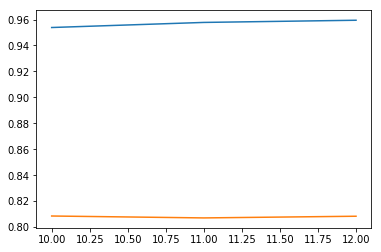

In [117]:
plt.plot(depths, all_auc_train)
plt.plot(depths, all_auc_val)
plt.show()

In [ ]:
all_auc_train2 = []
all_auc_val2 = []

leafs = [5,10,15,20,25,30,35,40,45]
for l in leafs:
    # We fit the model on the train dataset
    clf = RandomForestClassifier(200,max_depth=7,min_samples_leaf=l)
    model = clf.fit(df_train2.drop("label",axis=1), df_train.label)

    # We make predictions on the train dataset + validation set (K-fold methodology)
    pred_train = model.predict_proba(df_train2.drop("label",axis=1))[:,1]
    pred_val = cross_val_predict(clf, df_train2.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]
    auc_train = roc_auc_score(df_train.label,pred_train)
    auc_val = roc_auc_score(df_train.label,pred_val)
    all_auc_train2.append(auc_train)
    all_auc_val2.append(auc_val)
    print(pred_val)

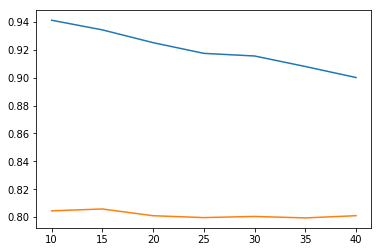

In [119]:
plt.plot(leafs, all_auc_train2)
plt.plot(leafs, all_auc_val2)
plt.show()

In [ ]:
all_auc_train3 = []
all_auc_val3 = []

ntrees = [100,150,200,250,300,350]
for n in ntrees:
    # We fit the model on the train dataset
    clf = RandomForestClassifier(n,max_depth=7,min_samples_leaf=20)
    model = clf.fit(df_train2.drop("label",axis=1), df_train.label)

    # We make predictions on the train dataset + validation set (K-fold methodology)
    pred_train = model.predict_proba(df_train2.drop("label",axis=1))[:,1]
    pred_val = cross_val_predict(clf, df_train2.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]
    auc_train = roc_auc_score(df_train.label,pred_train)
    auc_val = roc_auc_score(df_train.label,pred_val)
    all_auc_train3.append(auc_train)
    all_auc_val3.append(auc_val)
    print(pred_val)


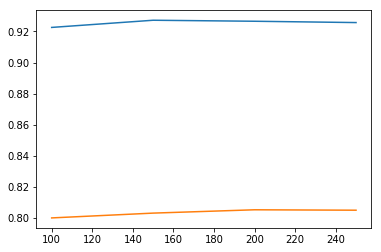

In [123]:
plt.plot(ntrees, all_auc_train3)
plt.plot(ntrees, all_auc_val3)
plt.show()

In [151]:
# We fit the model on the pre-selected features of the train dataset
clf = RandomForestClassifier(240,max_depth=11,min_samples_leaf=10)
model = clf.fit(df_train2.drop("label",axis=1), df_train.label)

# We make predictions on the train dataset + validation set (K-fold methodology)
pred_train = model.predict_proba(df_train2.drop("label",axis=1))[:,1]
pred_val = cross_val_predict(clf,df_train2.drop("label",axis=1), df_train.label, cv=5, method="predict_proba")[:,1]

roc_auc_score(df_train.label,pred_val)

[ 0.07016699  0.03043368  0.0864712  ...,  0.01278638  0.03951038
  0.01391633]


0.81878013860464294

### Optimization of Gradient Boosting Parameters

In order to complete this section, we create a function that can yield :
>- A **feature importance graph** based on the same method as during our data exploration process
>- A **model performance report**

We will use this fonction in order to iterate different set of parameters, and therefore **fine-tune** our model.
We will :
>- First, **fix initial standard parameter** values
>- Then, find our optimal **number of trees** to test **sufficiently fast** the different combinations of other parameters
>- Finally run **various configurations** for other parameters

In [170]:
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = df_train
target = 'label'
IDcol = 'id'

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the train data set
    alg.fit(dtrain[predictors], dtrain['label'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['label'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.964
AUC Score (Train): 0.944040
CV Score : Mean - 0.8248727 | Std - 0.01723008 | Min - 0.8083183 | Max - 0.8553409


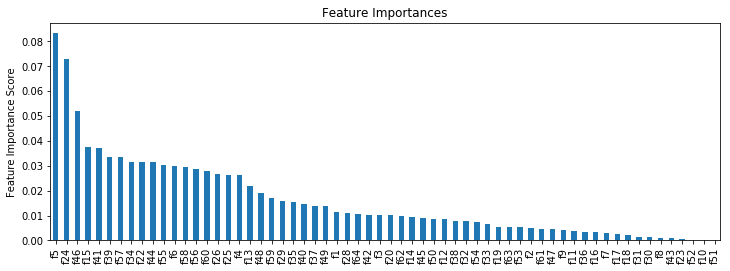

In [28]:
# First we run the model while choosing all predictors except the label & id columns
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

Let's take the **default learning rate of 0.05** for now and check the optimum number of trees in order to run optimizations. <br>
We want to choose a value on which our computer can **work fairly fast**, as it will be used for testing various scenarios and determining the tree parameters. <br>
In order to decide on the various boosting parameters, we set some **initial values of other parameters**.

In [ ]:
predictors = [x for x in df_train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators': [272,275,277]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=1200,min_samples_leaf=70,max_depth=17,max_features=17,subsample=0.8,random_state=0), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

As we can see, here we obtain **275** as the optimal number of estimators for a 0.05 learning rate.
We will therefore use this value to optimize other parameters.


In [171]:
param_test2 = {'max_depth':[12], 'min_samples_split':[100, 300, 500]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=275, max_features=17, subsample=0.8, min_samples_leaf=70, random_state=0), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

NameError: name 'predictors' is not defined

Here, we have run combinations and the ideal values are :
- 12 for **max_depth**
- 300 for **min_samples_split**

We will now test for values of min_samples_leaf.

In [46]:
param_test3 = {'min_samples_leaf':[65,70,75]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=275,min_samples_split=300, max_depth=12,max_features=17, subsample=0.8, random_state=0), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83901, std: 0.02784, params: {'min_samples_leaf': 65},
  mean: 0.84255, std: 0.03031, params: {'min_samples_leaf': 70},
  mean: 0.83908, std: 0.02746, params: {'min_samples_leaf': 75}],
 {'min_samples_leaf': 70},
 0.8425540498098183)

Here we get the optimum value of **70** for min_samples_leaf. 
Now let's tune the last tree-parameter, i.e. **max_features**.

In [49]:
param_test4 = {'max_features':[16,17,18,30]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=275,max_depth=12, min_samples_split=300, min_samples_leaf=70, subsample=0.8, random_state=0),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.84207, std: 0.02882, params: {'max_features': 16},
  mean: 0.84255, std: 0.03031, params: {'max_features': 17},
  mean: 0.83831, std: 0.03176, params: {'max_features': 18},
  mean: 0.84091, std: 0.03082, params: {'max_features': 30}],
 {'max_features': 17},
 0.8425540498098183)

Now let's tune the **subsample value**.

In [ ]:
param_test5 = {'subsample':[0.8]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.001, n_estimators=13750, max_features=17, max_depth=12, min_samples_split=300, min_samples_leaf=70, random_state=0),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

Now let's evaluate our model with a **lower learning rate and higher number of estimator**.


Model Report
Accuracy : 0.9768
AUC Score (Train): 0.998942
CV Score : Mean - 0.8441381 | Std - 0.03143905 | Min - 0.7960711 | Max - 0.8730286


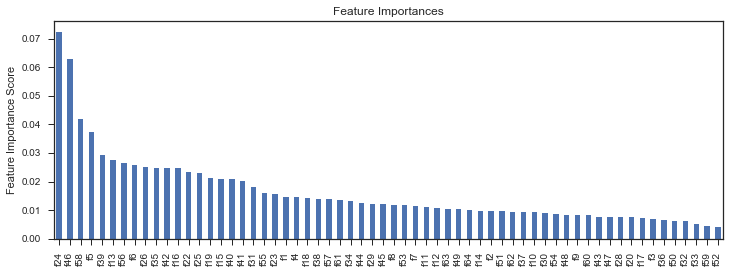

In [100]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=800,max_depth=17,min_samples_split=400, min_samples_leaf=70, subsample=0.8,random_state=10,max_features=17)
modelfit(gbm0, train, predictors)

If we compare the **feature importance of this model** with the **baseline model**, we find that now we are able to **derive value from many more variables**.<gr> 
Also, earlier it placed **too much importance** on some variables but now it has been fairly distributed.<gr>
The **overall AUC score** has also increased.

# Step 4 - Final run

## Run best model and make prediction on test set

We use our best model and make probabilities predictions on test set and assign results to variable **proba_test**.

In [204]:
# We fit the model on the whole train dataset
#clf = GradientBoostingClassifier(n_estimators=13750, learning_rate=0.001,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
clf = GradientBoostingClassifier(n_estimators=5500, learning_rate=0.0025,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
model = clf.fit(df_train2.drop(["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527","label"],axis=1), df_train2.label)

# We make predictions on the test dataset
pred_test = model.predict_proba(df_test2.drop(["f335","f328","f535","f542","f337","f274","f505","f513","f183","f496","f152","f197","f333","f119","f310","f377","f501","f182","f532","f70","f543","f303","f99","f281","f123","f325","f97","f541","f80","f194","f109","f497","f298","f79","f190","f76","f503","f185","f305","f207","f486","f300","f492","f295","f340","f98","f58","f167","f155","f309","f41","f488","f128","f499","f181","f210","f71","f57","f121","f523","f317","f312","f525","f48","f259","f168","f521","f297","f520","f268","f227","f137","f302","f322","f118","f143","f267","f7","f115","f46","f69","f202","f14","f125","f527"],axis=1))[:,1]
                                

In [200]:
# We fit the model on the whole train dataset
#clf = GradientBoostingClassifier(n_estimators=13750, learning_rate=0.001,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
clf = GradientBoostingClassifier(n_estimators=5500, learning_rate=0.0025,min_samples_split=300, min_samples_leaf=70,max_depth=12, max_features=17, subsample=0.8,random_state=0)
model = clf.fit(df_train2.drop("label",axis=1), df_train2.label)

# We make predictions on the test dataset
pred_test = model.predict_proba(df_test2)[:,1]
                                

In [201]:
check_test(pred_test.shape, (3466,), "wrong shape for proba test")

1 test passed.


## Evaluate best model

Our best machine learning algorithm is the Gradient Boosting, yields following results : 

## Interpretation

-> Your interpretation may go here.

## Export submission to Kaggle

You can export your predictions as a submission file using function export_kaggle() defined earlier in the notebook. Then go on Kaggle competition page and submit your predictions. Your can observe your performance on leaderboard page.

In [203]:
df_submit = export_kaggle(df_test, pred_test, True, "../results/my_first_submission.csv")

## Conclusion

You can write your work conclusion in this cell..